In [18]:
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length // batch_size // truncated_backprop_length

In [19]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

In [20]:
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

In [21]:
W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

In [22]:
inputs_series = tf.unstack(batchX_placeholder, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

In [23]:
# Forward pass
# current_state = init_state
_current_cell_state = np.zeros((batch_size, state_size))
_current_hidden_state = np.zeros((batch_size, state_size))
states_series = []
for current_input in inputs_series:
    current_input = tf.reshape(current_input, [batch_size, 1])
    input_and_state_concatenated = tf.concat([current_input, current_state], 1)  # Increasing number of columns

    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)  # Broadcasted addition
    states_series.append(next_state)
    current_state = next_state

In [24]:
logits_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels) for logits, labels in zip(logits_series,labels_series)]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

In [25]:
def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)

<Figure size 432x288 with 0 Axes>

New data, epoch 0
Step 0 Loss 0.6770872


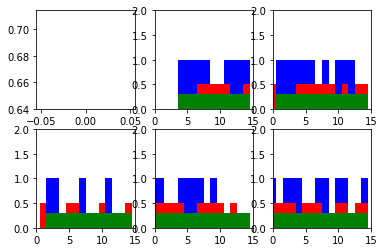

Step 100 Loss 0.694083


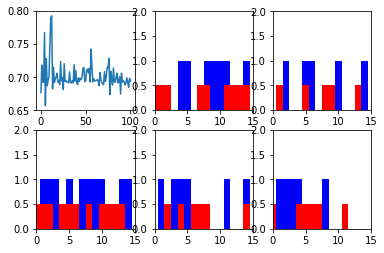

Step 200 Loss 0.6840036


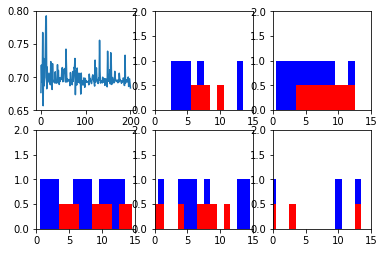

Step 300 Loss 0.699802


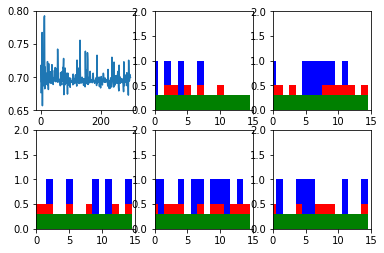

Step 400 Loss 0.69349533


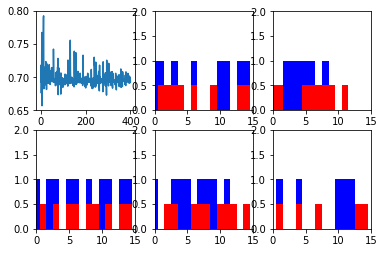

Step 500 Loss 0.69372714


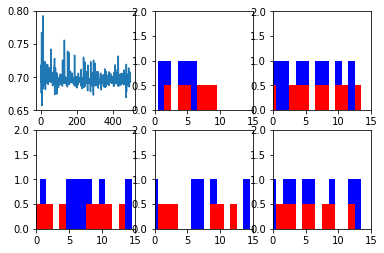

Step 600 Loss 0.7045744


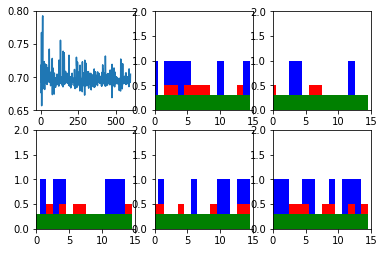

New data, epoch 1
Step 0 Loss 0.67923707


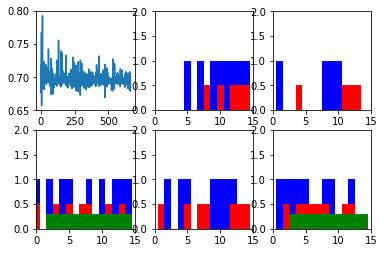

Step 100 Loss 0.6930417


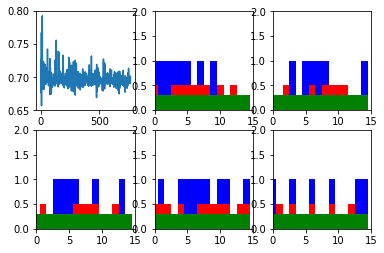

Step 200 Loss 0.6948688


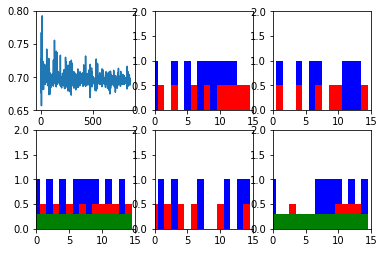

Step 300 Loss 0.69085634


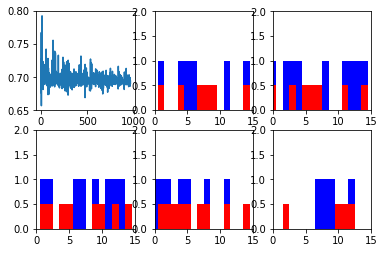

Step 400 Loss 0.6989909


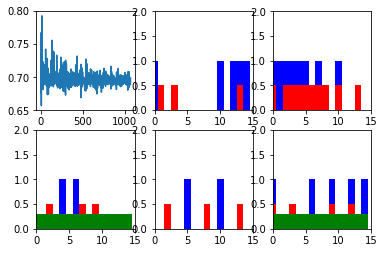

Step 500 Loss 0.69455916


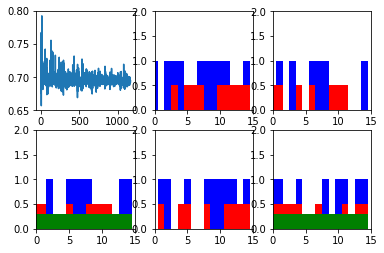

Step 600 Loss 0.6928756


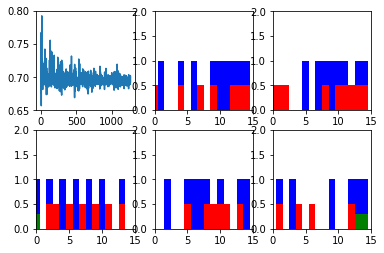

New data, epoch 2
Step 0 Loss 0.6920434


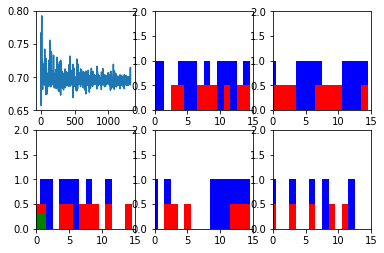

Step 100 Loss 0.6951445


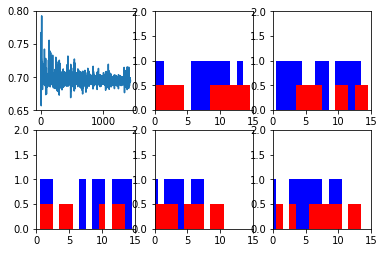

Step 200 Loss 0.690179


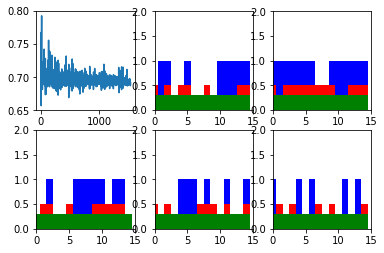

Step 300 Loss 0.69139886


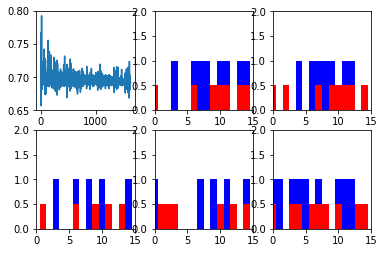

Step 400 Loss 0.45325202


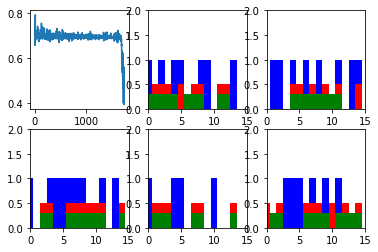

Step 500 Loss 0.039286595


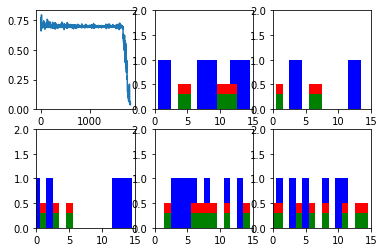

Step 600 Loss 0.020624459


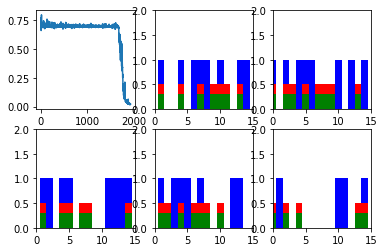

New data, epoch 3
Step 0 Loss 0.15976194


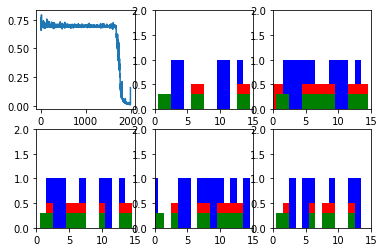

Step 100 Loss 0.009828801


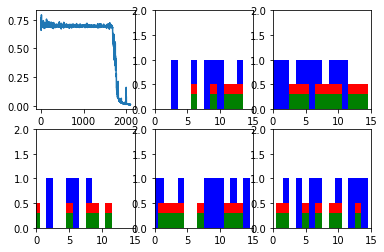

Step 200 Loss 0.008150184


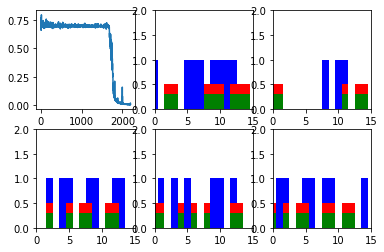

Step 300 Loss 0.006904908


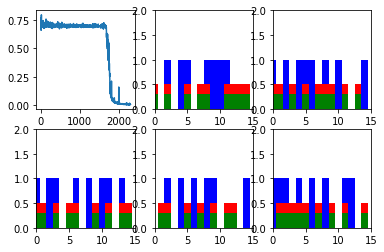

Step 400 Loss 0.012939214


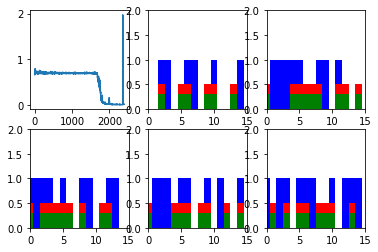

Step 500 Loss 0.006664658


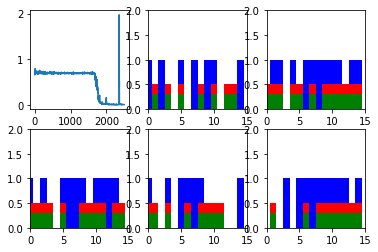

Step 600 Loss 0.005435088


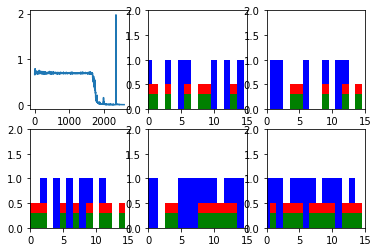

New data, epoch 4
Step 0 Loss 0.11926993


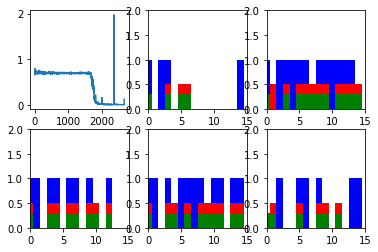

Step 100 Loss 0.00460033


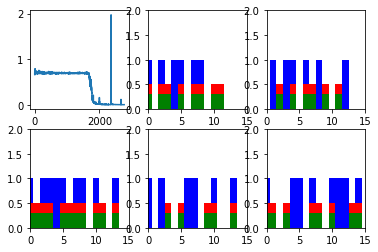

Step 200 Loss 0.0026526225


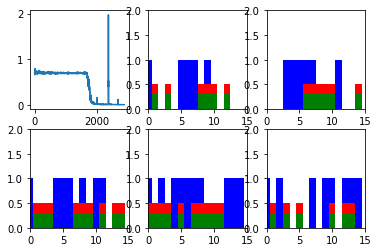

Step 300 Loss 0.0032637669


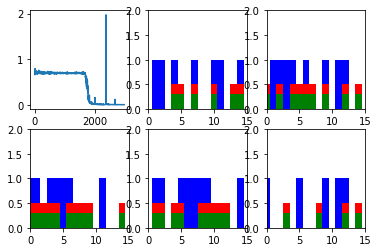

Step 400 Loss 0.0026750583


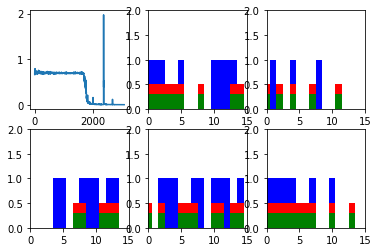

Step 500 Loss 0.0021997301


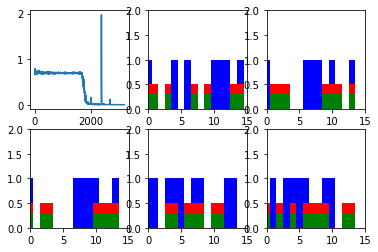

Step 600 Loss 0.002279443


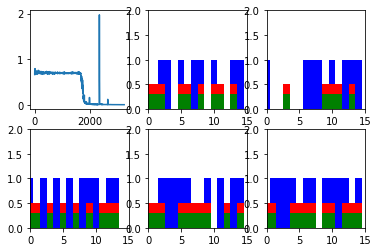

New data, epoch 5
Step 0 Loss 0.18379955


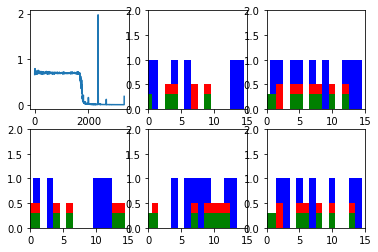

Step 100 Loss 0.0022268593


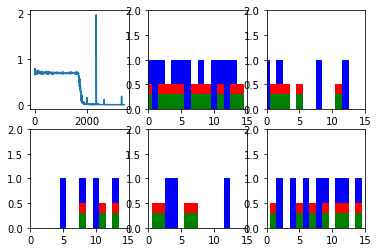

Step 200 Loss 0.0016819827


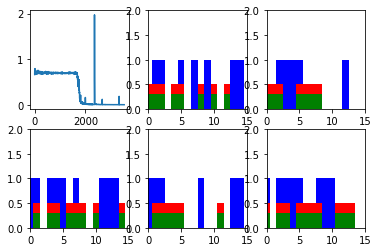

Step 300 Loss 0.0015359422


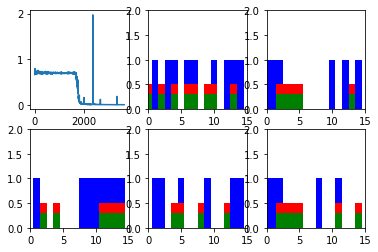

Step 400 Loss 0.0016592339


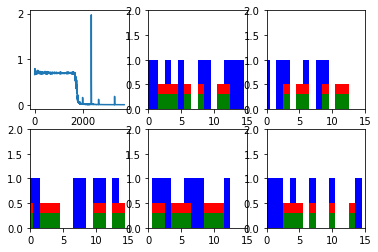

Step 500 Loss 0.0012753136


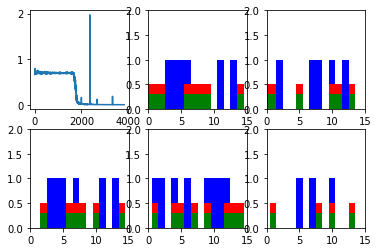

Step 600 Loss 0.0012039669


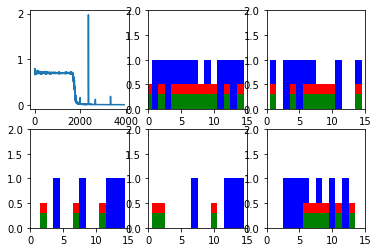

New data, epoch 6
Step 0 Loss 0.1807206


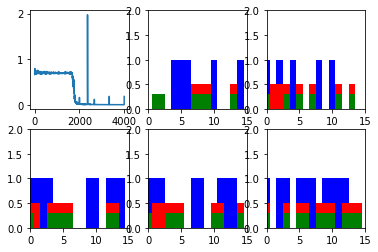

Step 100 Loss 0.0014657404


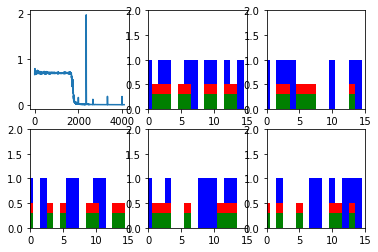

Step 200 Loss 0.0011294773


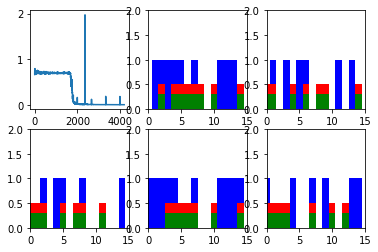

Step 300 Loss 0.0013457778


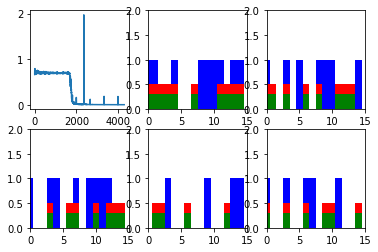

Step 400 Loss 0.0010908459


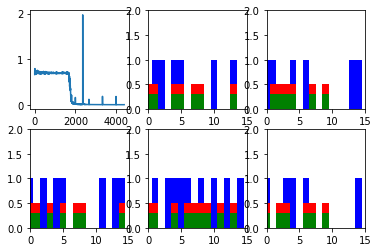

Step 500 Loss 0.0010103248


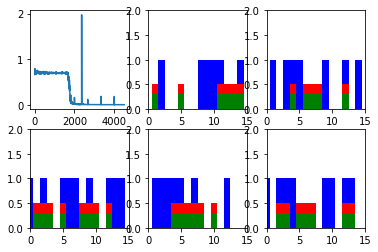

Step 600 Loss 0.0010310669


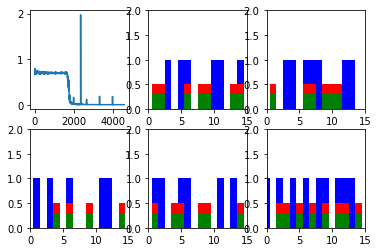

New data, epoch 7
Step 0 Loss 0.19167583


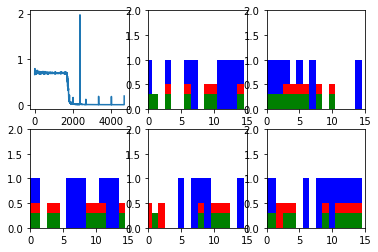

Step 100 Loss 0.0008699597


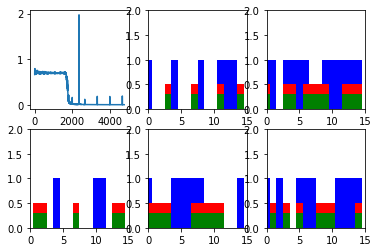

Step 200 Loss 0.00089969835


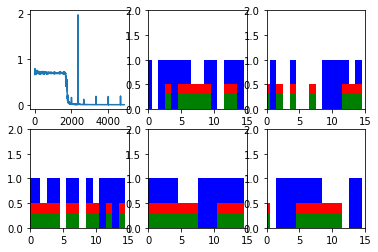

Step 300 Loss 0.0009070507


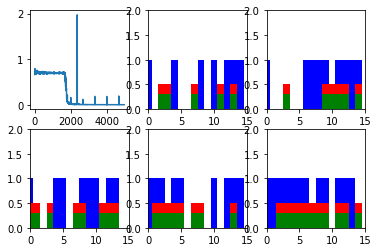

Step 400 Loss 0.0007652098


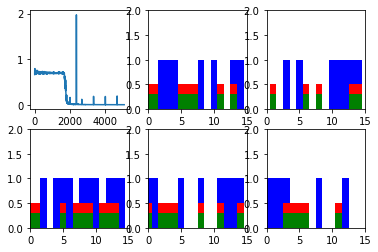

Step 500 Loss 0.00084317446


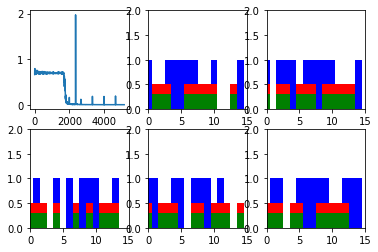

Step 600 Loss 0.0008097982


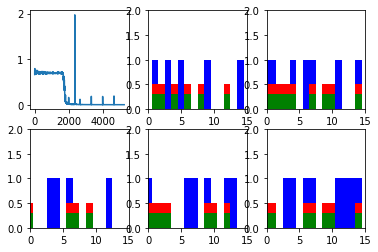

New data, epoch 8
Step 0 Loss 0.13763689


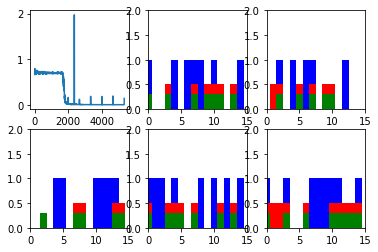

Step 100 Loss 0.00087601074


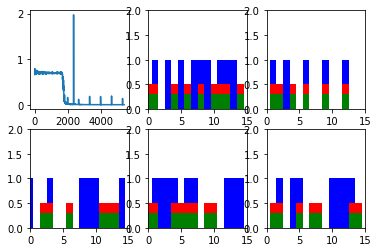

Step 200 Loss 0.0008515493


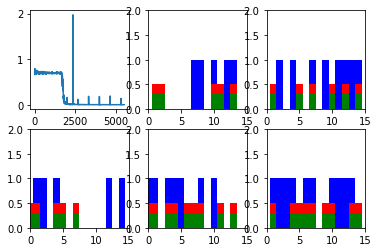

Step 300 Loss 0.00086580805


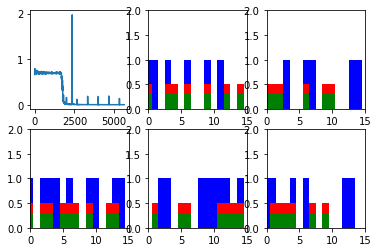

Step 400 Loss 0.00071172585


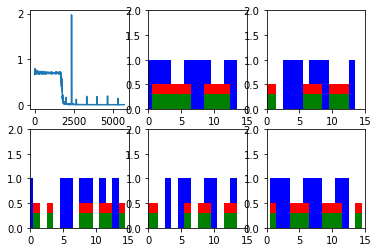

Step 500 Loss 0.0007974536


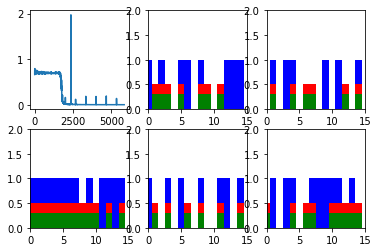

Step 600 Loss 0.00086195866


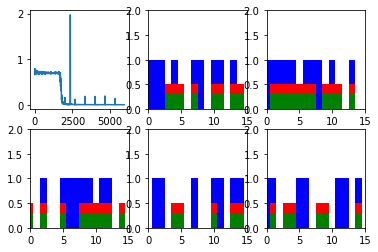

New data, epoch 9
Step 0 Loss 0.15862341


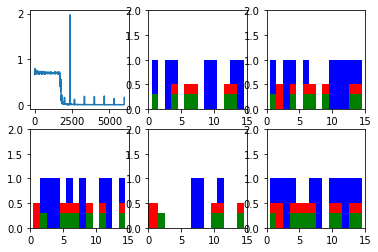

Step 100 Loss 0.0006254968


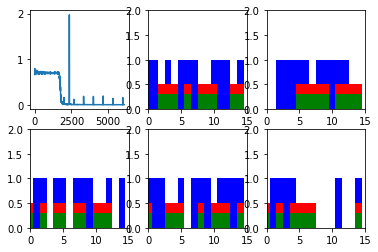

Step 200 Loss 0.0007941591


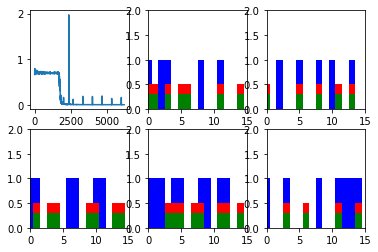

Step 300 Loss 0.0006495065


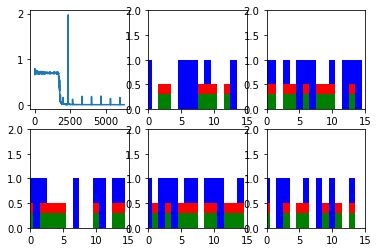

Step 400 Loss 0.00066869915


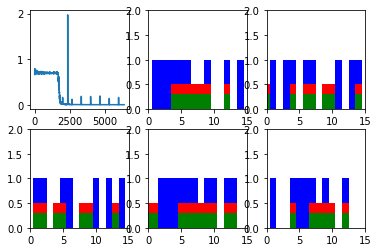

Step 500 Loss 0.00057187746


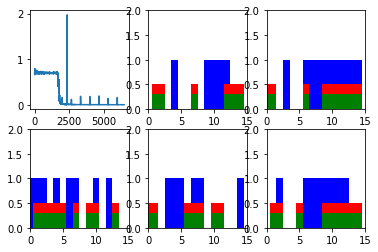

Step 600 Loss 0.0006990868


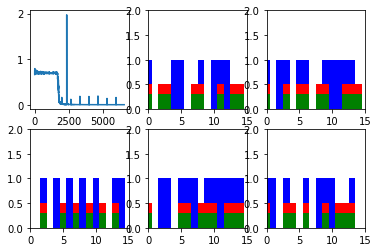

New data, epoch 10
Step 0 Loss 0.13624313


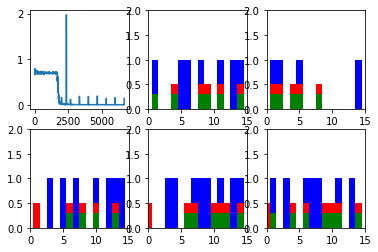

Step 100 Loss 0.0007728059


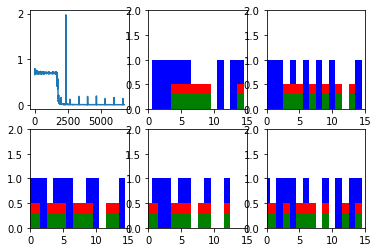

Step 200 Loss 0.00063799496


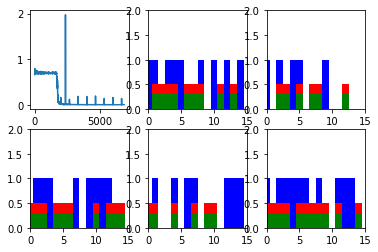

Step 300 Loss 0.00057952554


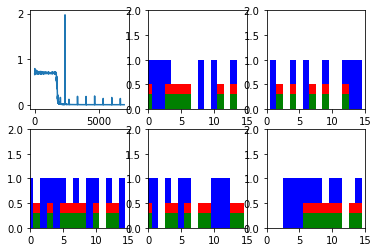

Step 400 Loss 0.0005491412


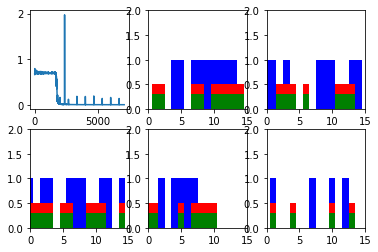

Step 500 Loss 0.0005350427


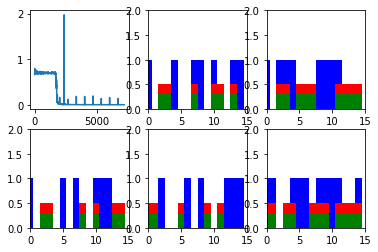

Step 600 Loss 0.00049478584


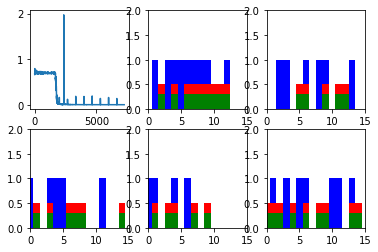

New data, epoch 11
Step 0 Loss 0.13064346


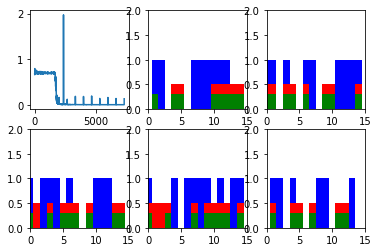

Step 100 Loss 0.00087024877


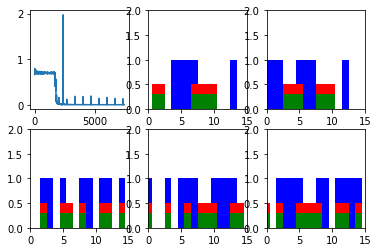

Step 200 Loss 0.0005459866


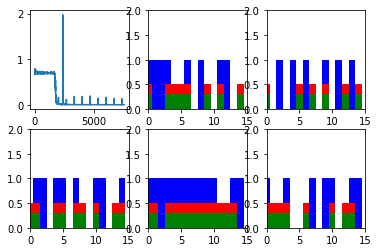

Step 300 Loss 0.00045776367


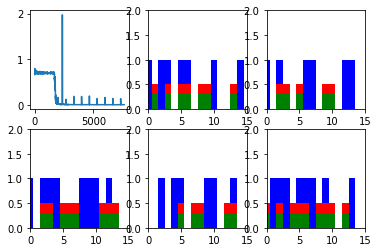

Step 400 Loss 0.00051328726


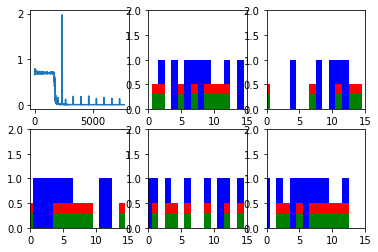

Step 500 Loss 0.000466761


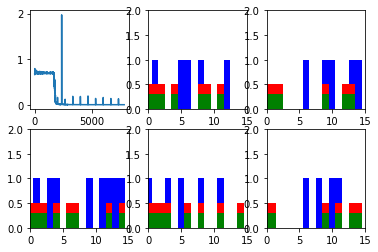

Step 600 Loss 0.0004633157


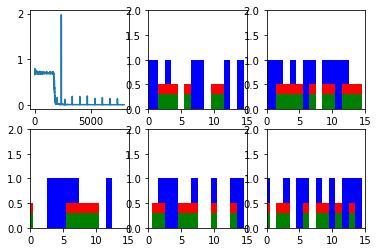

New data, epoch 12
Step 0 Loss 0.16512524


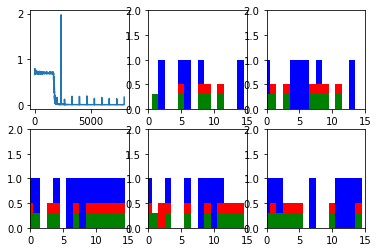

Step 100 Loss 0.00048860646


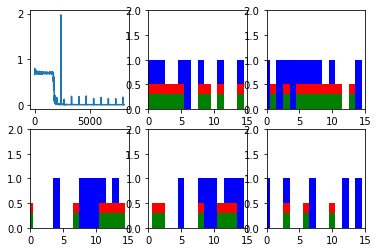

Step 200 Loss 0.00045891048


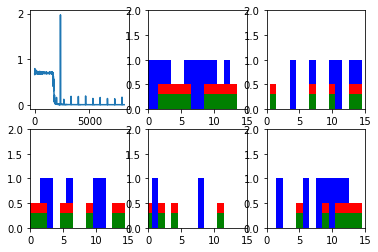

Step 300 Loss 0.00047564815


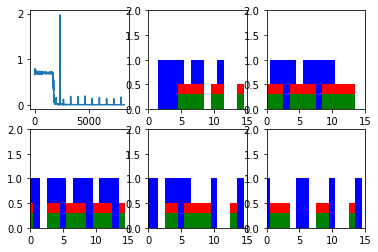

Step 400 Loss 0.00043693095


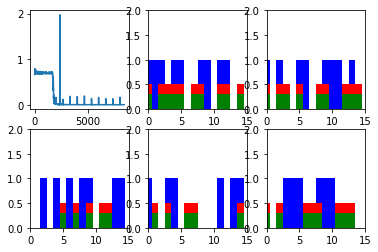

Step 500 Loss 0.00048018675


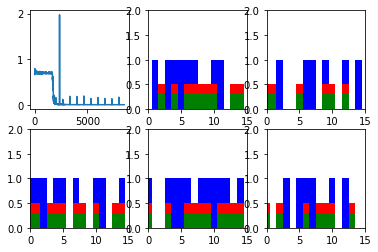

Step 600 Loss 0.0004580929


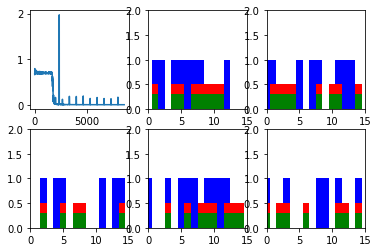

New data, epoch 13
Step 0 Loss 0.14606453


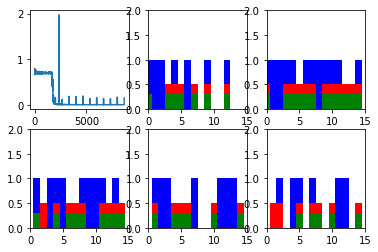

Step 100 Loss 0.00037969378


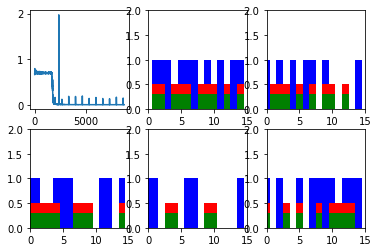

Step 200 Loss 0.0004011082


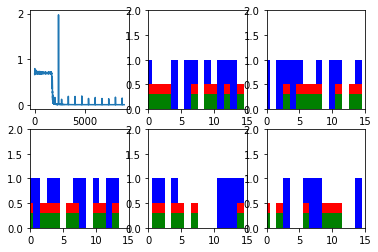

Step 300 Loss 0.00044349686


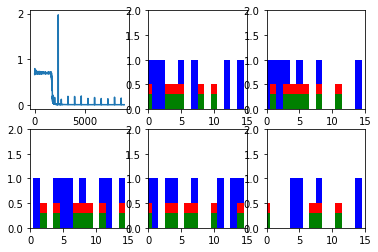

Step 400 Loss 0.000417965


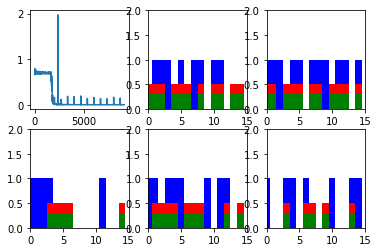

Step 500 Loss 0.0003927071


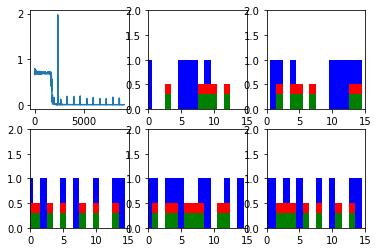

Step 600 Loss 0.00034624775


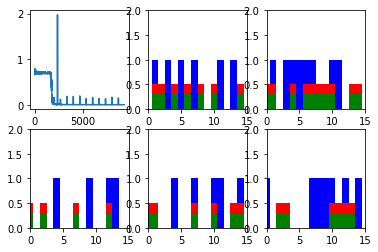

New data, epoch 14
Step 0 Loss 0.15402433


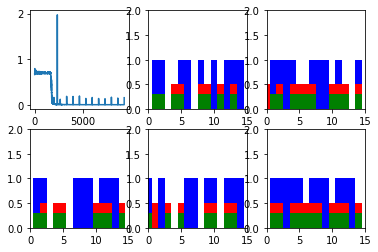

Step 100 Loss 0.00044127062


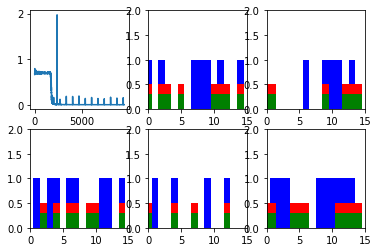

Step 200 Loss 0.0004753536


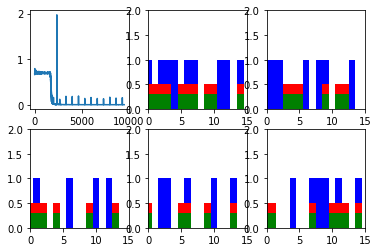

Step 300 Loss 0.00047451115


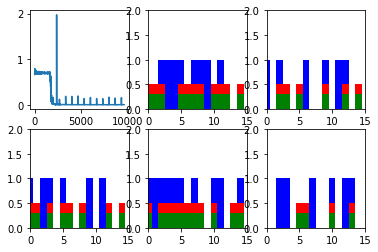

Step 400 Loss 0.00038326168


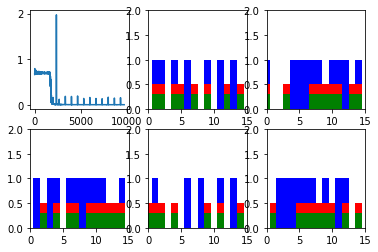

Step 500 Loss 0.0003699504


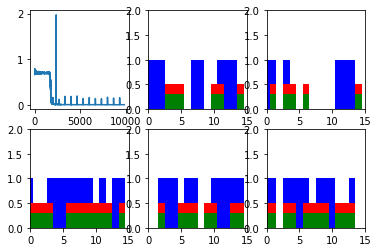

Step 600 Loss 0.000317917


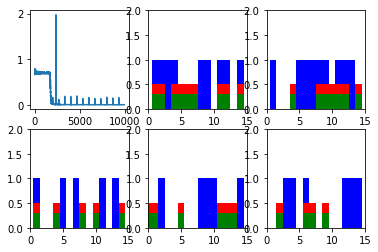

New data, epoch 15
Step 0 Loss 0.13834082


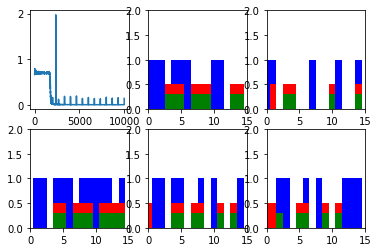

Step 100 Loss 0.00041307384


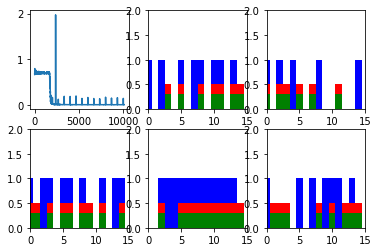

Step 200 Loss 0.00038659037


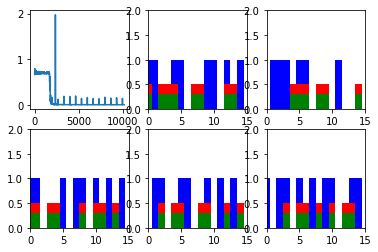

Step 300 Loss 0.00043172558


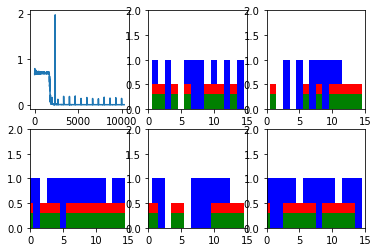

Step 400 Loss 0.0004052384


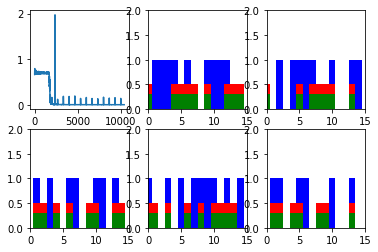

Step 500 Loss 0.00034960682


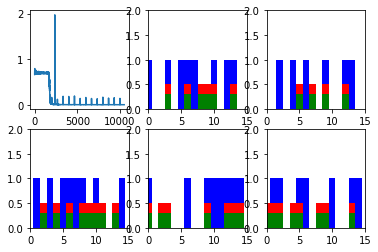

Step 600 Loss 0.00029513214


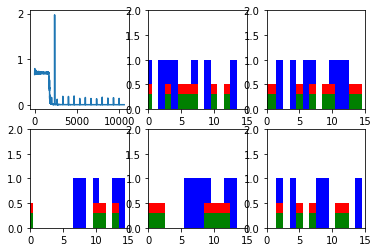

New data, epoch 16
Step 0 Loss 0.14338867


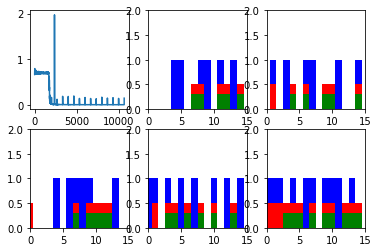

Step 100 Loss 0.00032295627


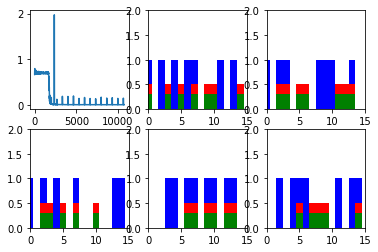

Step 200 Loss 0.0003336505


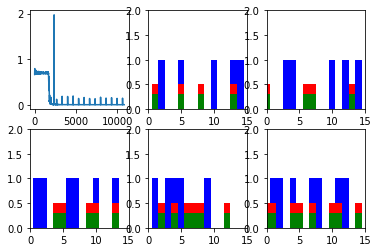

Step 300 Loss 0.00042306414


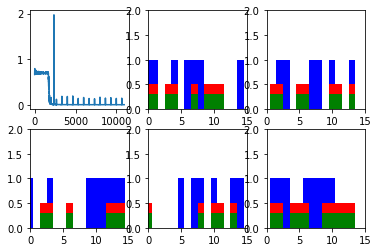

Step 400 Loss 0.00026423758


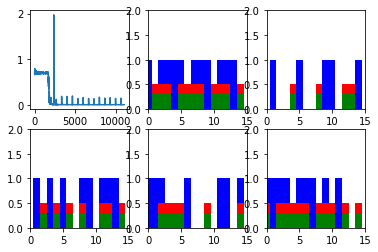

Step 500 Loss 0.0002787859


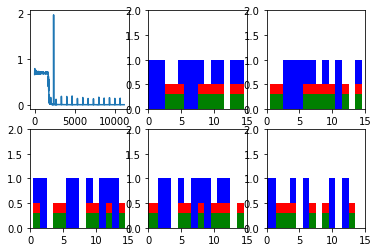

Step 600 Loss 0.00028939408


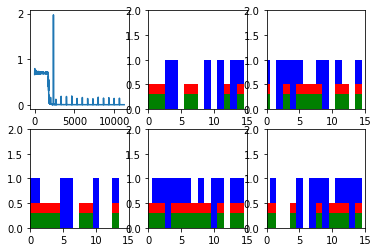

New data, epoch 17
Step 0 Loss 0.18619056


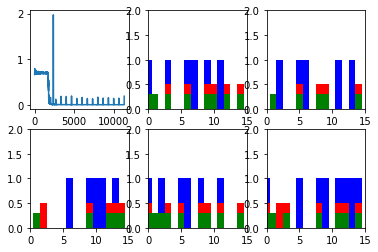

Step 100 Loss 0.00034791202


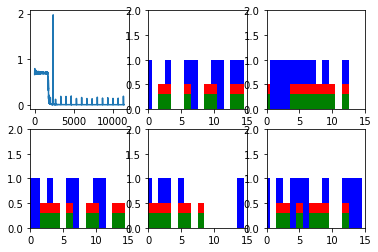

Step 200 Loss 0.00027792205


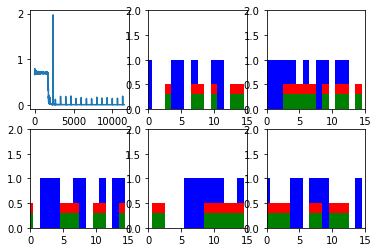

Step 300 Loss 0.00027841097


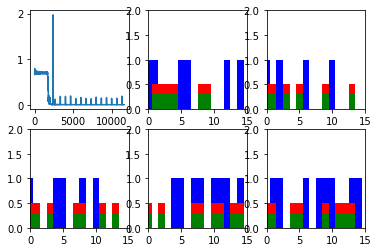

Step 400 Loss 0.00027327167


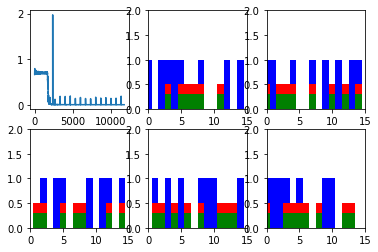

Step 500 Loss 0.00032655176


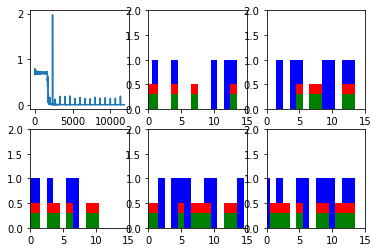

Step 600 Loss 0.00024410312


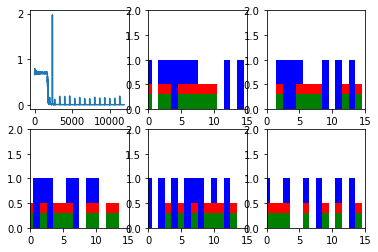

New data, epoch 18
Step 0 Loss 0.118405215


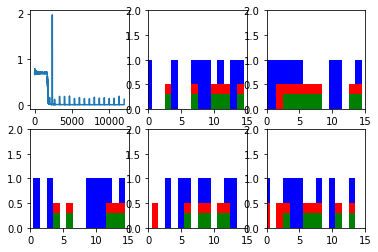

Step 100 Loss 0.00021916354


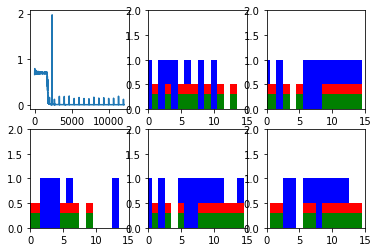

Step 200 Loss 0.00029671093


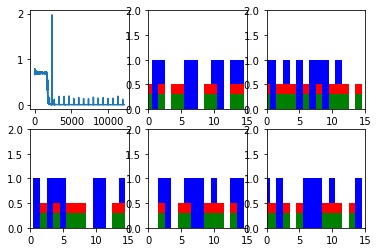

Step 300 Loss 0.00027493044


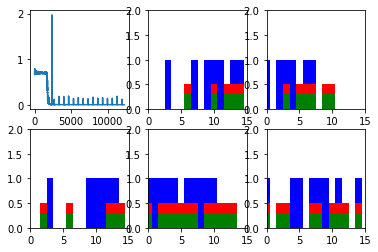

Step 400 Loss 0.0002548879


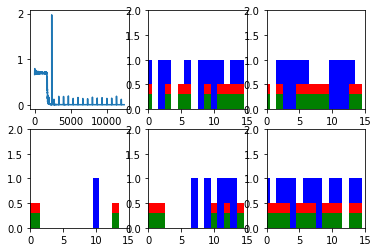

Step 500 Loss 0.00030885122


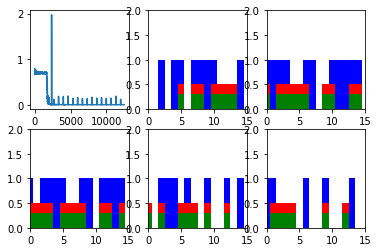

Step 600 Loss 0.0003393643


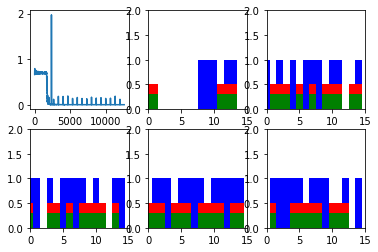

New data, epoch 19
Step 0 Loss 0.16122177


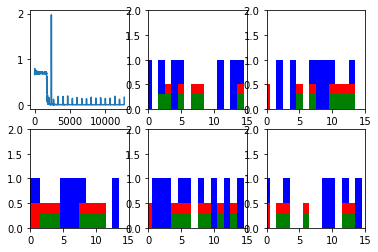

Step 100 Loss 0.00029642397


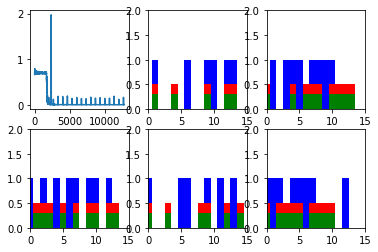

Step 200 Loss 0.00035655455


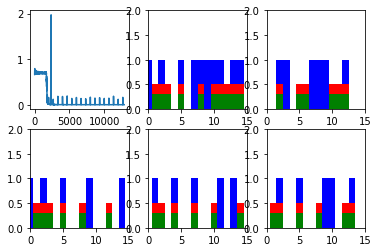

Step 300 Loss 0.00024999614


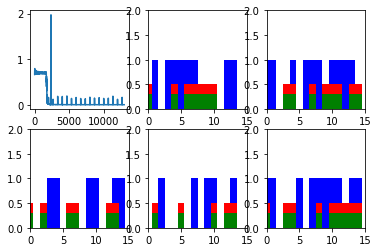

Step 400 Loss 0.00029496718


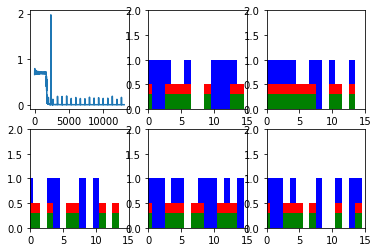

Step 500 Loss 0.00025596327


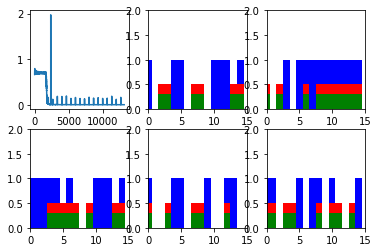

Step 600 Loss 0.00022343638


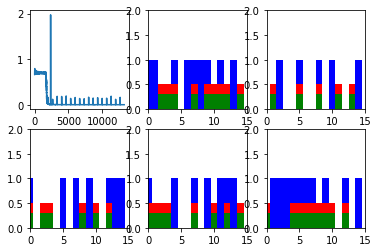

New data, epoch 20
Step 0 Loss 0.11334583


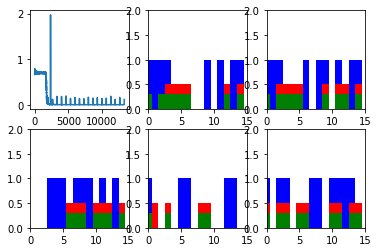

Step 100 Loss 0.00026895697


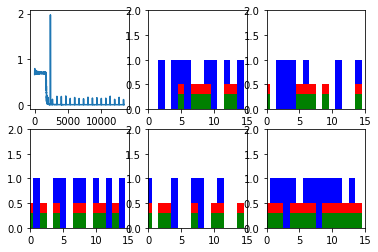

Step 200 Loss 0.00022349345


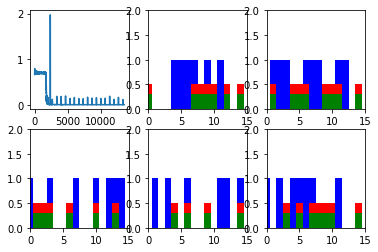

Step 300 Loss 0.0002988182


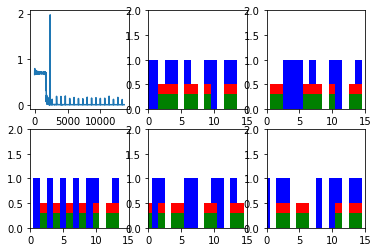

Step 400 Loss 0.0003186003


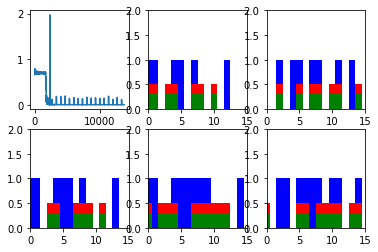

Step 500 Loss 0.0002235654


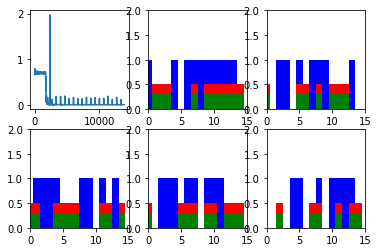

Step 600 Loss 0.00019484575


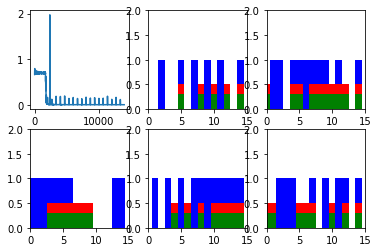

New data, epoch 21
Step 0 Loss 0.14248165


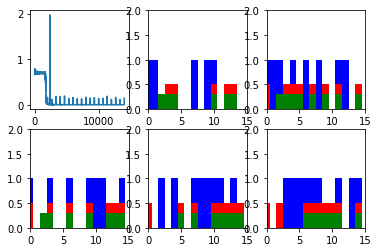

Step 100 Loss 0.00043928393


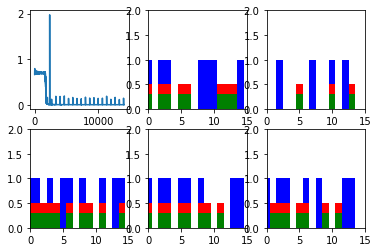

Step 200 Loss 0.0005061766


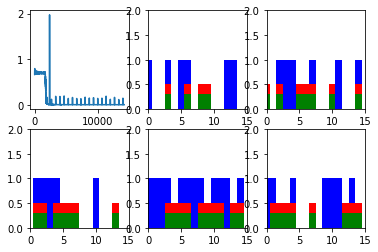

Step 300 Loss 0.0004305005


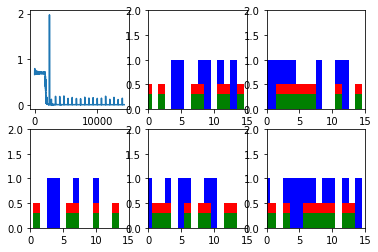

Step 400 Loss 0.00033394087


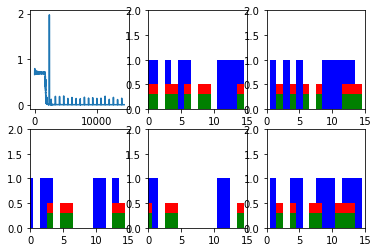

Step 500 Loss 0.00029530187


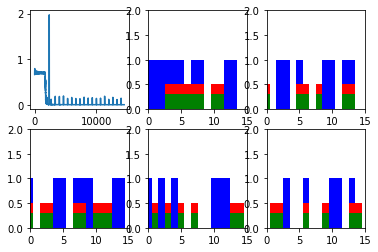

Step 600 Loss 0.0003147854


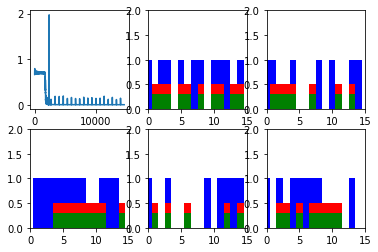

New data, epoch 22
Step 0 Loss 0.17458856


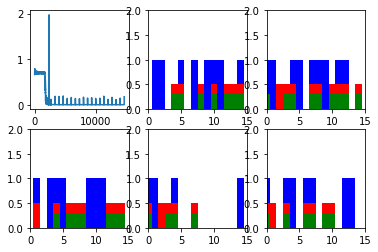

Step 100 Loss 0.00024992882


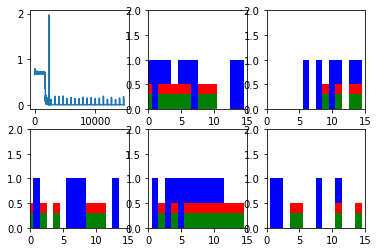

Step 200 Loss 0.00034426502


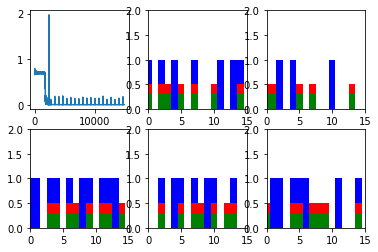

Step 300 Loss 0.00027430413


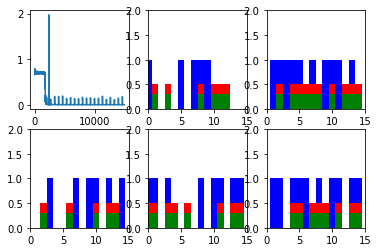

Step 400 Loss 0.00031997697


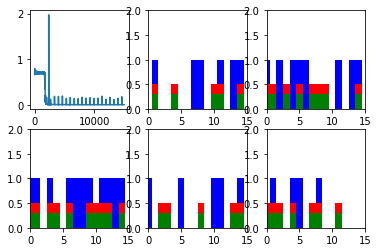

Step 500 Loss 0.00025687448


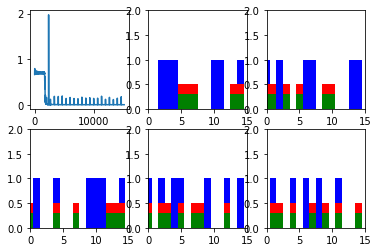

Step 600 Loss 0.00026812463


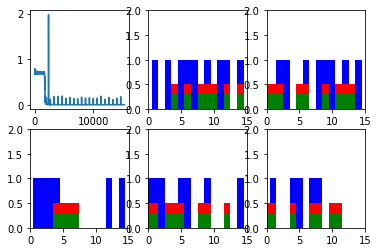

New data, epoch 23
Step 0 Loss 0.22008848


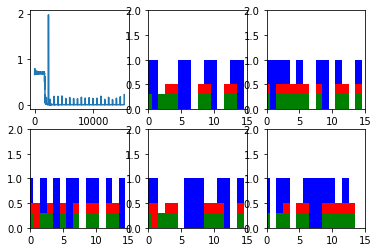

Step 100 Loss 0.0005892675


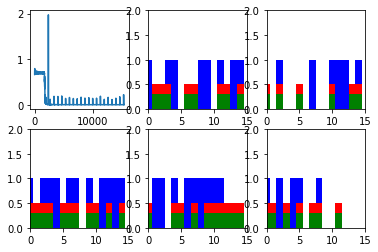

Step 200 Loss 0.0005127179


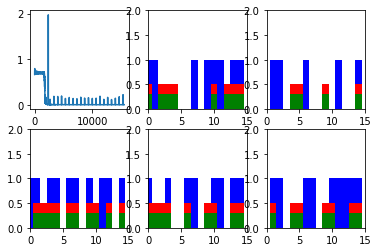

Step 300 Loss 0.0005808282


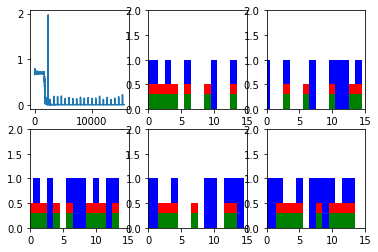

Step 400 Loss 0.0002788012


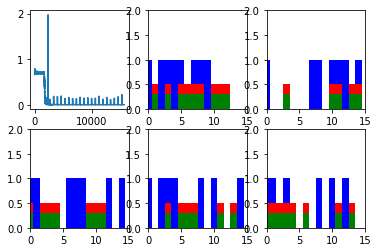

Step 500 Loss 0.00032747348


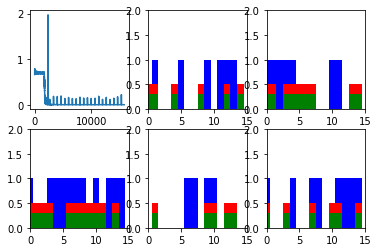

Step 600 Loss 0.0002790613


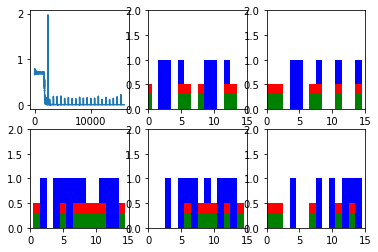

New data, epoch 24
Step 0 Loss 0.13993855


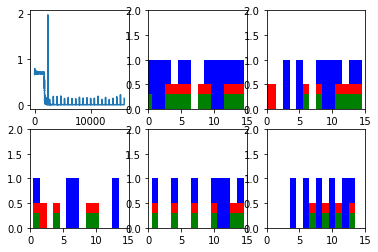

Step 100 Loss 0.00035245233


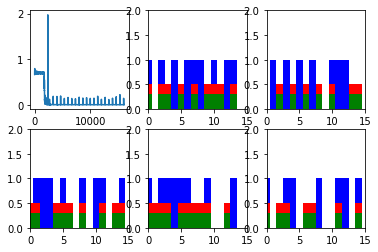

Step 200 Loss 0.00030707716


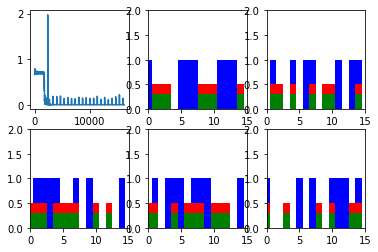

Step 300 Loss 0.0002367728


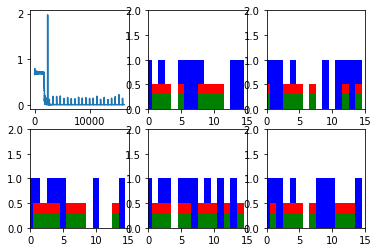

Step 400 Loss 0.00030279718


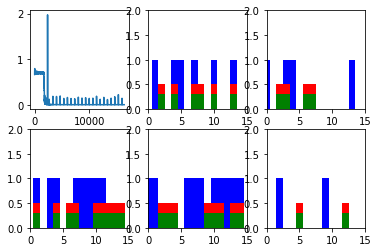

Step 500 Loss 0.00030779134


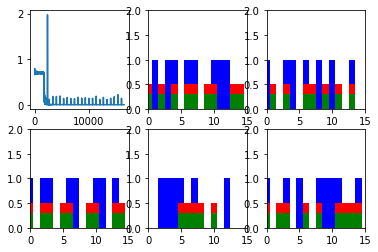

Step 600 Loss 0.00029187015


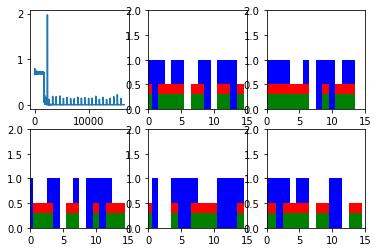

New data, epoch 25
Step 0 Loss 0.20426695


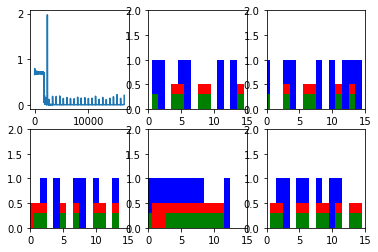

Step 100 Loss 0.00028071555


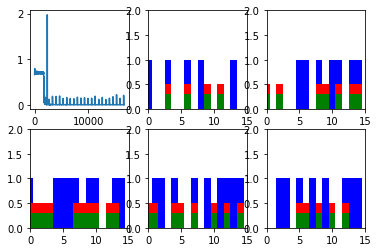

Step 200 Loss 0.00029806673


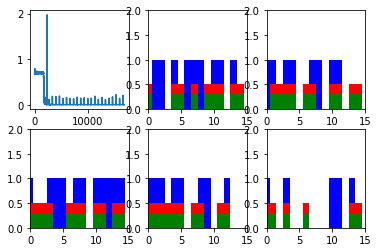

Step 300 Loss 0.00023563017


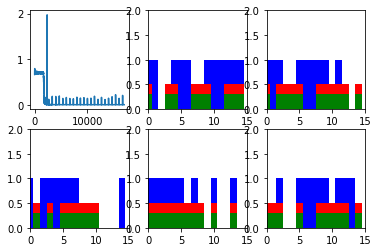

Step 400 Loss 0.00019886346


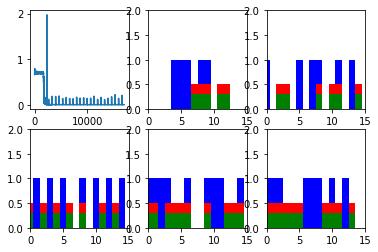

Step 500 Loss 0.00022483553


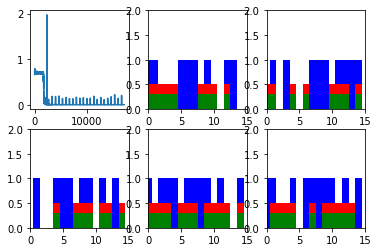

Step 600 Loss 0.00029895874


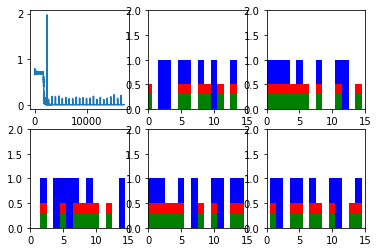

New data, epoch 26
Step 0 Loss 0.20027064


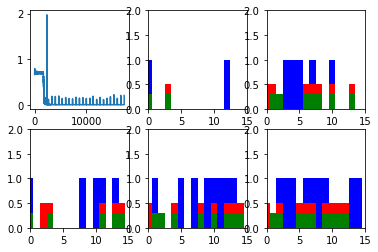

Step 100 Loss 0.00021811789


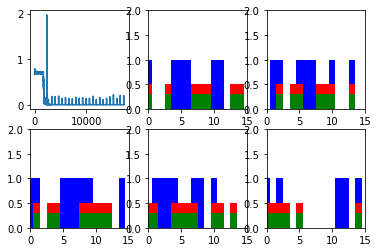

Step 200 Loss 0.00024134644


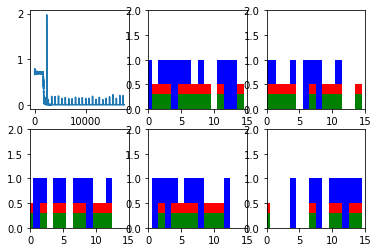

Step 300 Loss 0.00021636848


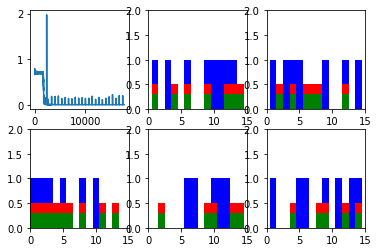

Step 400 Loss 0.00020203112


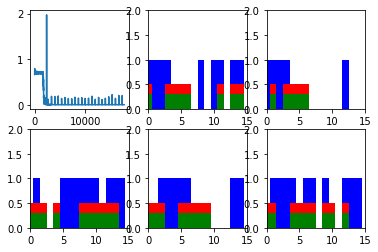

Step 500 Loss 0.0001895842


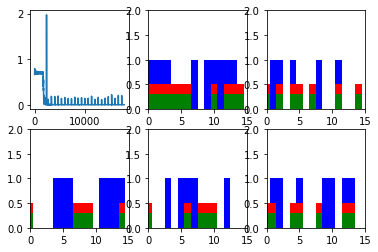

Step 600 Loss 0.0001946267


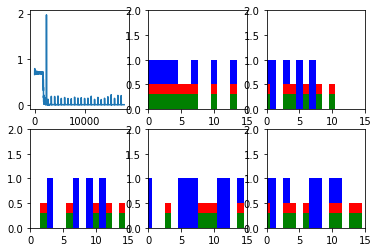

New data, epoch 27
Step 0 Loss 0.21694326


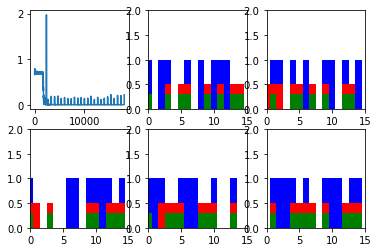

Step 100 Loss 0.000256827


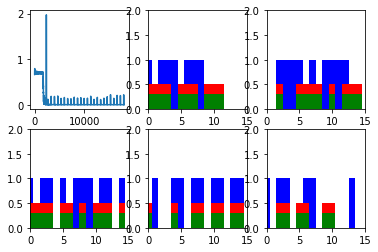

Step 200 Loss 0.00017697777


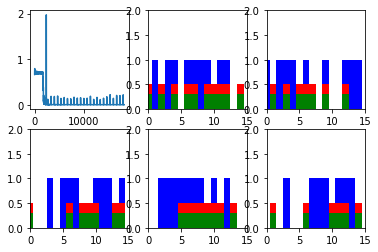

Step 300 Loss 0.00015974318


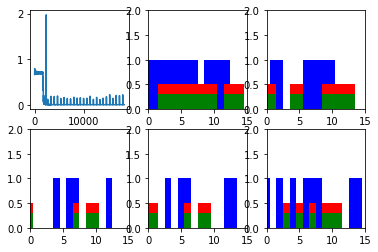

Step 400 Loss 0.00017373184


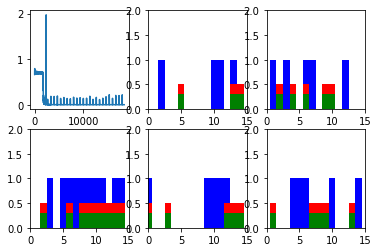

Step 500 Loss 0.00020980569


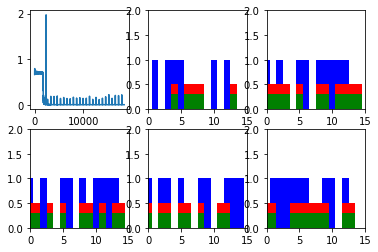

Step 600 Loss 0.00020736206


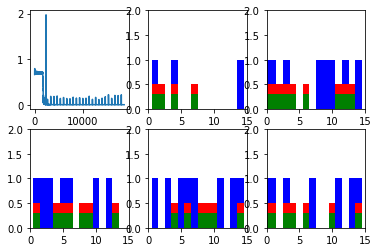

New data, epoch 28
Step 0 Loss 0.18363269


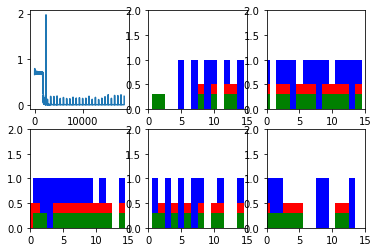

Step 100 Loss 0.0001553715


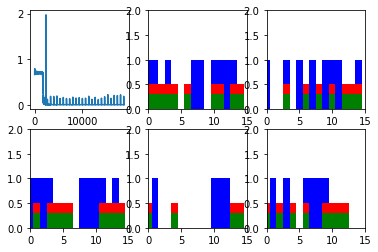

Step 200 Loss 0.00016694212


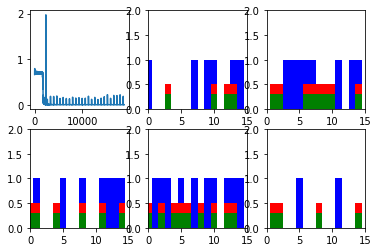

Step 300 Loss 0.00016937102


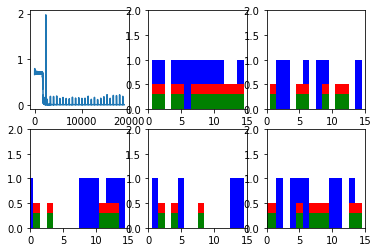

Step 400 Loss 0.00022043842


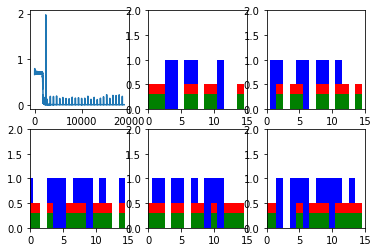

Step 500 Loss 0.00018170514


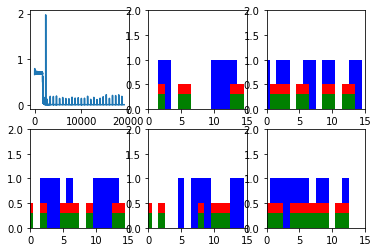

Step 600 Loss 0.00017311667


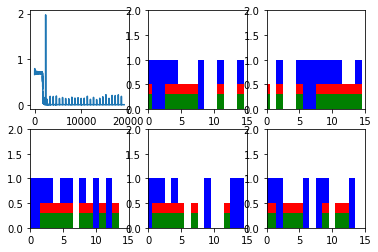

New data, epoch 29
Step 0 Loss 0.21318337


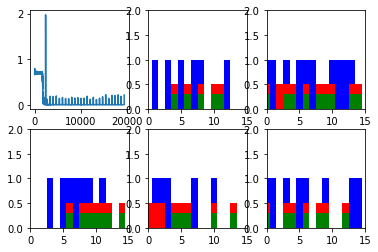

Step 100 Loss 0.00013611537


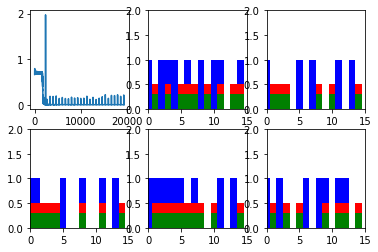

Step 200 Loss 0.00016540656


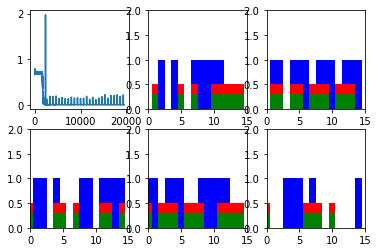

Step 300 Loss 0.00016129576


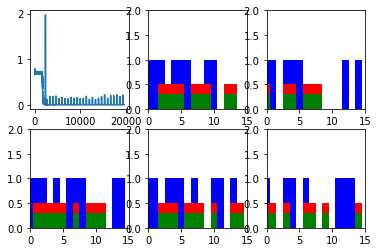

Step 400 Loss 0.00015440494


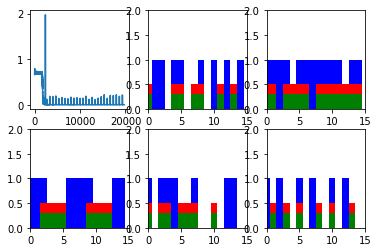

Step 500 Loss 0.00013837154


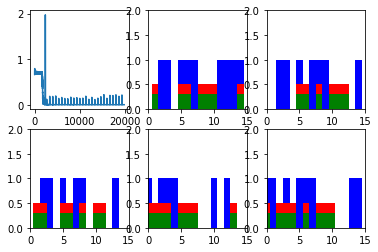

Step 600 Loss 0.00016281963


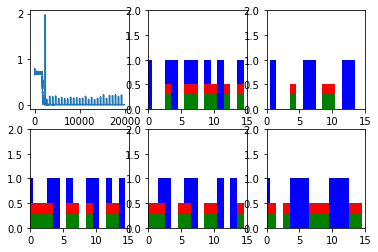

New data, epoch 30
Step 0 Loss 0.14429209


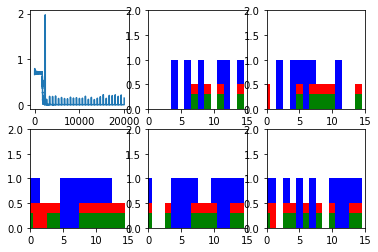

Step 100 Loss 0.00016778287


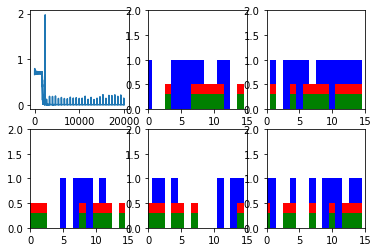

Step 200 Loss 0.0001690952


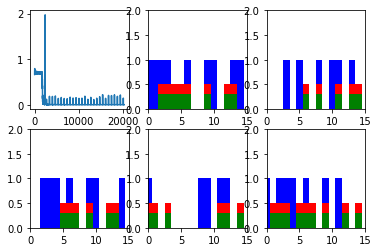

Step 300 Loss 0.00015463338


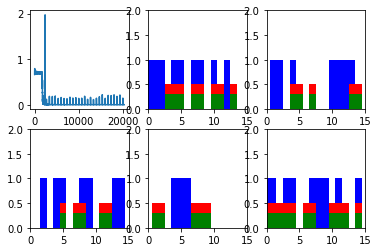

Step 400 Loss 0.00013955416


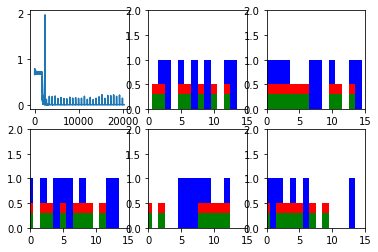

Step 500 Loss 0.00023798444


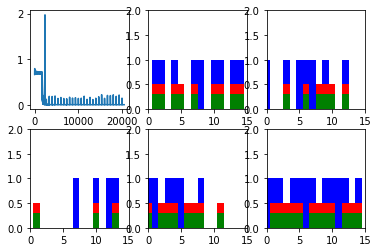

Step 600 Loss 0.00014956672


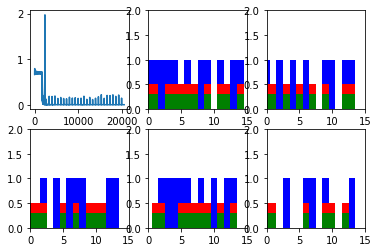

New data, epoch 31
Step 0 Loss 0.15568118


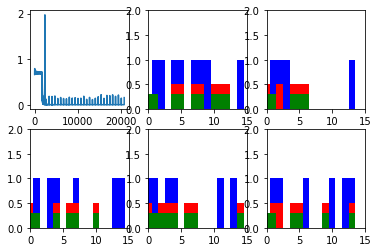

Step 100 Loss 0.00016430239


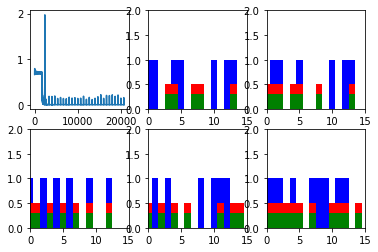

Step 200 Loss 0.00014723292


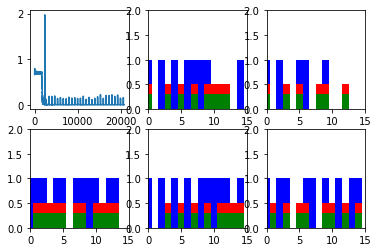

Step 300 Loss 0.00016576536


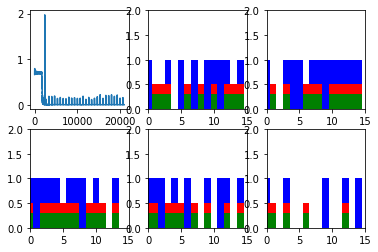

Step 400 Loss 0.00017420434


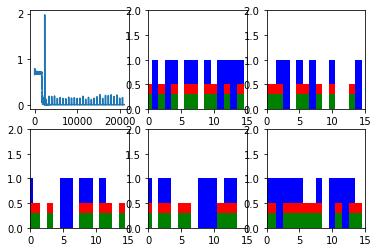

Step 500 Loss 0.00014160728


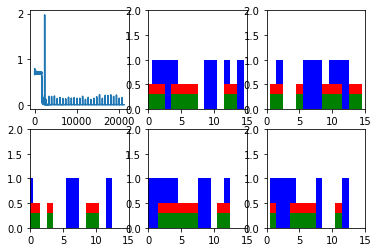

Step 600 Loss 0.0001273244


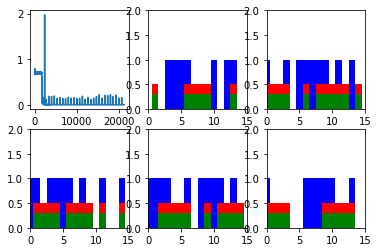

New data, epoch 32
Step 0 Loss 0.14735587


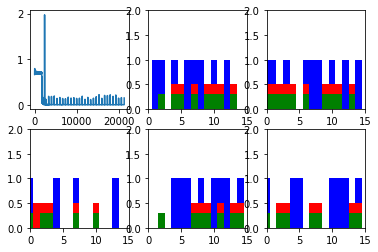

Step 100 Loss 0.00016649751


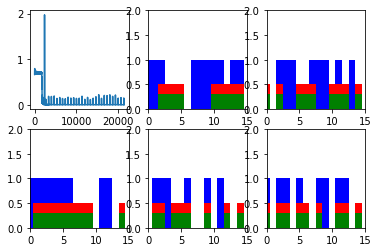

Step 200 Loss 0.00015203207


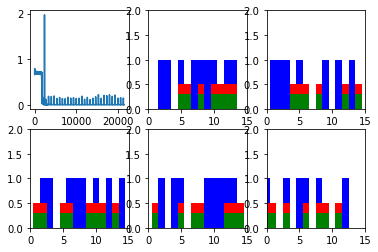

Step 300 Loss 0.0001657768


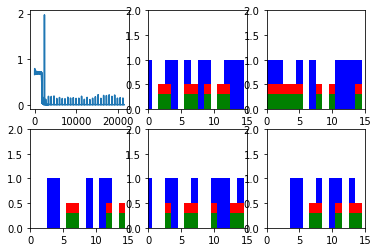

Step 400 Loss 0.00015802399


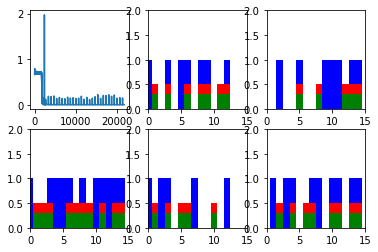

Step 500 Loss 0.00014784264


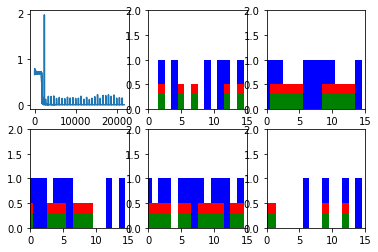

Step 600 Loss 0.000131892


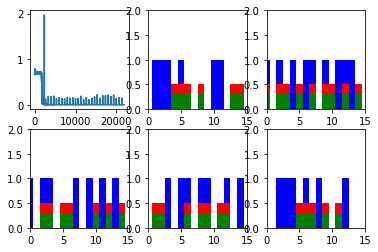

New data, epoch 33
Step 0 Loss 0.28841928


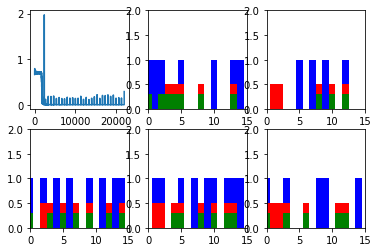

Step 100 Loss 0.00016109795


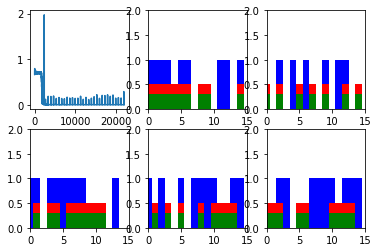

Step 200 Loss 0.00016903595


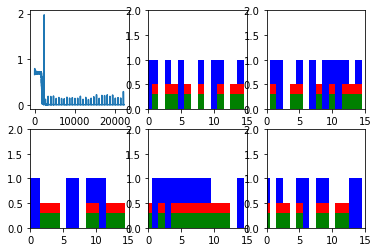

Step 300 Loss 0.00015227804


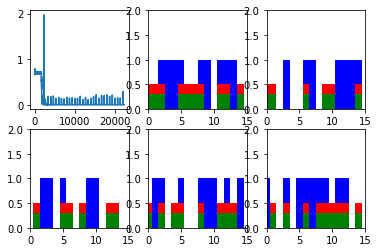

Step 400 Loss 0.0001251405


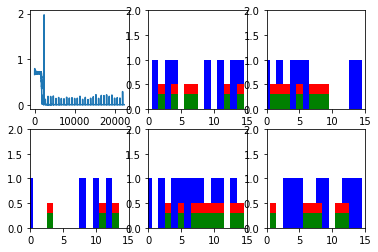

Step 500 Loss 0.00016771111


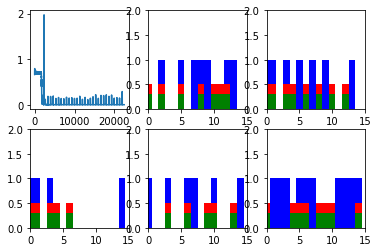

Step 600 Loss 0.00012854648


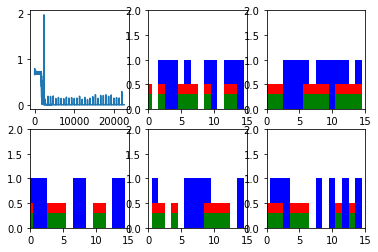

New data, epoch 34
Step 0 Loss 0.1933041


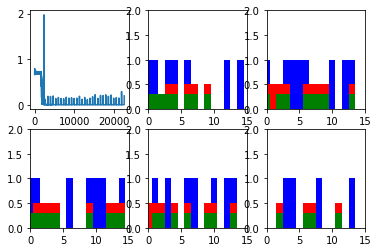

Step 100 Loss 0.00013562269


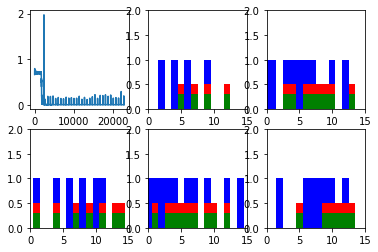

Step 200 Loss 0.000102395934


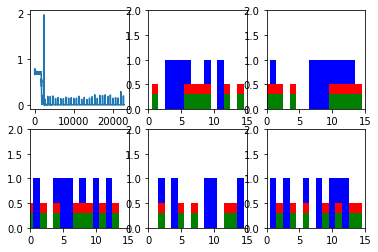

Step 300 Loss 0.0001256322


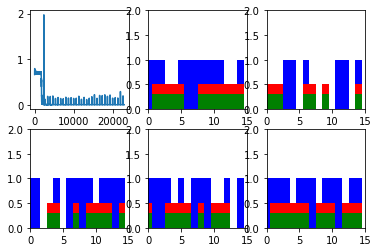

Step 400 Loss 0.00013895208


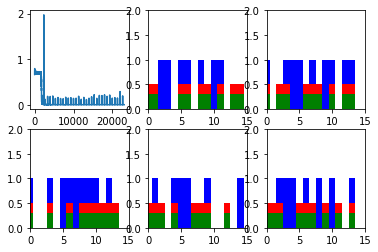

Step 500 Loss 0.00013724373


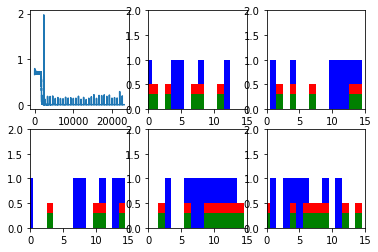

Step 600 Loss 0.00014367257


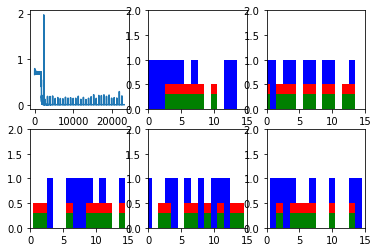

New data, epoch 35
Step 0 Loss 0.1598225


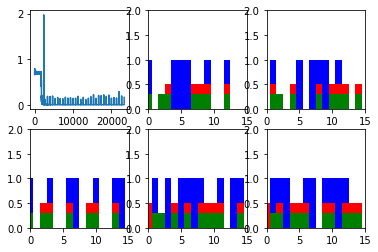

Step 100 Loss 0.00014524293


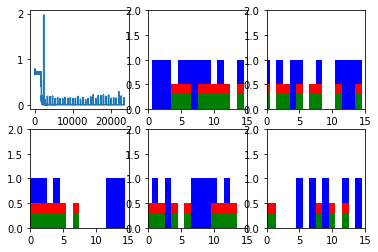

Step 200 Loss 0.00015242597


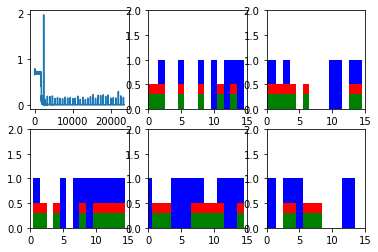

Step 300 Loss 0.0001533143


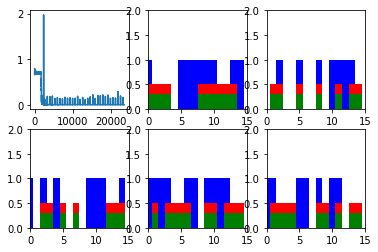

Step 400 Loss 0.00013461165


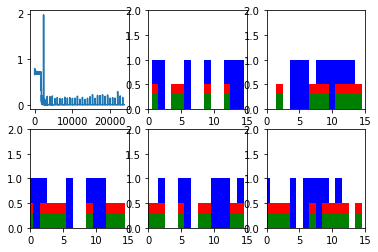

Step 500 Loss 0.00013196003


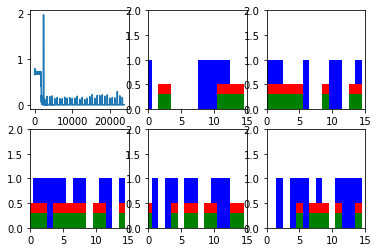

Step 600 Loss 0.00012403552


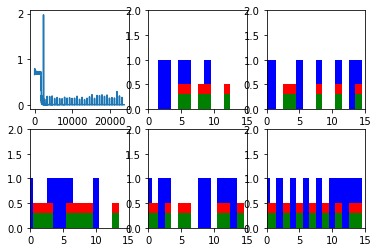

New data, epoch 36
Step 0 Loss 0.34207836


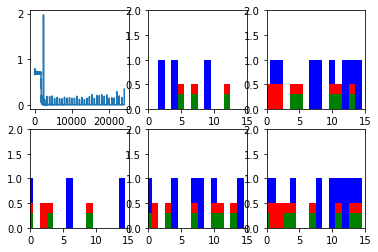

Step 100 Loss 0.000107310465


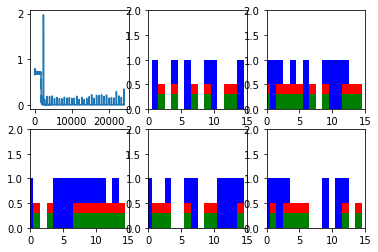

Step 200 Loss 0.00012755496


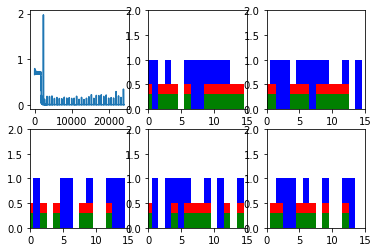

Step 300 Loss 0.000116775605


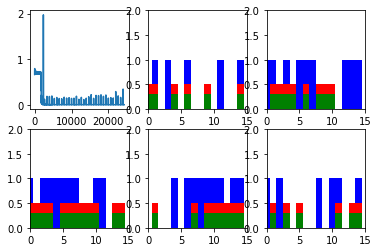

Step 400 Loss 0.00014449634


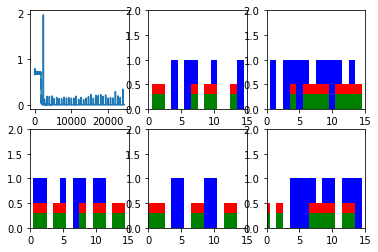

Step 500 Loss 0.000110846624


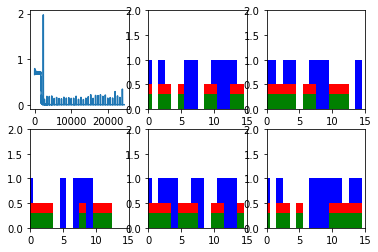

Step 600 Loss 0.0001318118


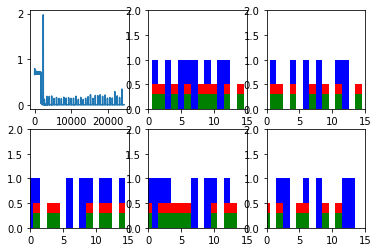

New data, epoch 37
Step 0 Loss 0.1466702


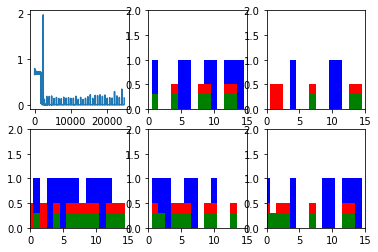

Step 100 Loss 0.0001163677


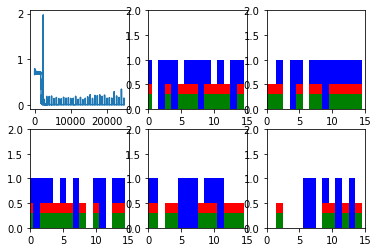

Step 200 Loss 0.000110183544


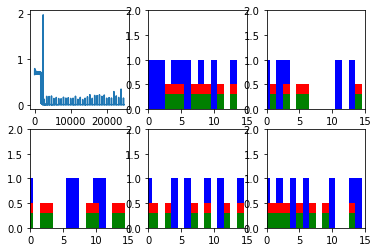

Step 300 Loss 0.00012954963


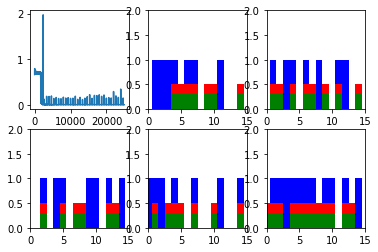

Step 400 Loss 0.00011136262


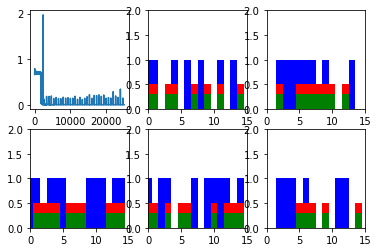

Step 500 Loss 9.813913e-05


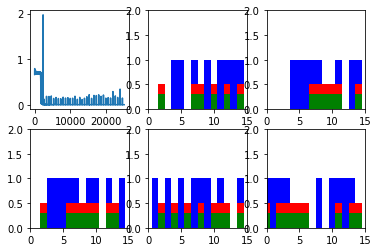

Step 600 Loss 0.00010749425


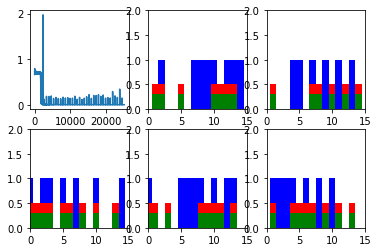

New data, epoch 38
Step 0 Loss 0.19272695


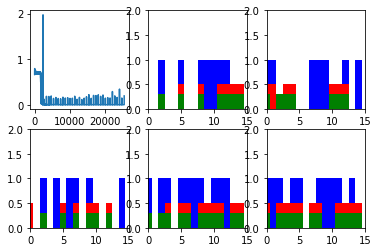

Step 100 Loss 0.00013274593


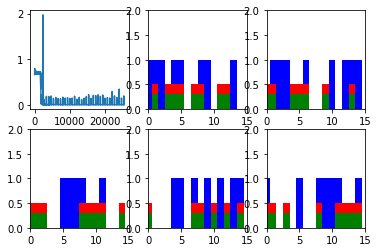

Step 200 Loss 0.00020753355


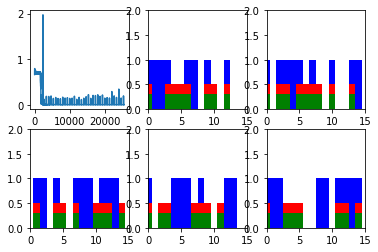

Step 300 Loss 0.00016251246


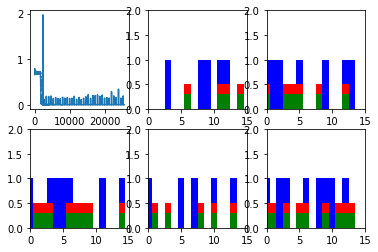

Step 400 Loss 0.0001897594


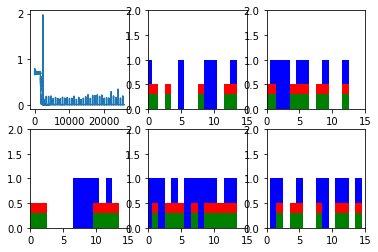

Step 500 Loss 0.00012907396


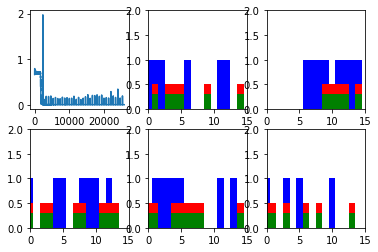

Step 600 Loss 0.00013447854


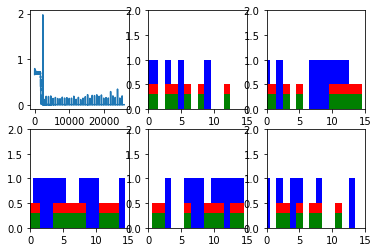

New data, epoch 39
Step 0 Loss 0.3583317


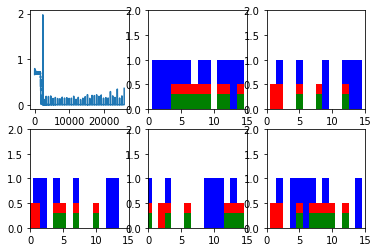

Step 100 Loss 0.000119798504


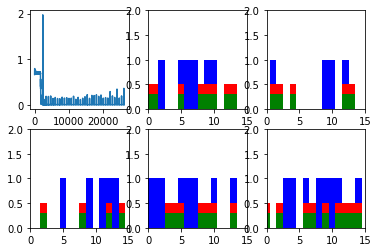

Step 200 Loss 0.000105802195


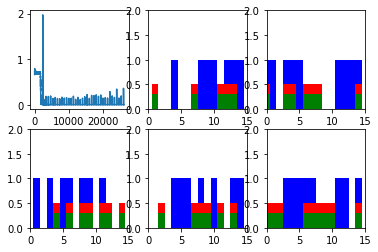

Step 300 Loss 0.000113146314


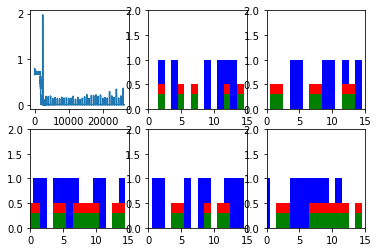

Step 400 Loss 0.00010236807


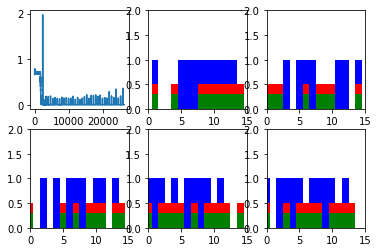

Step 500 Loss 0.00012191116


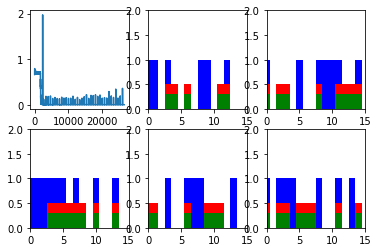

Step 600 Loss 9.769663e-05


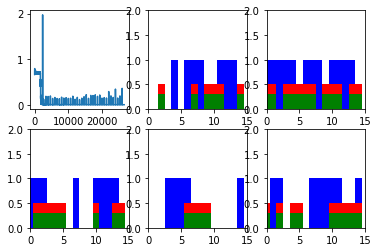

New data, epoch 40
Step 0 Loss 0.18632537


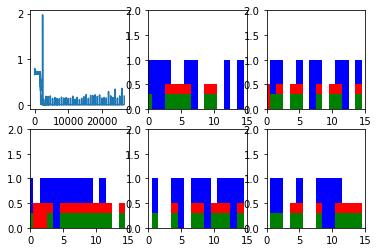

Step 100 Loss 0.000108019594


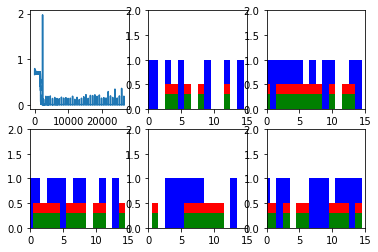

Step 200 Loss 0.00012809958


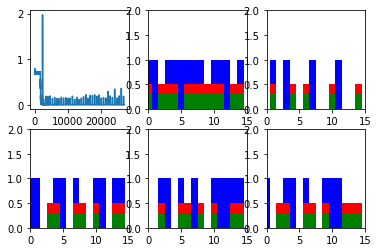

Step 300 Loss 0.000111317946


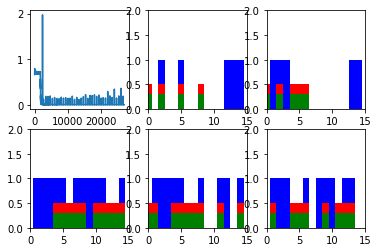

Step 400 Loss 0.00011140437


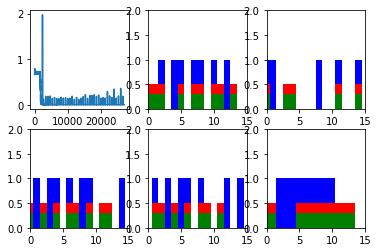

Step 500 Loss 0.00014789212


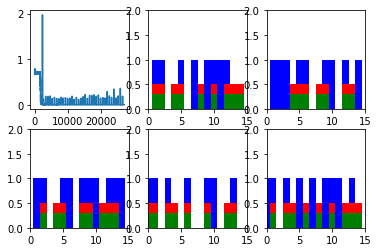

Step 600 Loss 9.0874215e-05


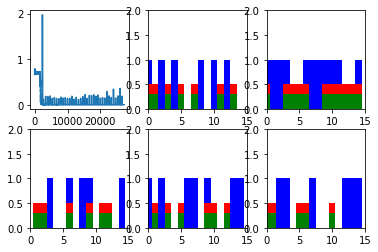

New data, epoch 41
Step 0 Loss 0.13865562


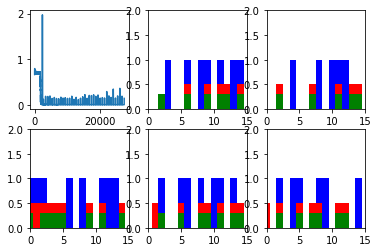

Step 100 Loss 0.0001163486


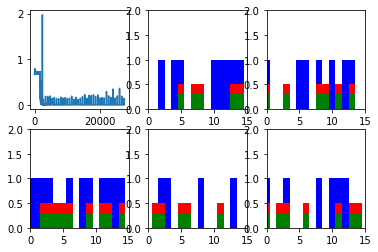

Step 200 Loss 0.00010832951


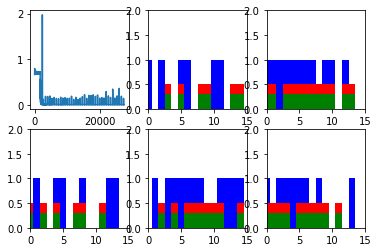

Step 300 Loss 0.00010473397


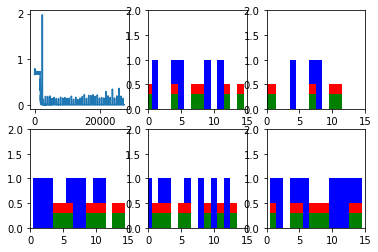

Step 400 Loss 0.000100869795


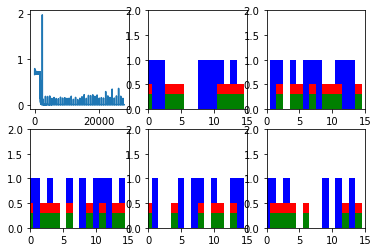

Step 500 Loss 0.000109035485


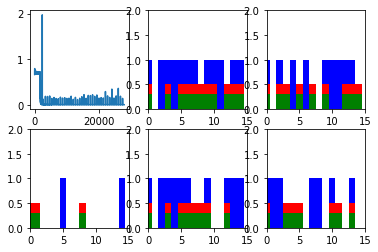

Step 600 Loss 0.00011271251


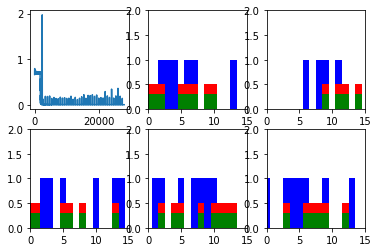

New data, epoch 42
Step 0 Loss 0.21592659


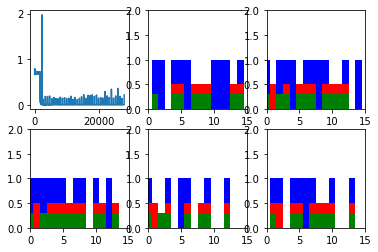

Step 100 Loss 0.00011507346


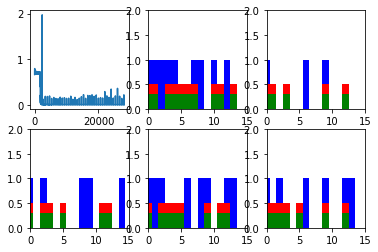

Step 200 Loss 0.00013569236


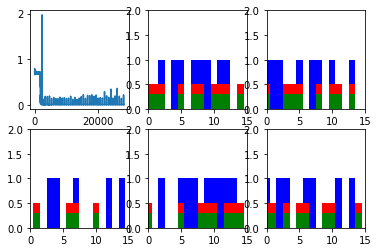

Step 300 Loss 0.00012916094


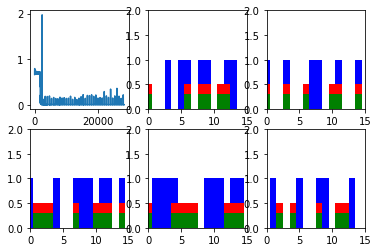

Step 400 Loss 0.000106050684


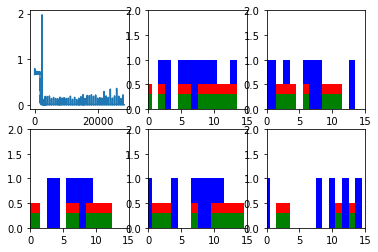

Step 500 Loss 0.00011971969


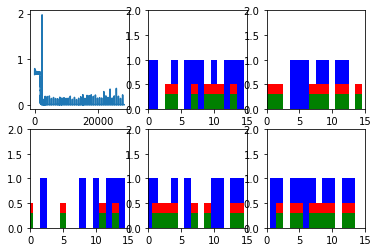

Step 600 Loss 0.000112999245


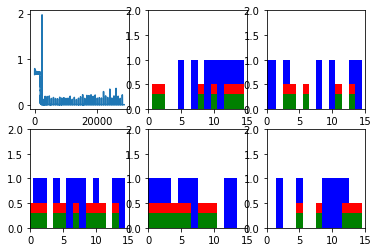

New data, epoch 43
Step 0 Loss 0.11554245


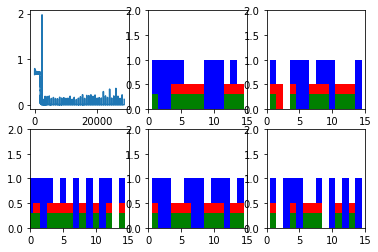

Step 100 Loss 0.00010783266


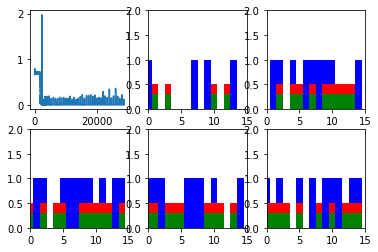

Step 200 Loss 0.00010269799


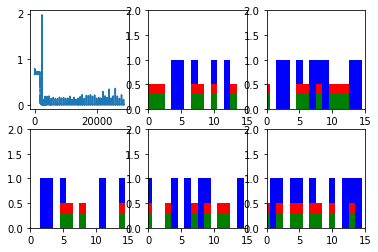

Step 300 Loss 9.7458e-05


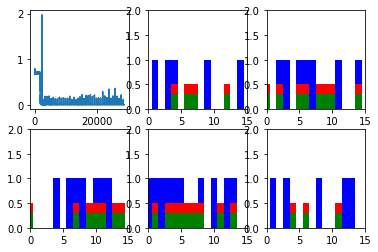

Step 400 Loss 0.0001174514


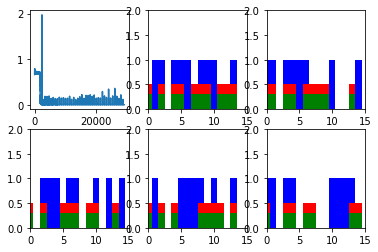

Step 500 Loss 0.00011436527


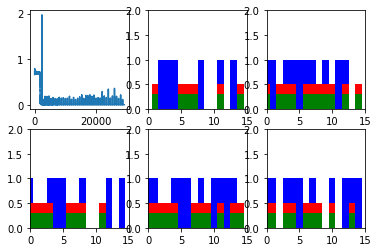

Step 600 Loss 0.00011451273


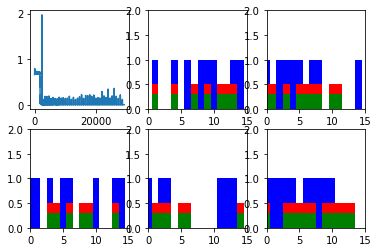

New data, epoch 44
Step 0 Loss 0.34230942


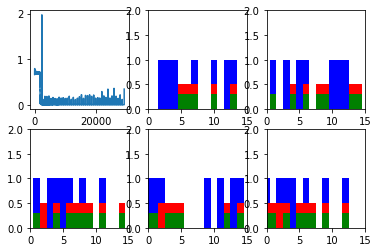

Step 100 Loss 0.00011148478


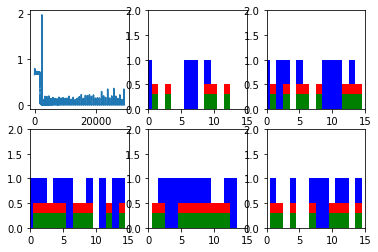

Step 200 Loss 0.00010498499


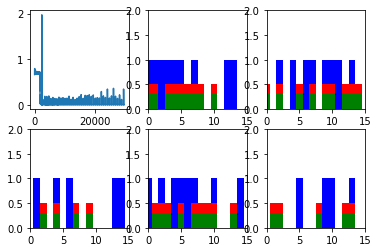

Step 300 Loss 9.9919256e-05


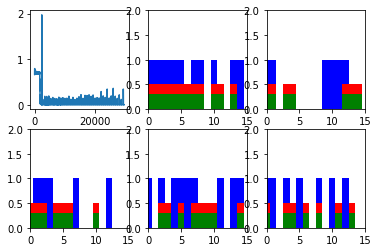

Step 400 Loss 0.0001005944


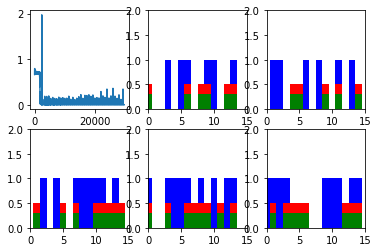

Step 500 Loss 0.000105986954


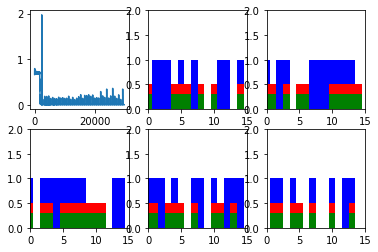

Step 600 Loss 0.000106469306


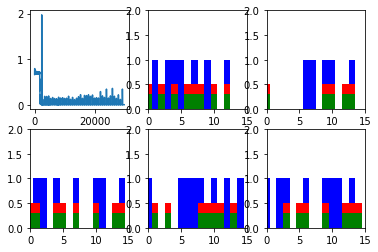

New data, epoch 45
Step 0 Loss 0.16251978


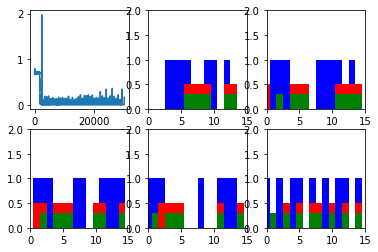

Step 100 Loss 9.68918e-05


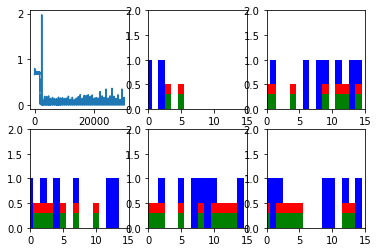

Step 200 Loss 0.0001251248


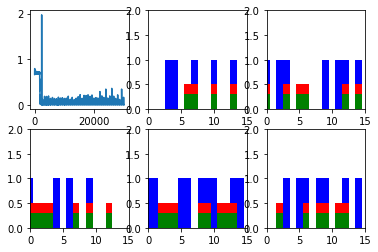

Step 300 Loss 0.00010530791


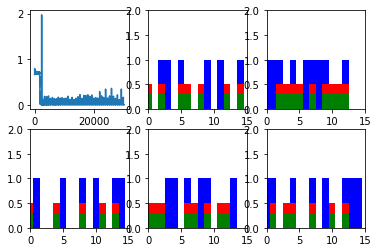

Step 400 Loss 9.01374e-05


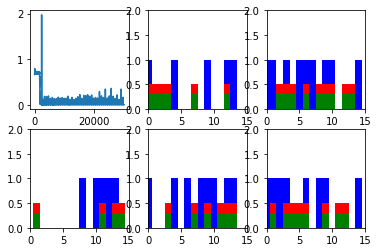

Step 500 Loss 0.00010002309


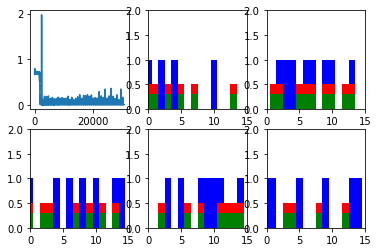

Step 600 Loss 9.613197e-05


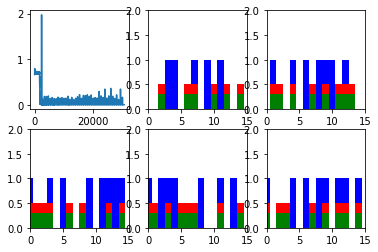

New data, epoch 46
Step 0 Loss 0.1394218


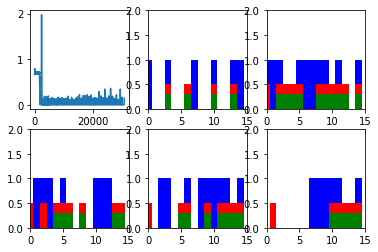

Step 100 Loss 9.534675e-05


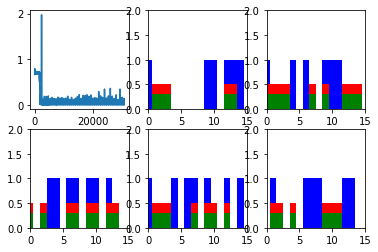

Step 200 Loss 8.1385624e-05


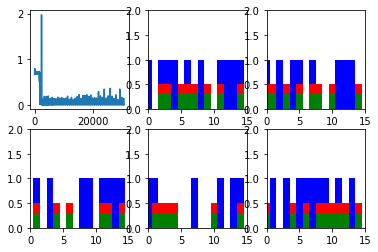

Step 300 Loss 8.003314e-05


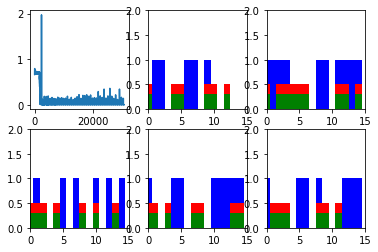

Step 400 Loss 0.000112791866


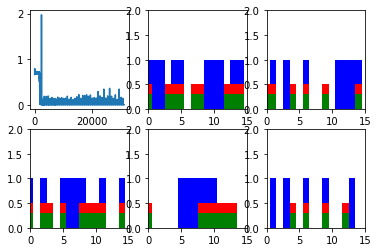

Step 500 Loss 0.000106016756


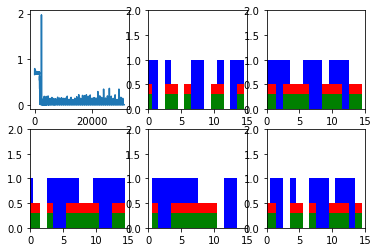

Step 600 Loss 9.896587e-05


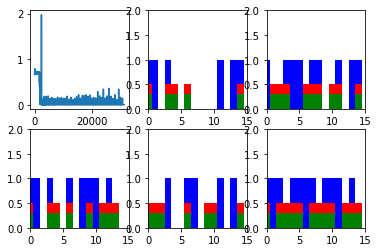

New data, epoch 47
Step 0 Loss 0.25446495


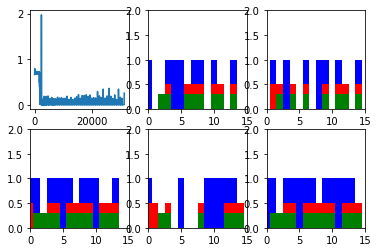

Step 100 Loss 0.00013099099


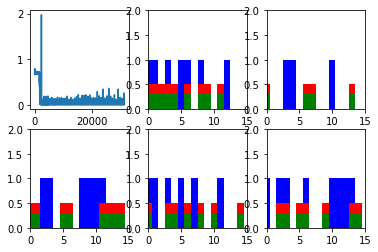

Step 200 Loss 0.00014510573


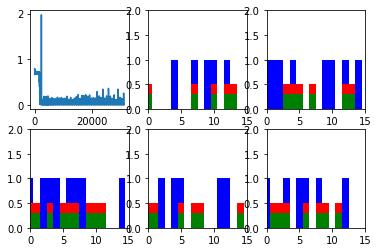

Step 300 Loss 0.00013471235


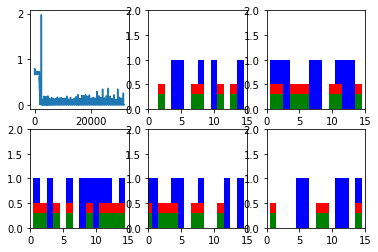

Step 400 Loss 0.00012094078


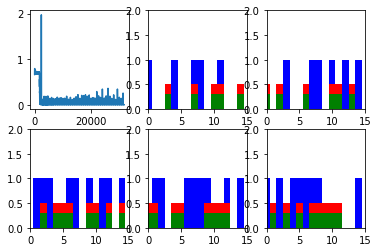

Step 500 Loss 0.000102868406


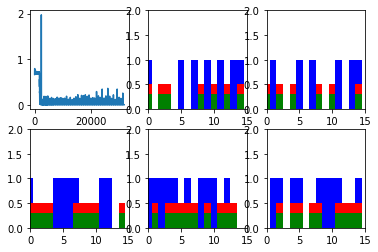

Step 600 Loss 0.00012599431


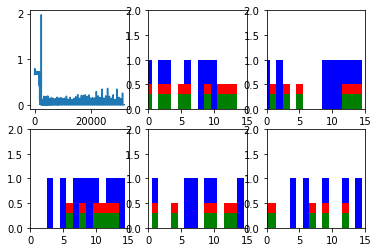

New data, epoch 48
Step 0 Loss 0.338906


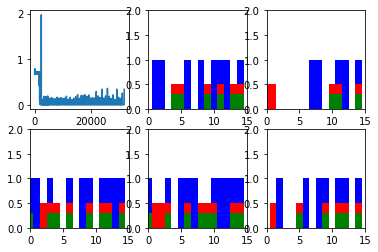

Step 100 Loss 0.00012475571


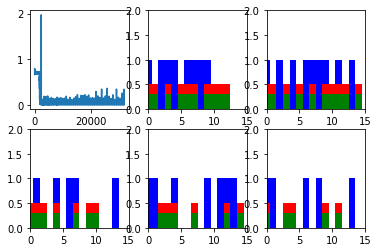

Step 200 Loss 0.00011392494


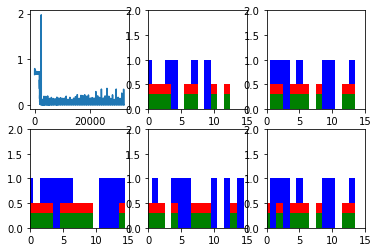

Step 300 Loss 0.00013595287


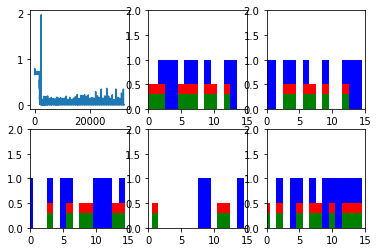

Step 400 Loss 0.0001154233


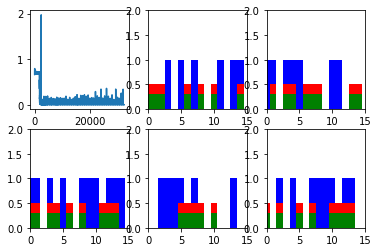

Step 500 Loss 0.00012105028


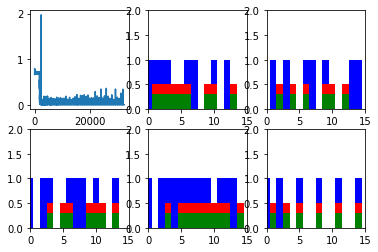

Step 600 Loss 0.00012753277


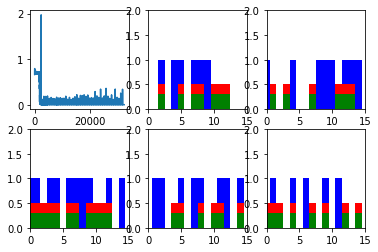

New data, epoch 49
Step 0 Loss 0.13600153


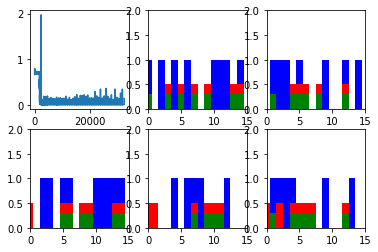

Step 100 Loss 0.00011699893


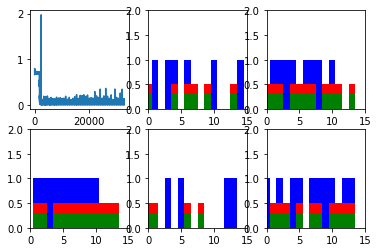

Step 200 Loss 0.00010503386


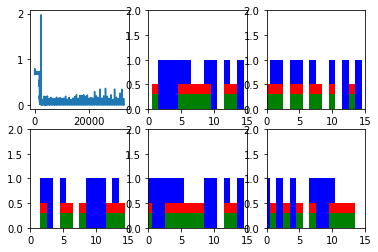

Step 300 Loss 0.000105653875


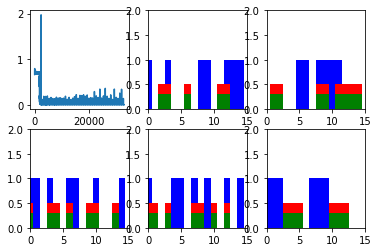

Step 400 Loss 0.00010687371


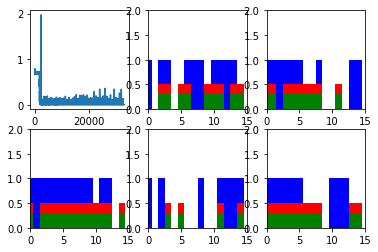

Step 500 Loss 0.00011663615


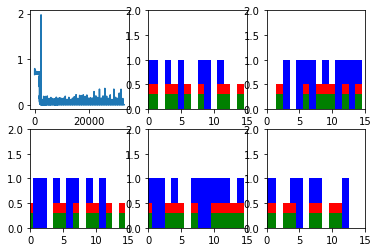

Step 600 Loss 0.00012873532


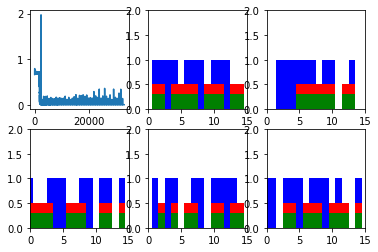

New data, epoch 50
Step 0 Loss 0.21681163


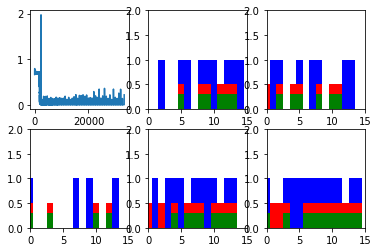

Step 100 Loss 9.413393e-05


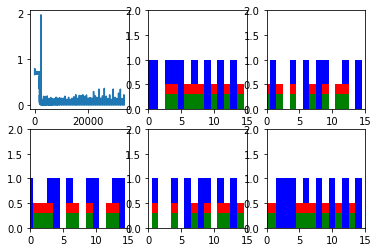

Step 200 Loss 0.00010500692


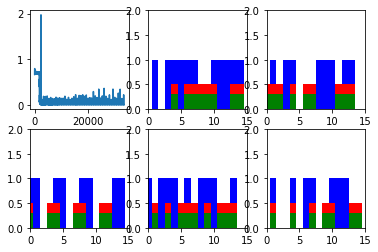

Step 300 Loss 9.394684e-05


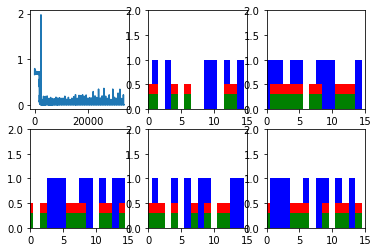

Step 400 Loss 9.5201336e-05


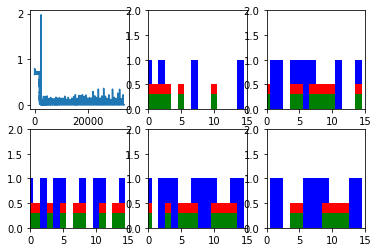

Step 500 Loss 8.888359e-05


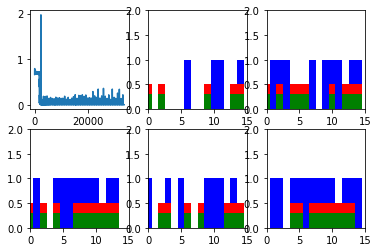

Step 600 Loss 8.960674e-05


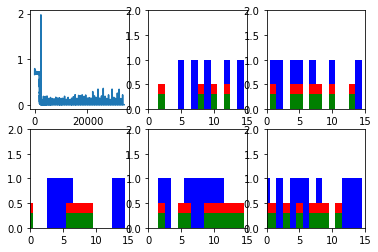

New data, epoch 51
Step 0 Loss 0.21148258


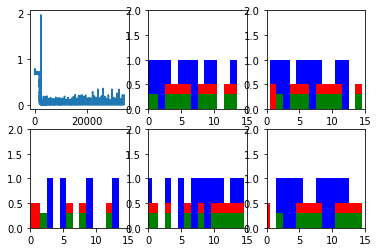

Step 100 Loss 0.00012757216


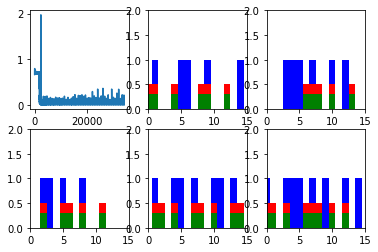

Step 200 Loss 0.000113590475


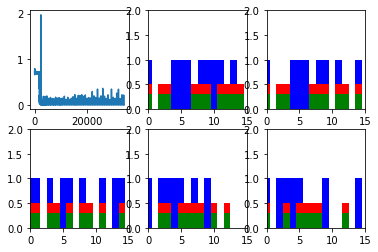

Step 300 Loss 8.4342544e-05


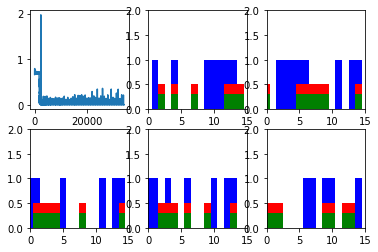

Step 400 Loss 9.3750816e-05


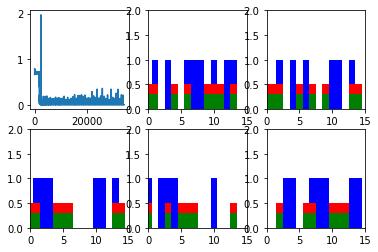

Step 500 Loss 0.00010564104


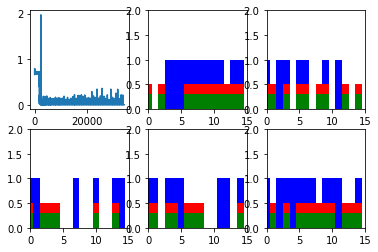

Step 600 Loss 9.38038e-05


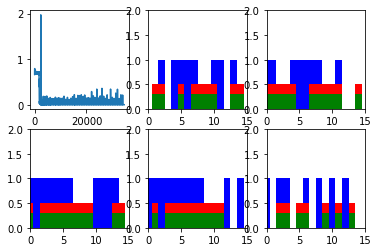

New data, epoch 52
Step 0 Loss 0.20957193


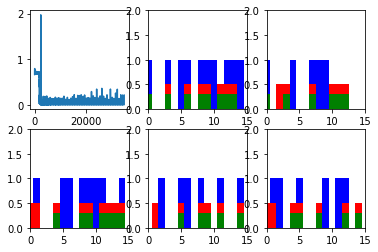

Step 100 Loss 0.00010867352


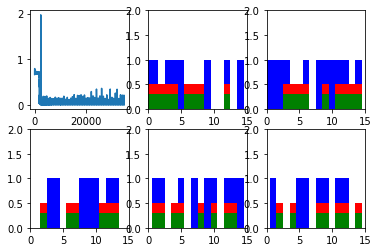

Step 200 Loss 9.927796e-05


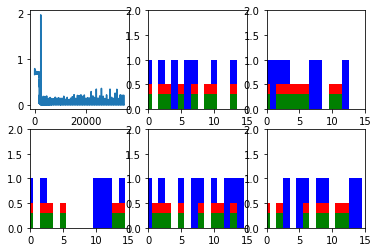

Step 300 Loss 8.266272e-05


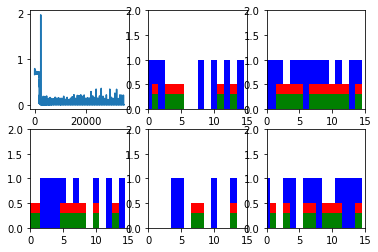

Step 400 Loss 0.00010326557


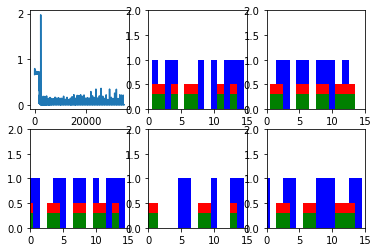

Step 500 Loss 9.531119e-05


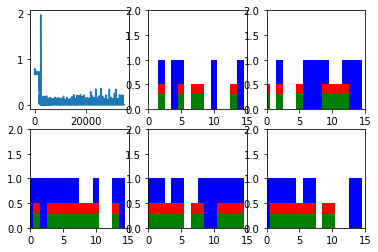

Step 600 Loss 9.707352e-05


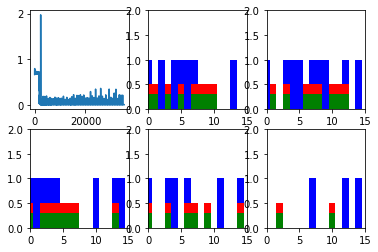

New data, epoch 53
Step 0 Loss 0.18694153


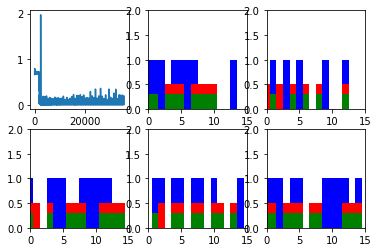

Step 100 Loss 9.1339185e-05


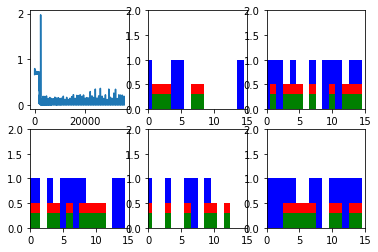

Step 200 Loss 8.923773e-05


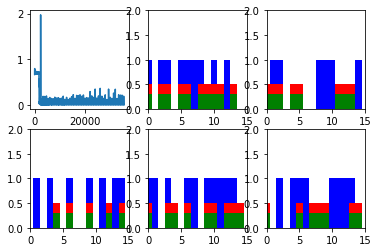

Step 300 Loss 9.092668e-05


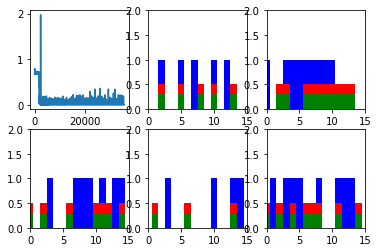

Step 400 Loss 8.0911974e-05


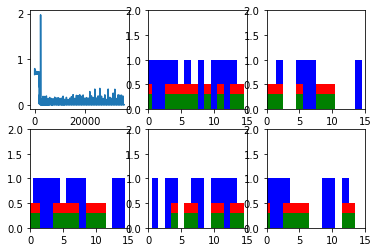

Step 500 Loss 9.196943e-05


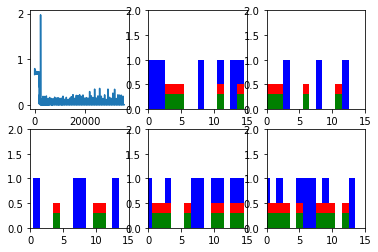

Step 600 Loss 9.275284e-05


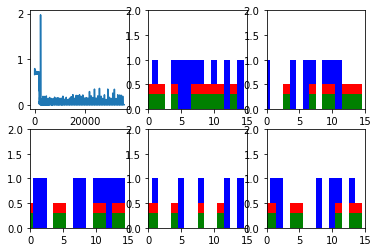

New data, epoch 54
Step 0 Loss 0.16870661


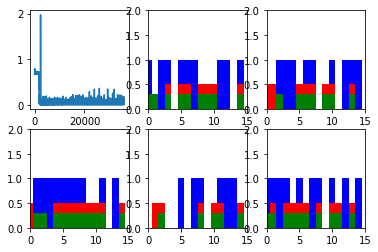

Step 100 Loss 9.6913674e-05


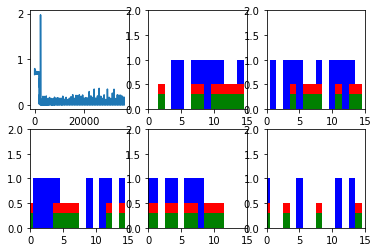

Step 200 Loss 9.221628e-05


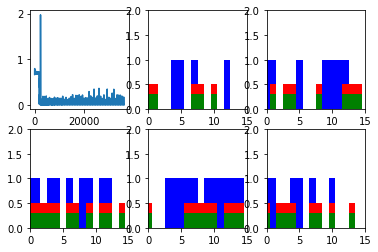

Step 300 Loss 7.152519e-05


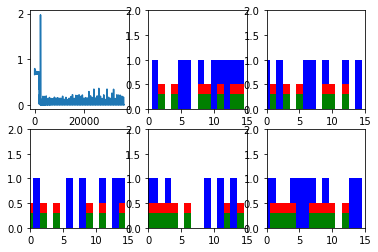

Step 400 Loss 0.00010386284


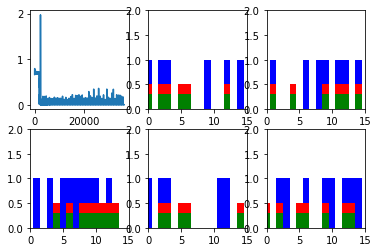

Step 500 Loss 8.662697e-05


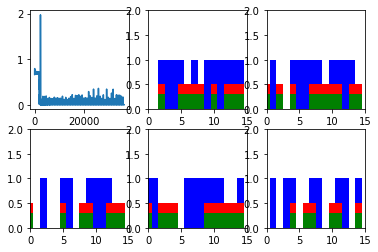

Step 600 Loss 6.452112e-05


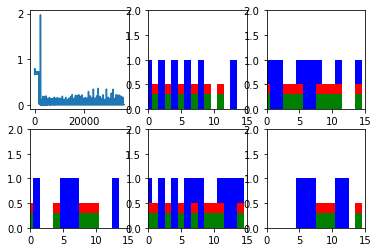

New data, epoch 55
Step 0 Loss 0.2525359


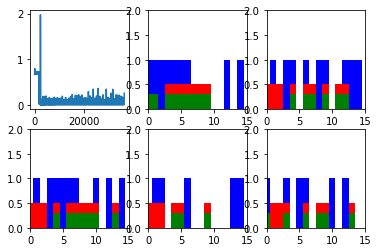

Step 100 Loss 9.9230834e-05


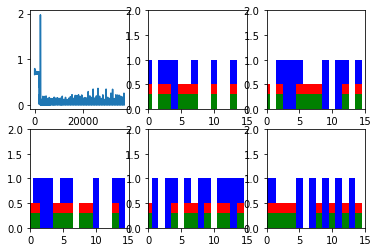

Step 200 Loss 9.0879694e-05


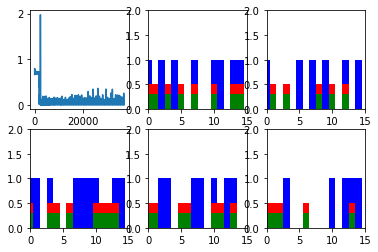

Step 300 Loss 8.267813e-05


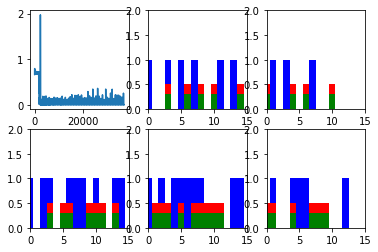

Step 400 Loss 8.9245594e-05


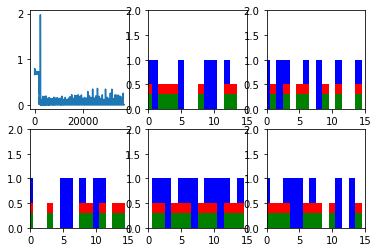

Step 500 Loss 0.00010375433


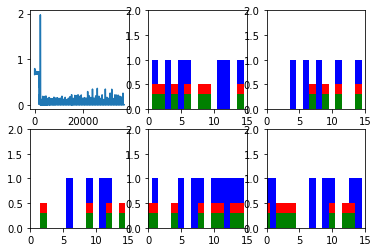

Step 600 Loss 0.0001095795


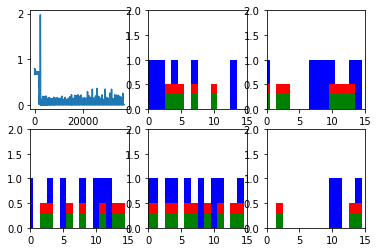

New data, epoch 56
Step 0 Loss 0.21946251


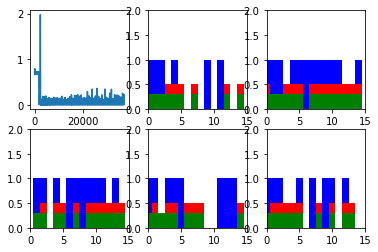

Step 100 Loss 0.00010367611


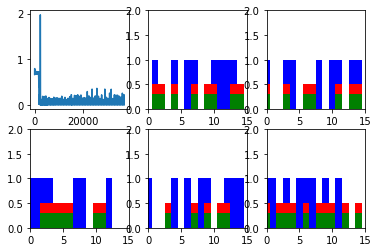

Step 200 Loss 8.526594e-05


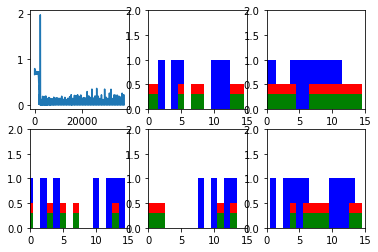

Step 300 Loss 8.8391214e-05


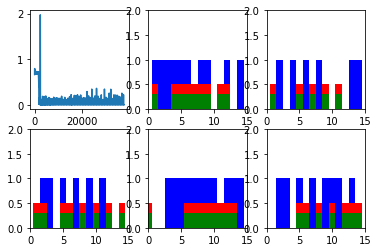

Step 400 Loss 0.0001146502


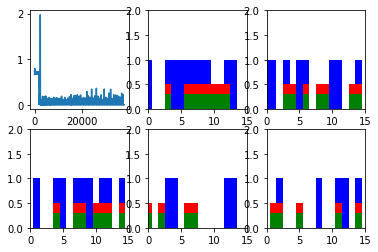

Step 500 Loss 8.2365266e-05


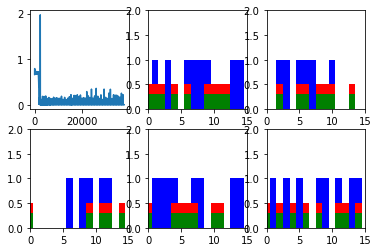

Step 600 Loss 9.698748e-05


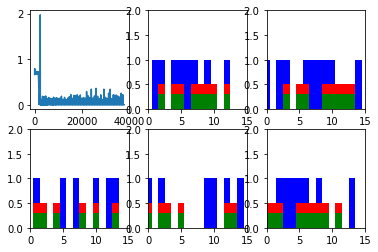

New data, epoch 57
Step 0 Loss 0.12568484


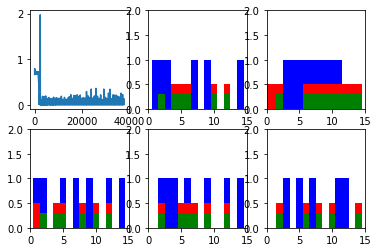

Step 100 Loss 8.6525215e-05


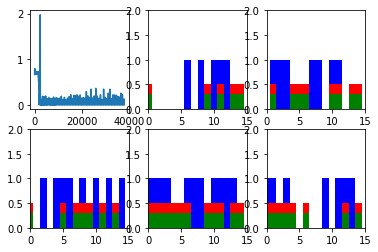

Step 200 Loss 0.0001005224


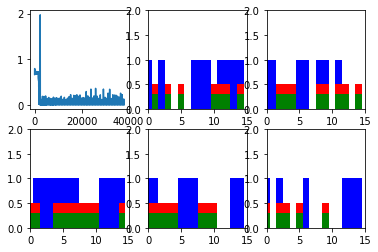

Step 300 Loss 8.448873e-05


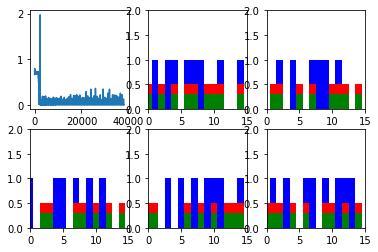

Step 400 Loss 7.783891e-05


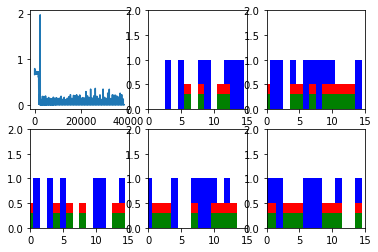

Step 500 Loss 9.643363e-05


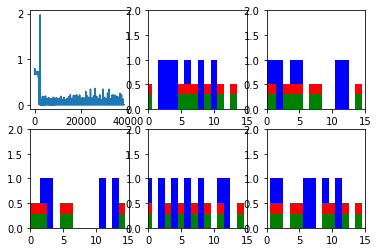

Step 600 Loss 0.000103518454


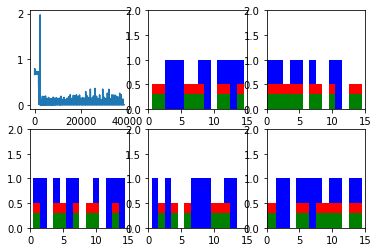

New data, epoch 58
Step 0 Loss 0.10383598


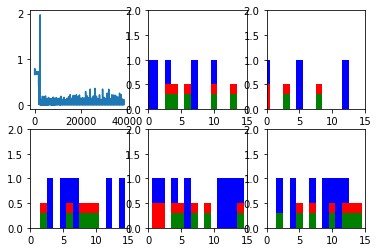

Step 100 Loss 0.000106648105


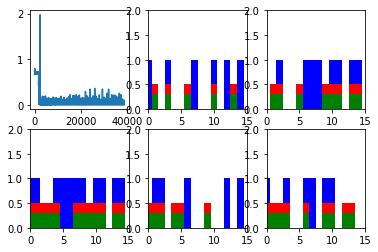

Step 200 Loss 7.646445e-05


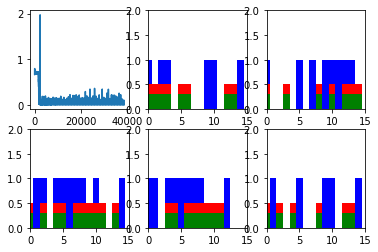

Step 300 Loss 9.347521e-05


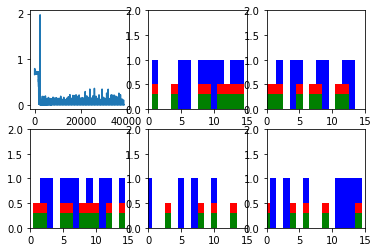

Step 400 Loss 8.890373e-05


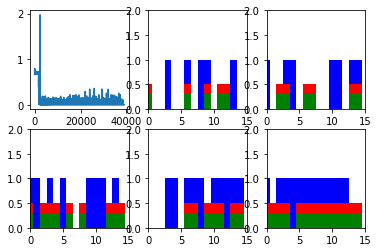

Step 500 Loss 9.252503e-05


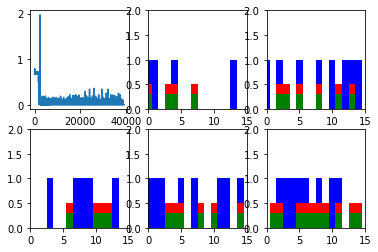

Step 600 Loss 7.600726e-05


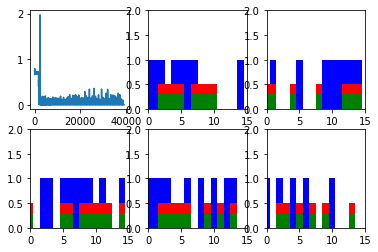

New data, epoch 59
Step 0 Loss 0.20516166


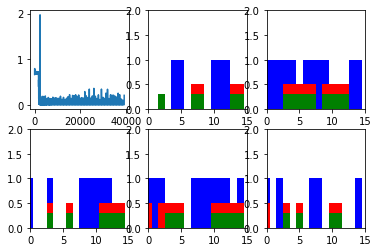

Step 100 Loss 8.3716e-05


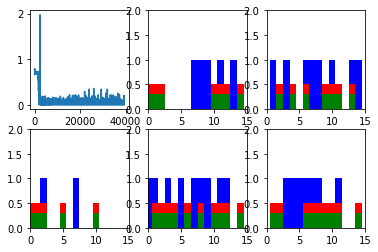

Step 200 Loss 8.479055e-05


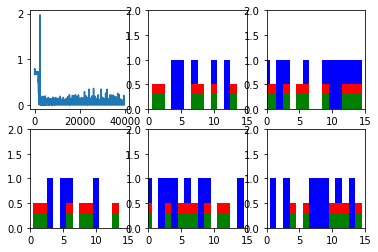

Step 300 Loss 8.8953166e-05


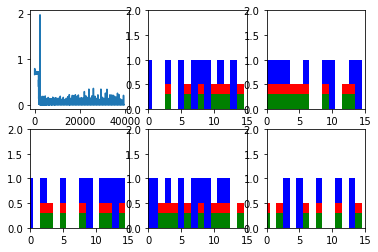

Step 400 Loss 7.311275e-05


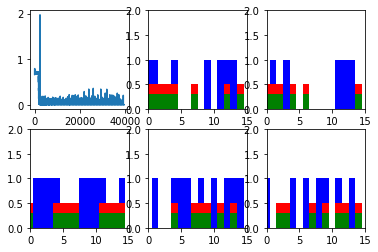

Step 500 Loss 7.815531e-05


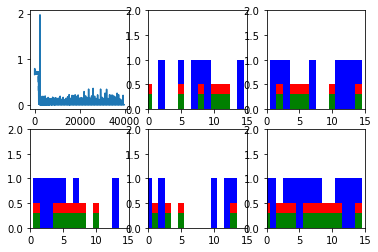

Step 600 Loss 8.199889e-05


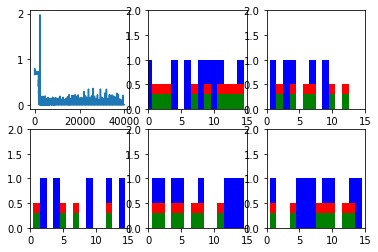

New data, epoch 60
Step 0 Loss 0.40353215


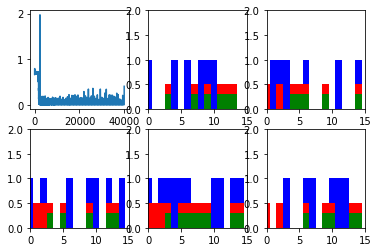

Step 100 Loss 8.620881e-05


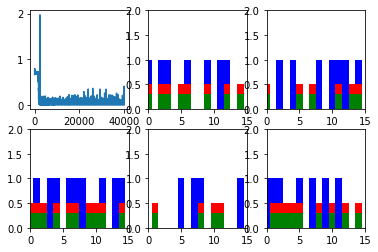

Step 200 Loss 8.0746686e-05


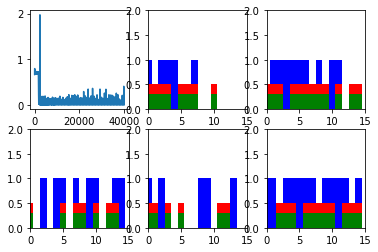

Step 300 Loss 8.127857e-05


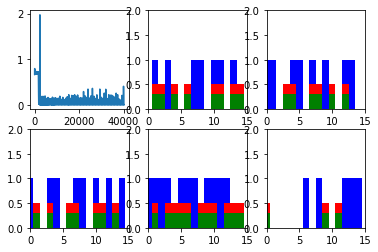

Step 400 Loss 8.263794e-05


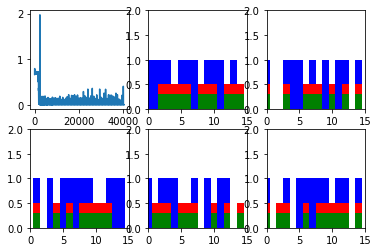

Step 500 Loss 7.6777724e-05


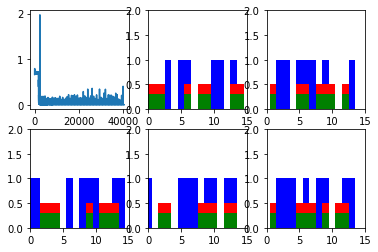

Step 600 Loss 7.815143e-05


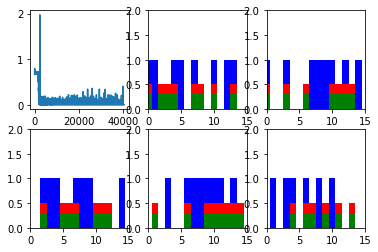

New data, epoch 61
Step 0 Loss 0.1487444


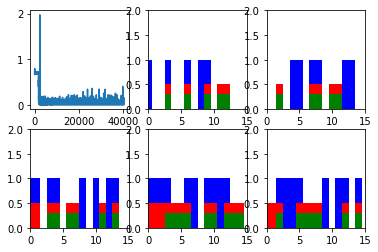

Step 100 Loss 7.515598e-05


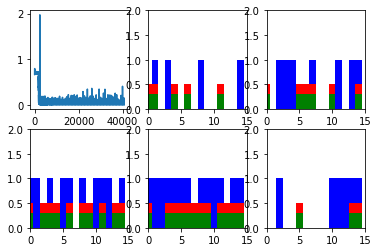

Step 200 Loss 7.219593e-05


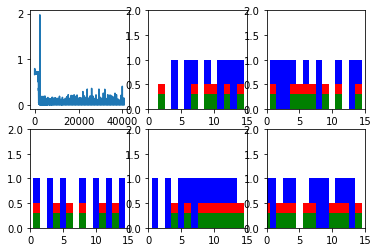

Step 300 Loss 8.4126914e-05


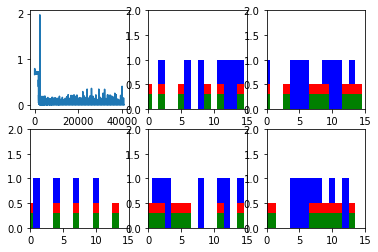

Step 400 Loss 7.821344e-05


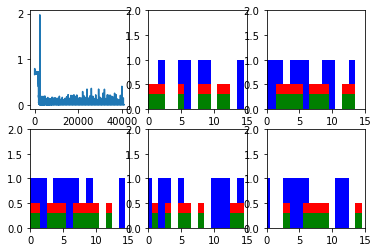

Step 500 Loss 9.07068e-05


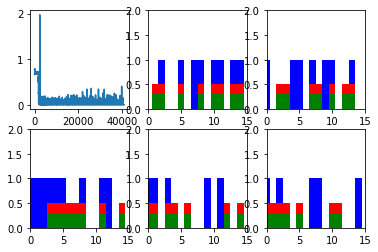

Step 600 Loss 7.8968675e-05


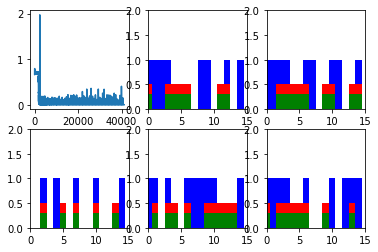

New data, epoch 62
Step 0 Loss 0.17617077


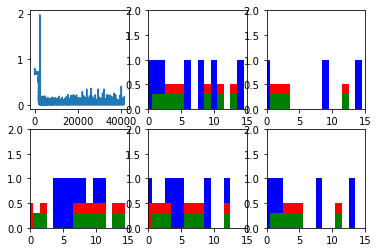

Step 100 Loss 8.779397e-05


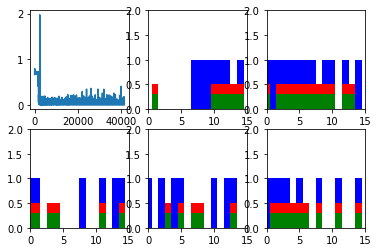

Step 200 Loss 6.9966576e-05


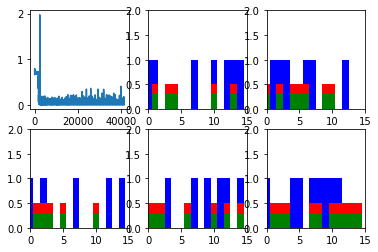

Step 300 Loss 7.588541e-05


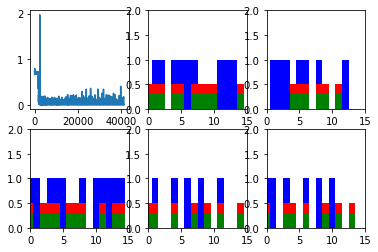

Step 400 Loss 7.4779586e-05


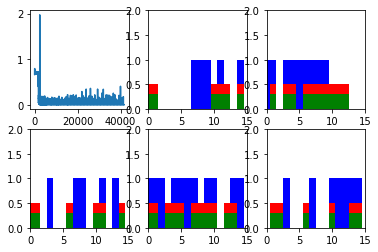

Step 500 Loss 7.279808e-05


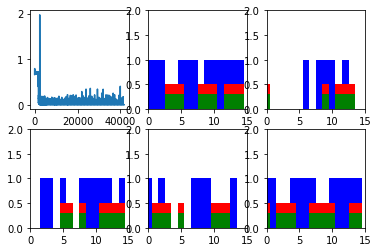

Step 600 Loss 6.965501e-05


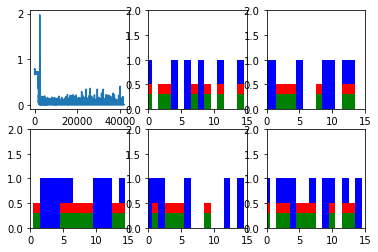

New data, epoch 63
Step 0 Loss 0.28014764


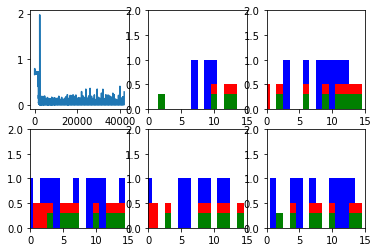

Step 100 Loss 6.73079e-05


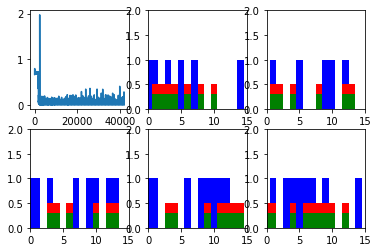

Step 200 Loss 8.1355975e-05


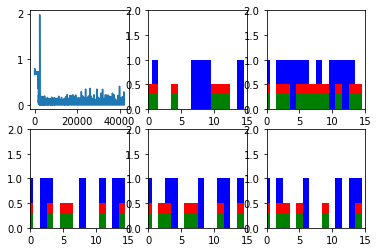

Step 300 Loss 6.662941e-05


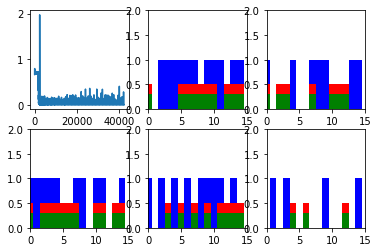

Step 400 Loss 7.072961e-05


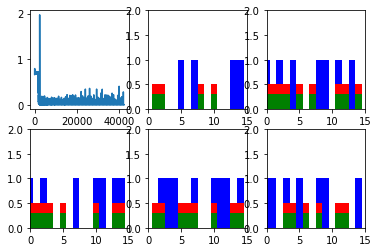

Step 500 Loss 6.8887806e-05


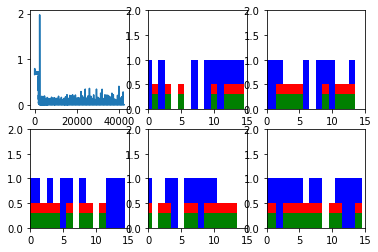

Step 600 Loss 6.725237e-05


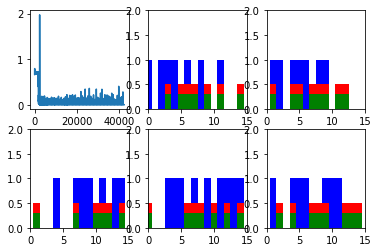

New data, epoch 64
Step 0 Loss 0.18160486


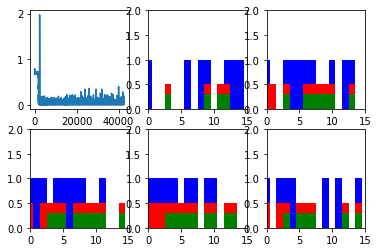

Step 100 Loss 0.00016145852


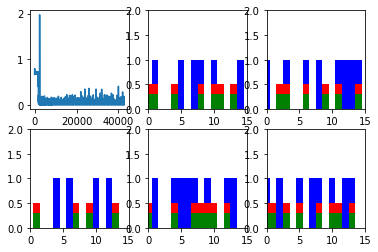

Step 200 Loss 9.783764e-05


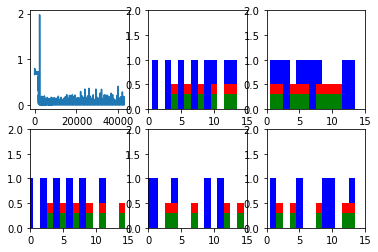

Step 300 Loss 7.681226e-05


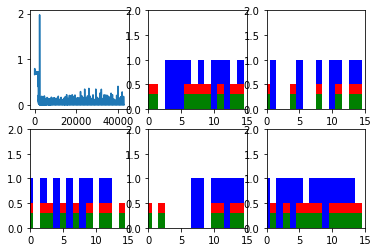

Step 400 Loss 8.313199e-05


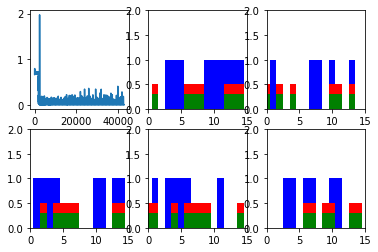

Step 500 Loss 0.00010653276


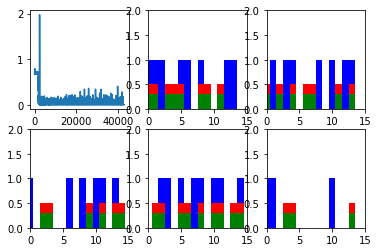

Step 600 Loss 0.00011120991


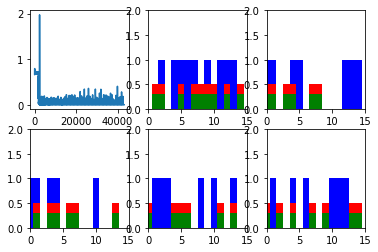

New data, epoch 65
Step 0 Loss 0.4042067


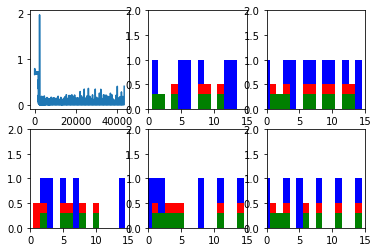

Step 100 Loss 6.3799e-05


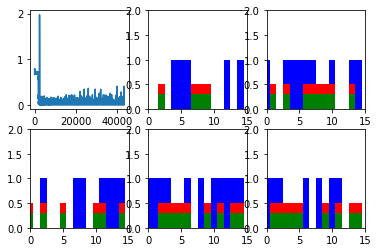

Step 200 Loss 6.823933e-05


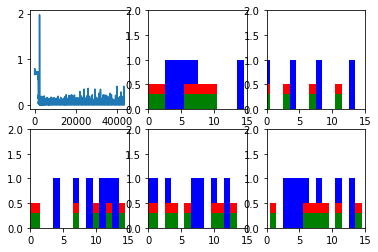

Step 300 Loss 7.3732066e-05


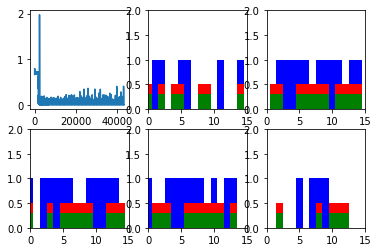

Step 400 Loss 8.3882594e-05


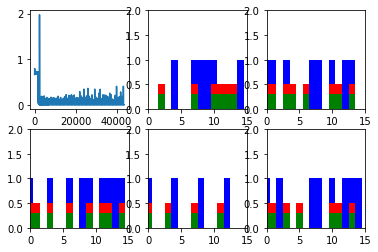

Step 500 Loss 6.571857e-05


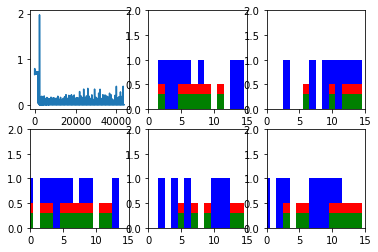

Step 600 Loss 7.119248e-05


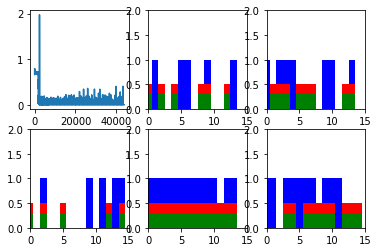

New data, epoch 66
Step 0 Loss 0.13282974


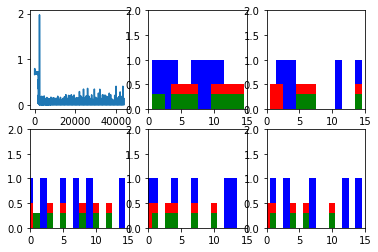

Step 100 Loss 7.942783e-05


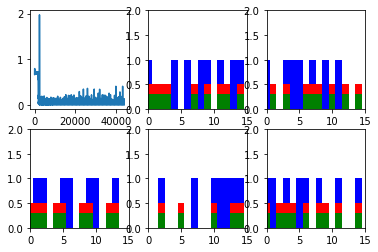

Step 200 Loss 7.884109e-05


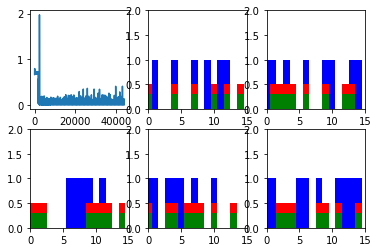

Step 300 Loss 7.984336e-05


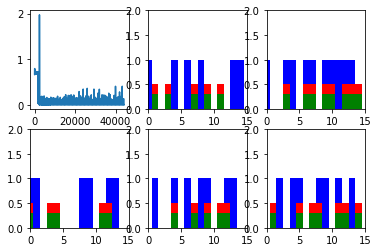

Step 400 Loss 7.900191e-05


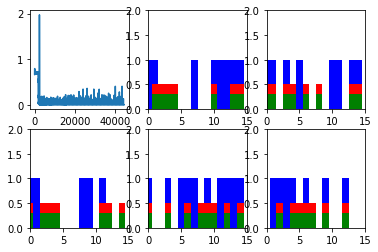

Step 500 Loss 6.756223e-05


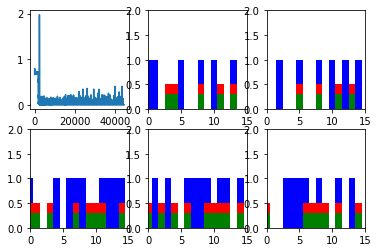

Step 600 Loss 7.065216e-05


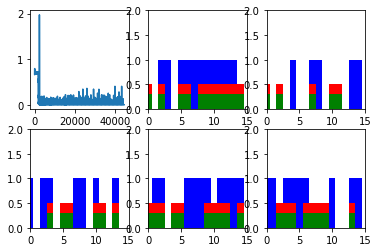

New data, epoch 67
Step 0 Loss 0.28280592


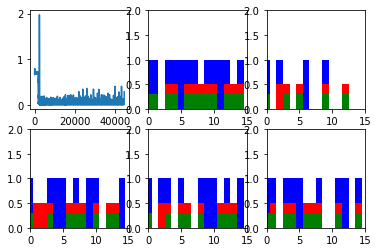

Step 100 Loss 9.07952e-05


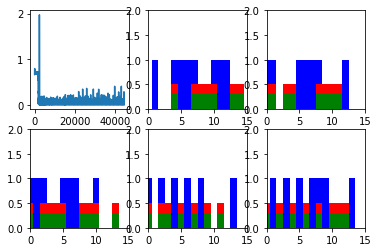

Step 200 Loss 0.00014035092


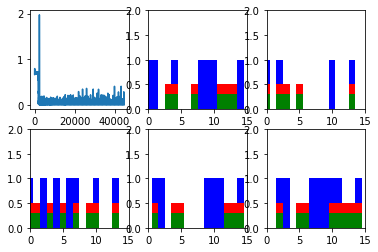

Step 300 Loss 9.730655e-05


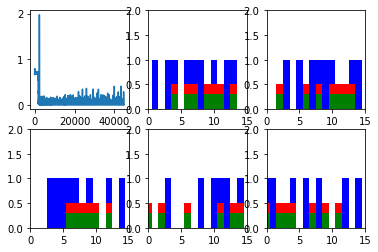

Step 400 Loss 0.00015057501


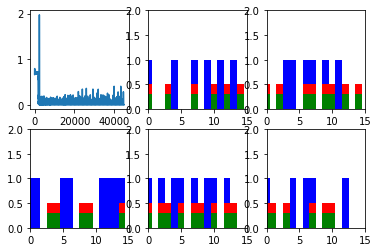

Step 500 Loss 0.00010477725


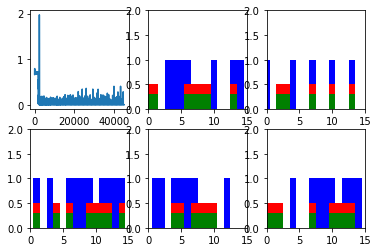

Step 600 Loss 7.719457e-05


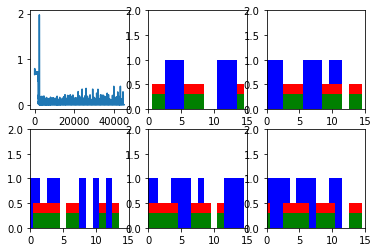

New data, epoch 68
Step 0 Loss 0.18095778


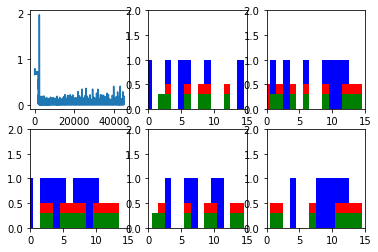

Step 100 Loss 9.36939e-05


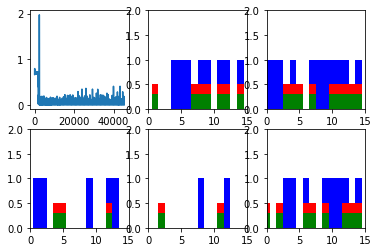

Step 200 Loss 9.212539e-05


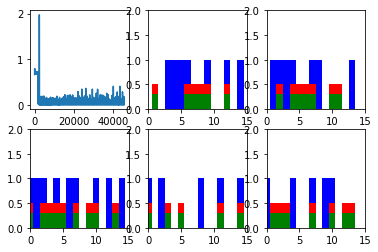

Step 300 Loss 9.728636e-05


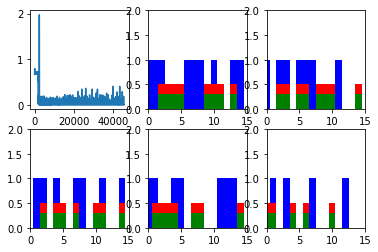

Step 400 Loss 9.1808826e-05


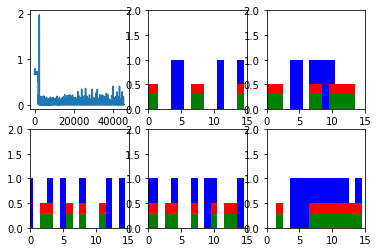

Step 500 Loss 8.163936e-05


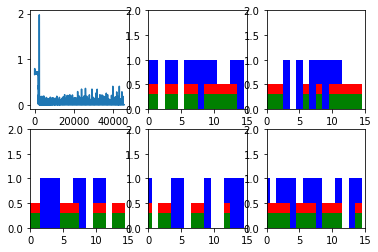

Step 600 Loss 9.257642e-05


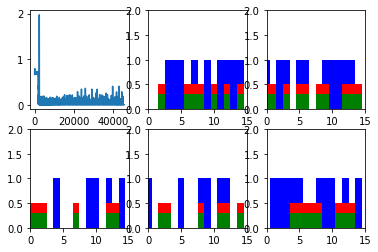

New data, epoch 69
Step 0 Loss 0.22955744


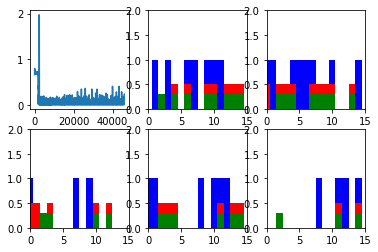

Step 100 Loss 8.487585e-05


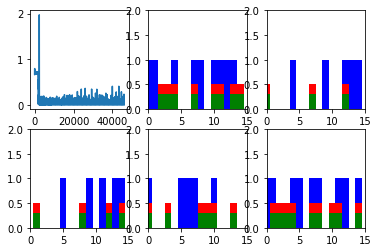

Step 200 Loss 8.581636e-05


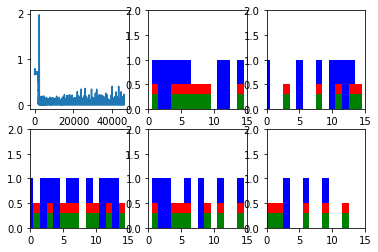

Step 300 Loss 6.00194e-05


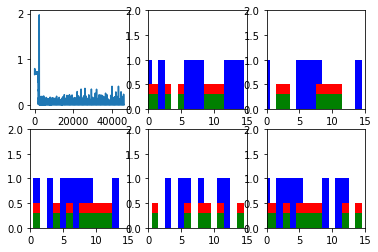

Step 400 Loss 7.9627294e-05


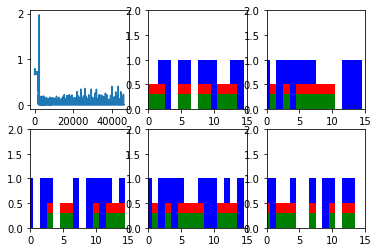

Step 500 Loss 8.22114e-05


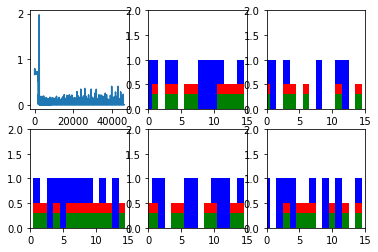

Step 600 Loss 6.808508e-05


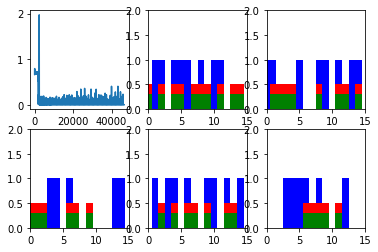

New data, epoch 70
Step 0 Loss 0.1829277


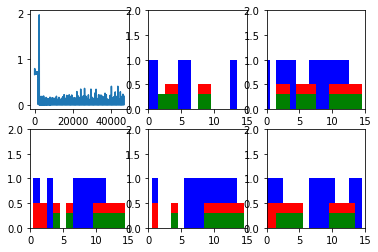

Step 100 Loss 7.787697e-05


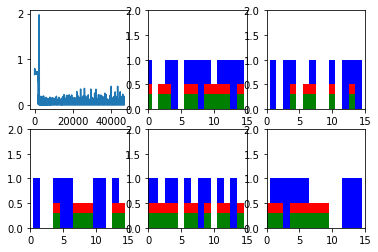

Step 200 Loss 6.851075e-05


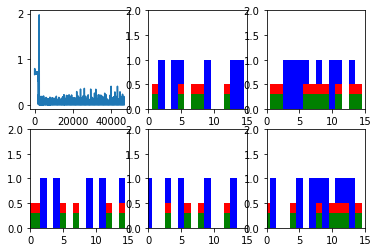

Step 300 Loss 8.3145234e-05


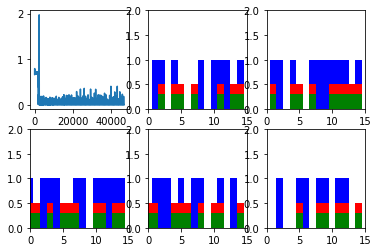

Step 400 Loss 8.514158e-05


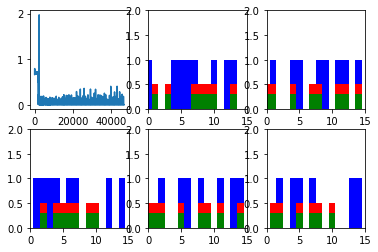

Step 500 Loss 5.8457244e-05


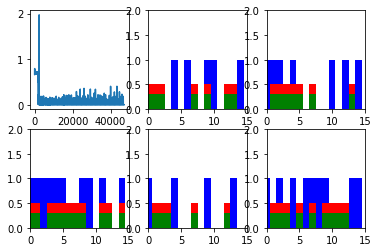

Step 600 Loss 5.9913124e-05


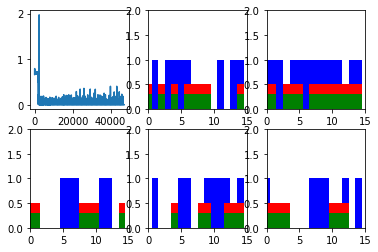

New data, epoch 71
Step 0 Loss 0.09959397


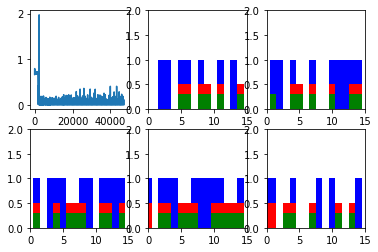

Step 100 Loss 6.9966976e-05


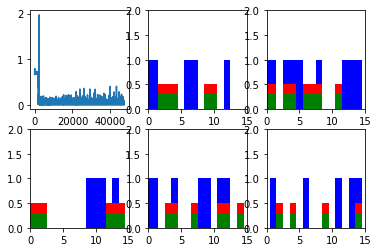

Step 200 Loss 7.0378686e-05


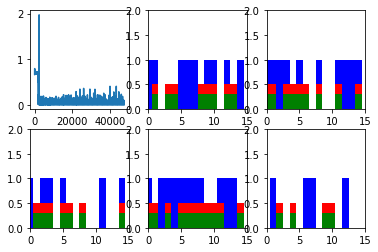

Step 300 Loss 7.1654526e-05


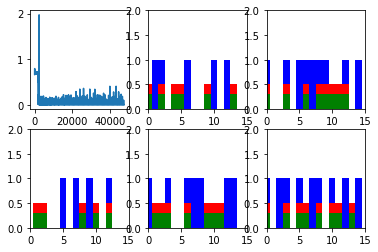

Step 400 Loss 6.8097914e-05


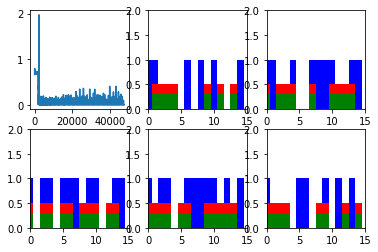

Step 500 Loss 6.9073656e-05


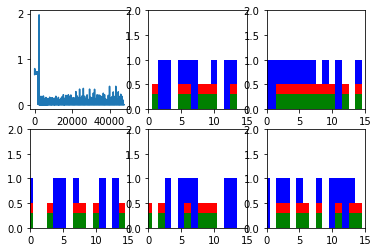

Step 600 Loss 6.723788e-05


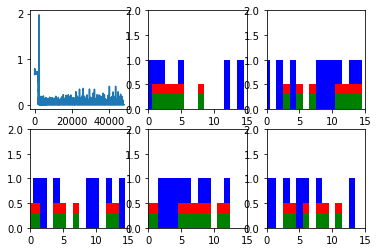

New data, epoch 72
Step 0 Loss 0.20572722


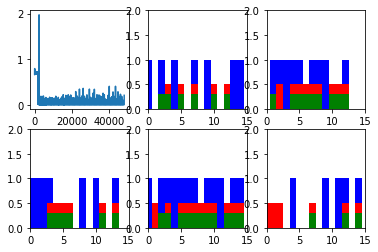

Step 100 Loss 6.729836e-05


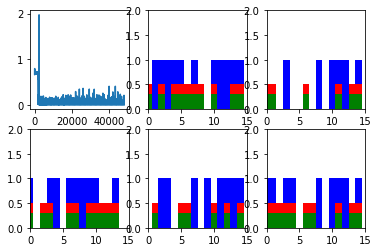

Step 200 Loss 7.283382e-05


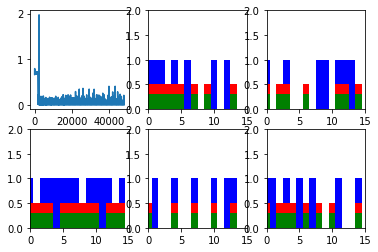

Step 300 Loss 6.491456e-05


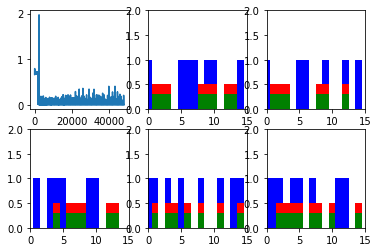

Step 400 Loss 5.7765108e-05


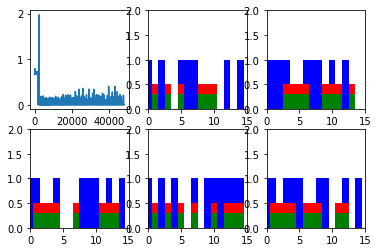

Step 500 Loss 7.3445655e-05


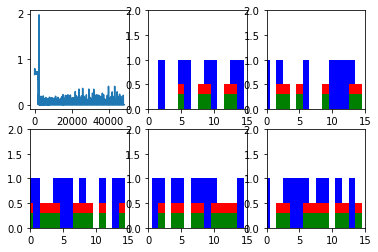

Step 600 Loss 5.8867223e-05


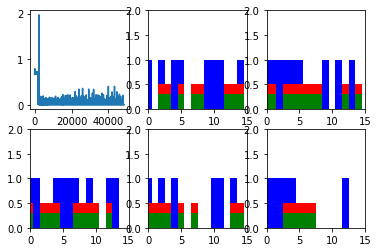

New data, epoch 73
Step 0 Loss 0.19290908


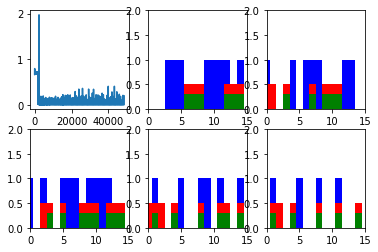

Step 100 Loss 5.661523e-05


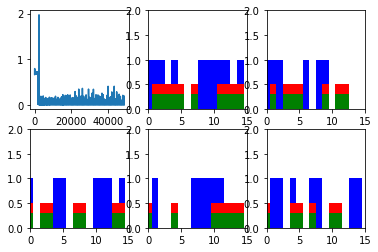

Step 200 Loss 6.2327104e-05


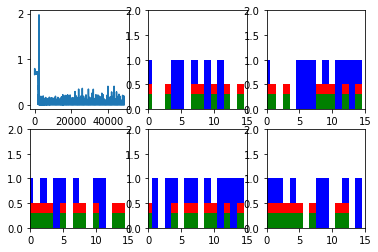

Step 300 Loss 6.621638e-05


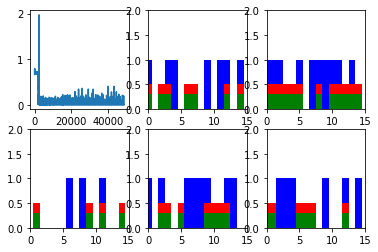

Step 400 Loss 6.8476504e-05


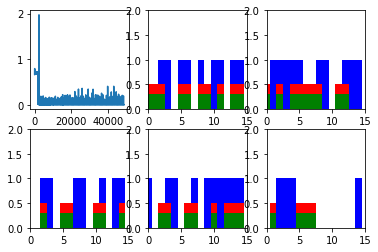

Step 500 Loss 6.487459e-05


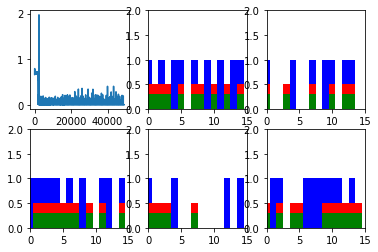

Step 600 Loss 6.806769e-05


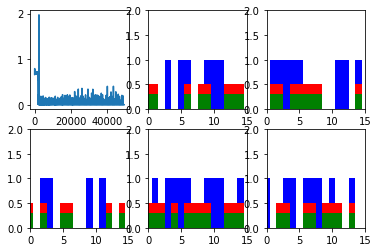

New data, epoch 74
Step 0 Loss 0.24906309


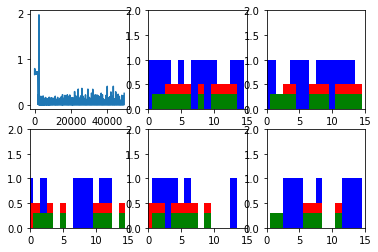

Step 100 Loss 7.053729e-05


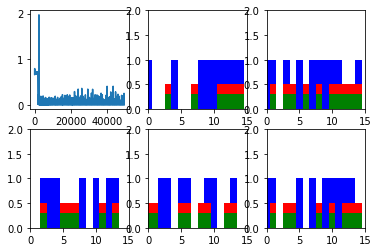

Step 200 Loss 7.772933e-05


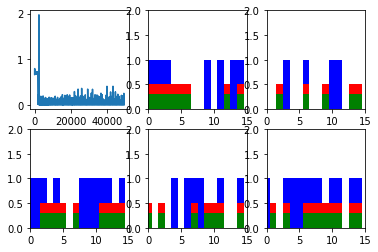

Step 300 Loss 9.2609574e-05


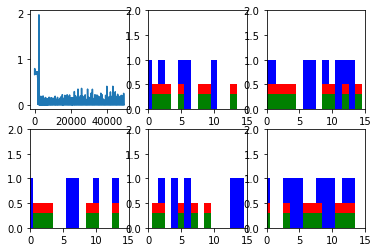

Step 400 Loss 9.467841e-05


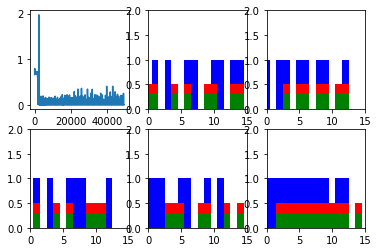

Step 500 Loss 8.569245e-05


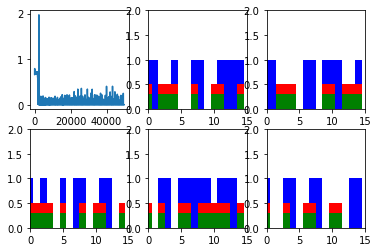

Step 600 Loss 7.424636e-05


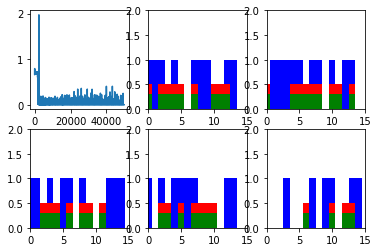

New data, epoch 75
Step 0 Loss 0.22088882


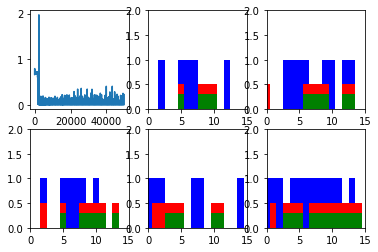

Step 100 Loss 7.764671e-05


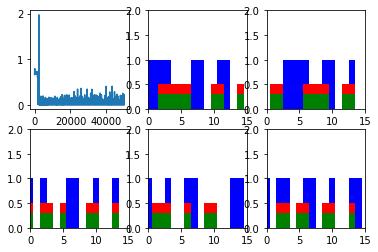

Step 200 Loss 6.7118024e-05


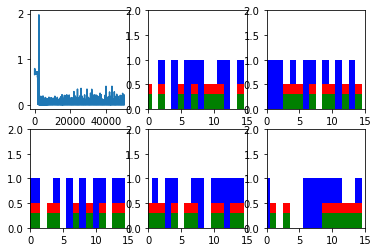

Step 300 Loss 6.1714374e-05


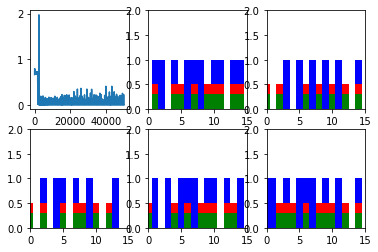

Step 400 Loss 7.7152e-05


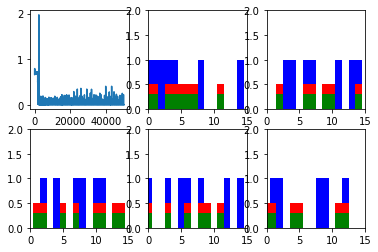

Step 500 Loss 7.2853225e-05


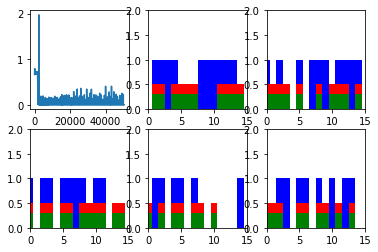

Step 600 Loss 6.3956126e-05


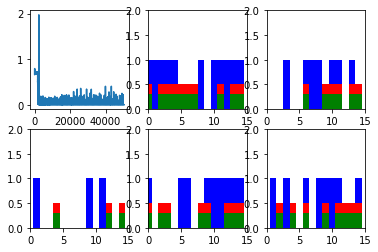

New data, epoch 76
Step 0 Loss 0.3332304


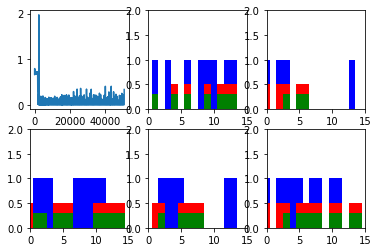

Step 100 Loss 6.125619e-05


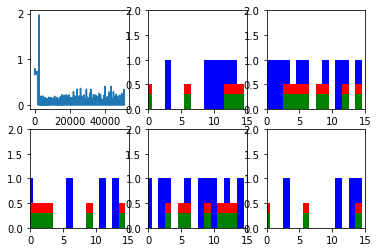

Step 200 Loss 6.821681e-05


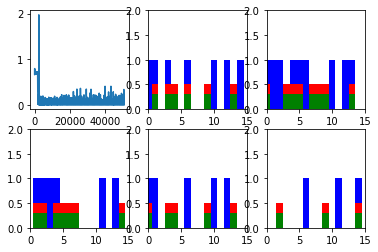

Step 300 Loss 5.8020287e-05


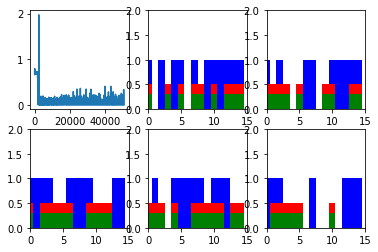

Step 400 Loss 6.1025545e-05


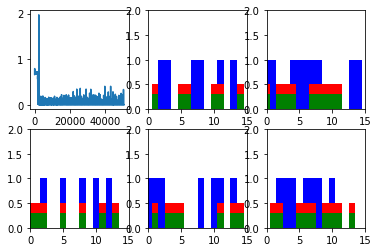

Step 500 Loss 7.7408105e-05


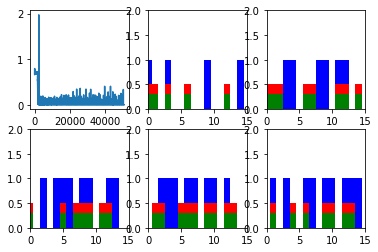

Step 600 Loss 6.718423e-05


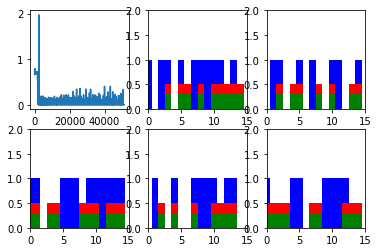

New data, epoch 77
Step 0 Loss 0.14767395


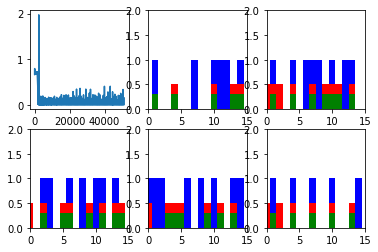

Step 100 Loss 7.161466e-05


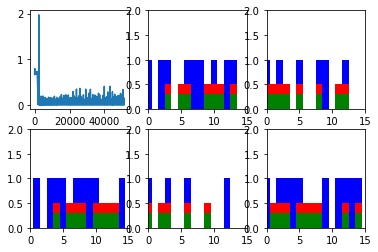

Step 200 Loss 6.408987e-05


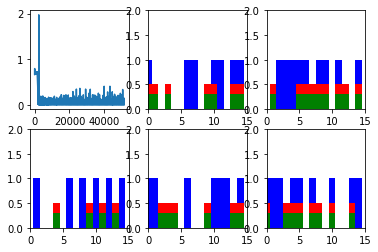

Step 300 Loss 7.591459e-05


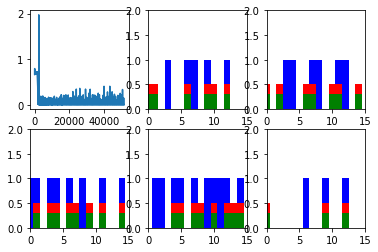

Step 400 Loss 7.08873e-05


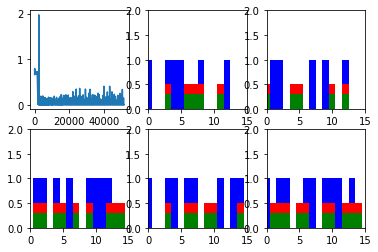

Step 500 Loss 6.413917e-05


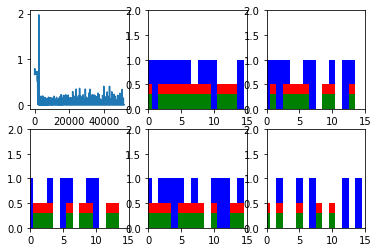

Step 600 Loss 6.226529e-05


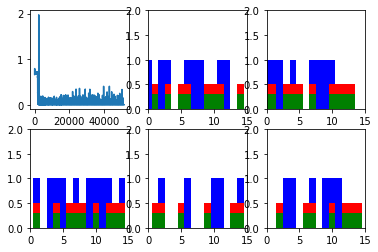

New data, epoch 78
Step 0 Loss 0.21891288


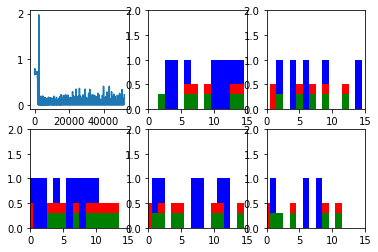

Step 100 Loss 6.753818e-05


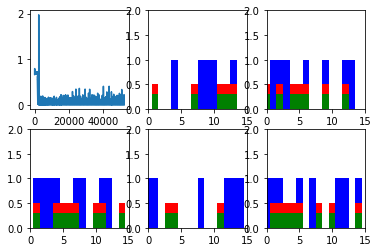

Step 200 Loss 8.3866726e-05


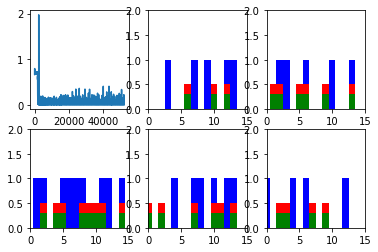

Step 300 Loss 6.949747e-05


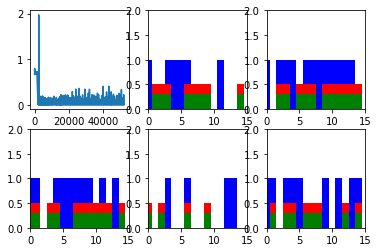

Step 400 Loss 6.5949e-05


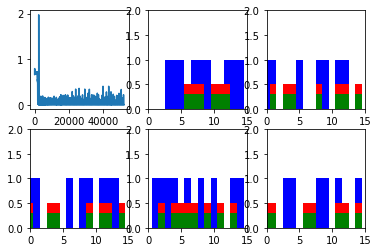

Step 500 Loss 6.320095e-05


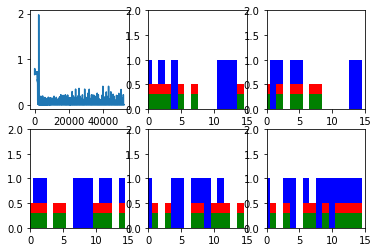

Step 600 Loss 7.272531e-05


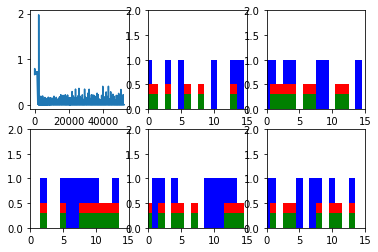

New data, epoch 79
Step 0 Loss 0.24683689


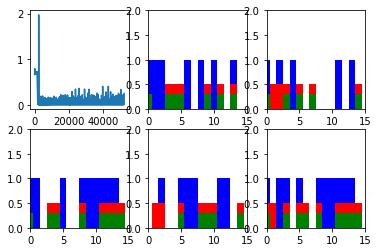

Step 100 Loss 6.520384e-05


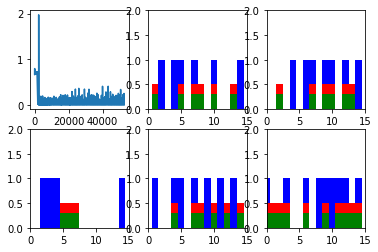

Step 200 Loss 6.846076e-05


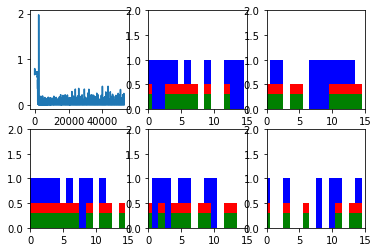

Step 300 Loss 6.546471e-05


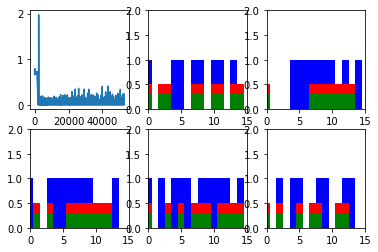

Step 400 Loss 6.7160385e-05


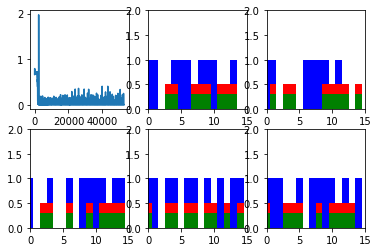

Step 500 Loss 5.5382214e-05


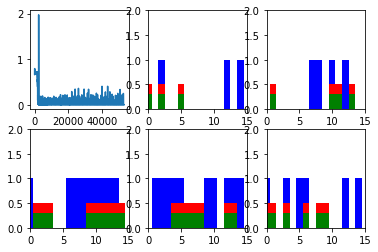

Step 600 Loss 5.812029e-05


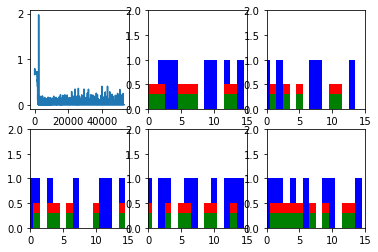

New data, epoch 80
Step 0 Loss 0.15763894


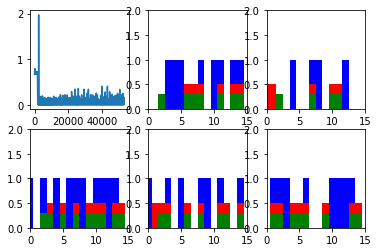

Step 100 Loss 5.944198e-05


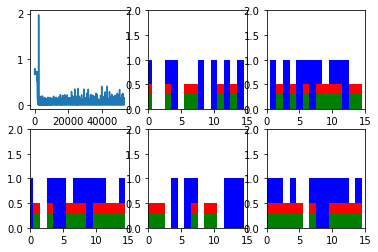

Step 200 Loss 6.632407e-05


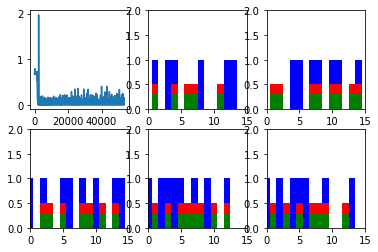

Step 300 Loss 6.038685e-05


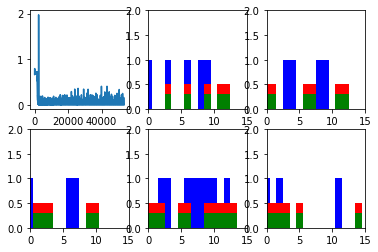

Step 400 Loss 6.310441e-05


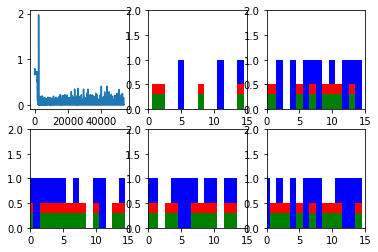

Step 500 Loss 5.465905e-05


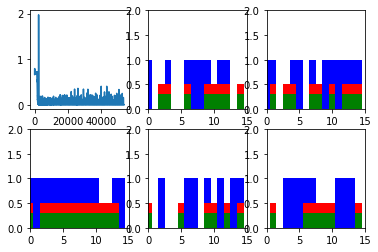

Step 600 Loss 5.6914178e-05


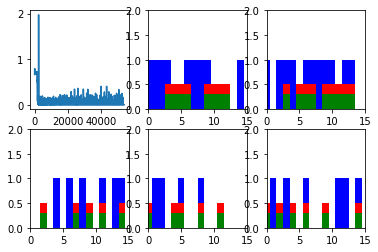

New data, epoch 81
Step 0 Loss 0.14148669


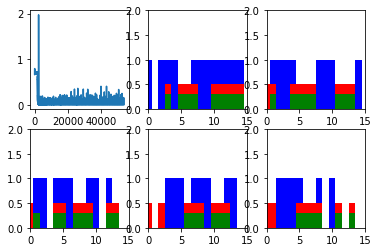

Step 100 Loss 6.366396e-05


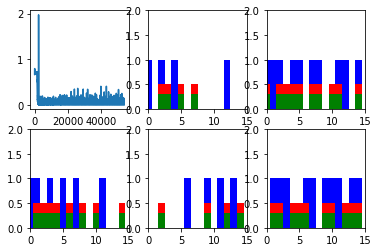

Step 200 Loss 5.9997496e-05


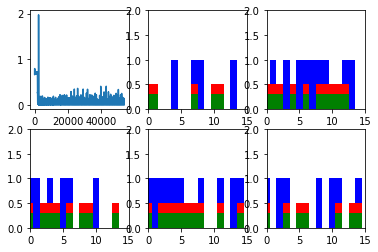

Step 300 Loss 6.365448e-05


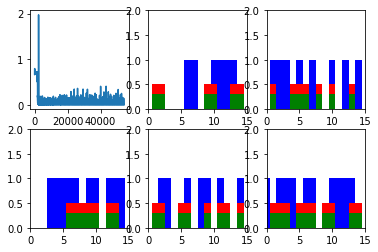

Step 400 Loss 6.0518985e-05


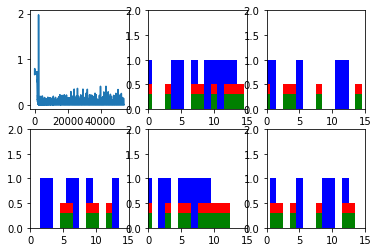

Step 500 Loss 5.6357916e-05


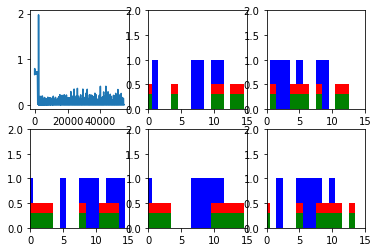

Step 600 Loss 5.95968e-05


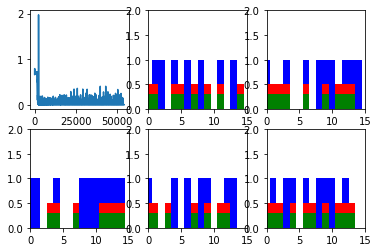

New data, epoch 82
Step 0 Loss 0.14049959


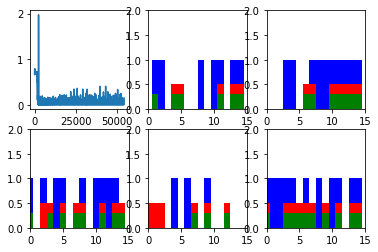

Step 100 Loss 5.632623e-05


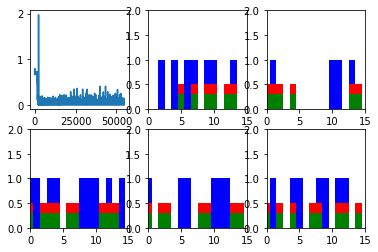

Step 200 Loss 5.4910135e-05


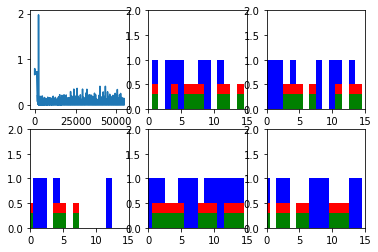

Step 300 Loss 5.507081e-05


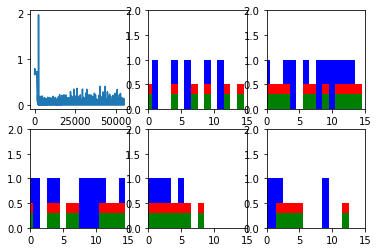

Step 400 Loss 5.2683466e-05


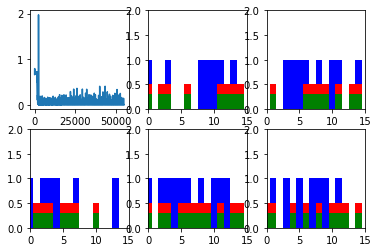

Step 500 Loss 5.7947127e-05


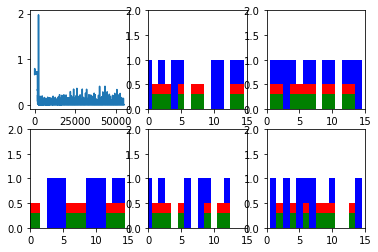

Step 600 Loss 6.645338e-05


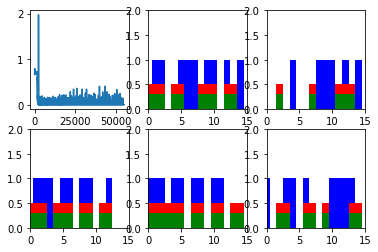

New data, epoch 83
Step 0 Loss 0.18029608


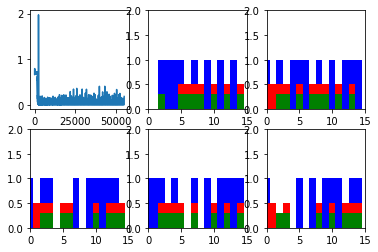

Step 100 Loss 5.813775e-05


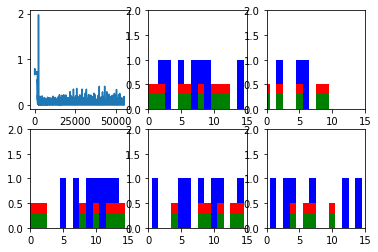

Step 200 Loss 6.129408e-05


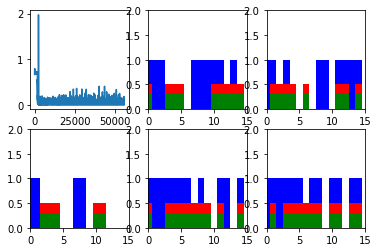

Step 300 Loss 5.499096e-05


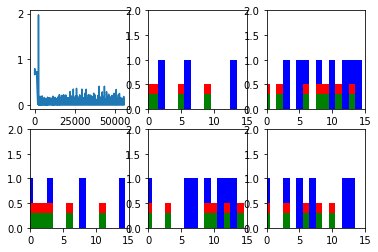

Step 400 Loss 5.530887e-05


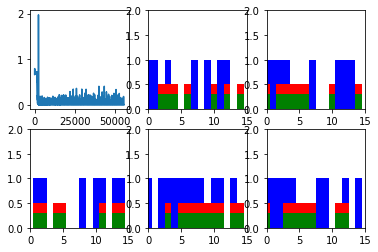

Step 500 Loss 5.949496e-05


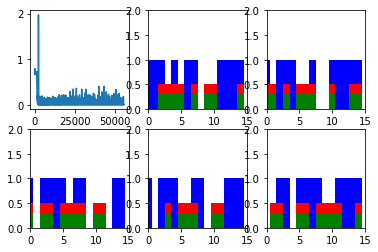

Step 600 Loss 5.6634428e-05


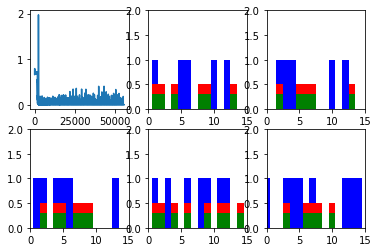

New data, epoch 84
Step 0 Loss 0.15816991


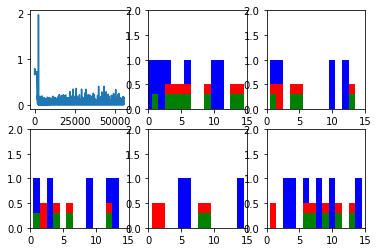

Step 100 Loss 5.0156217e-05


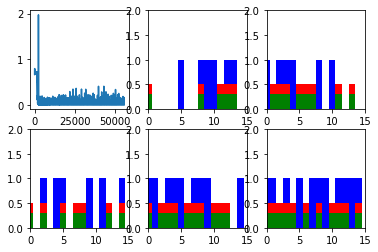

Step 200 Loss 5.3864333e-05


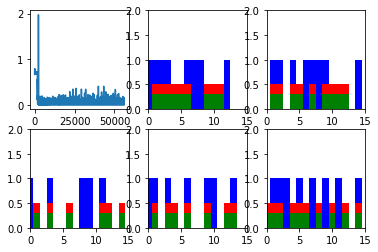

Step 300 Loss 6.101573e-05


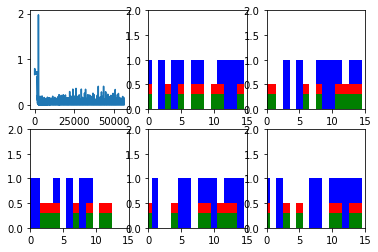

Step 400 Loss 5.4975302e-05


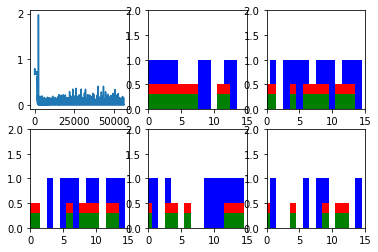

Step 500 Loss 5.0218066e-05


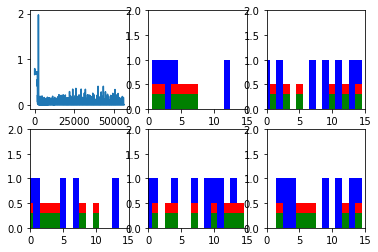

Step 600 Loss 4.5408997e-05


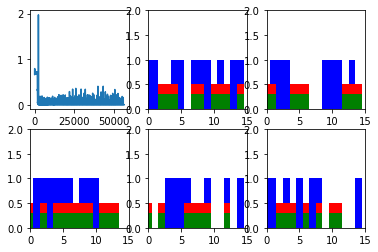

New data, epoch 85
Step 0 Loss 0.19768018


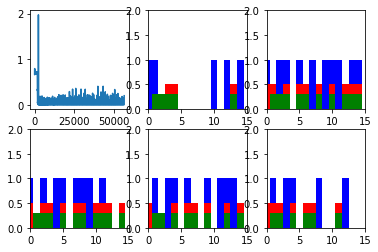

Step 100 Loss 6.383391e-05


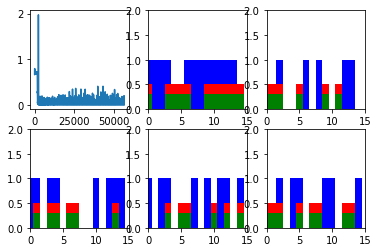

Step 200 Loss 5.5343495e-05


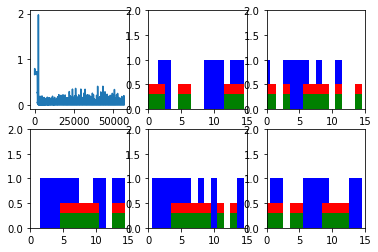

Step 300 Loss 5.3973858e-05


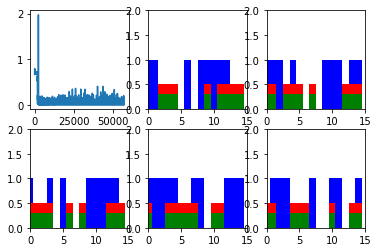

Step 400 Loss 5.6810914e-05


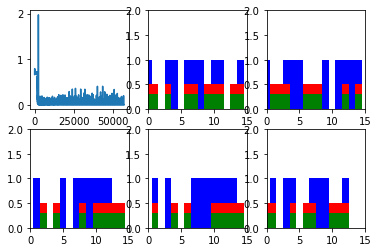

Step 500 Loss 4.4490243e-05


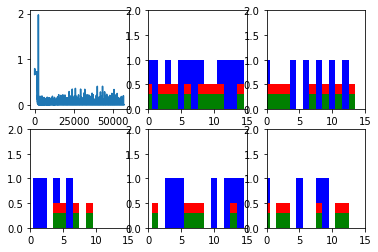

Step 600 Loss 5.169276e-05


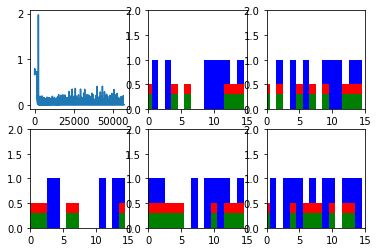

New data, epoch 86
Step 0 Loss 0.13527656


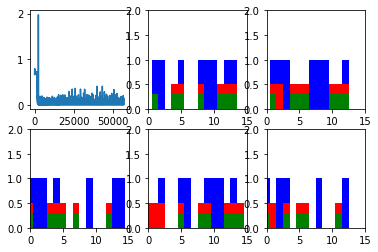

Step 100 Loss 5.318568e-05


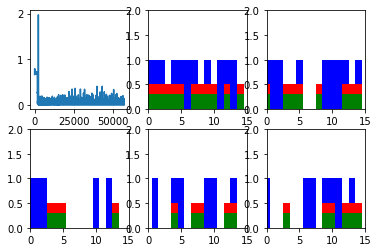

Step 200 Loss 5.062356e-05


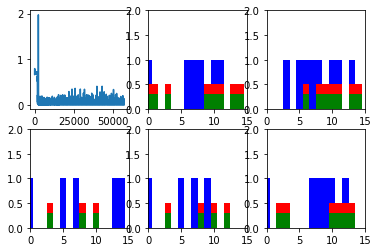

Step 300 Loss 4.6694535e-05


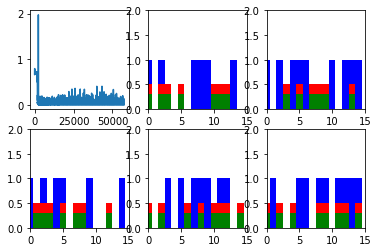

Step 400 Loss 5.289799e-05


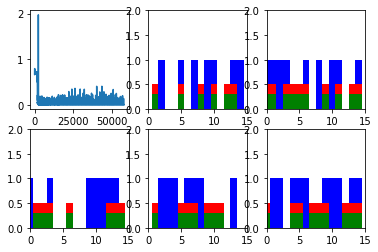

Step 500 Loss 5.3652995e-05


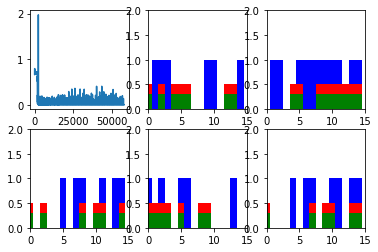

Step 600 Loss 5.456213e-05


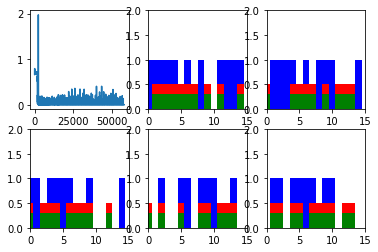

New data, epoch 87
Step 0 Loss 0.23699783


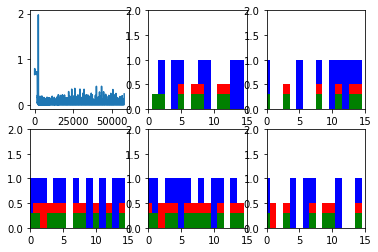

Step 100 Loss 4.868786e-05


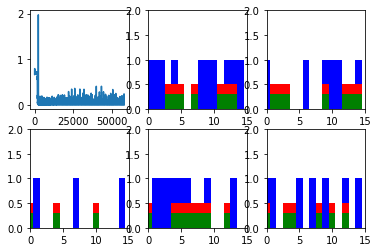

Step 200 Loss 5.818095e-05


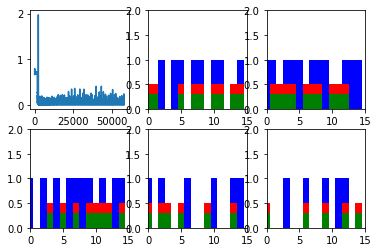

Step 300 Loss 5.447135e-05


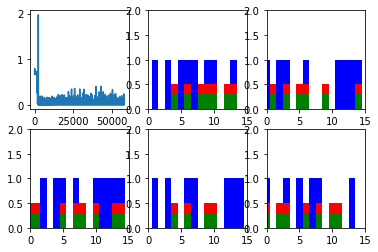

Step 400 Loss 5.7154222e-05


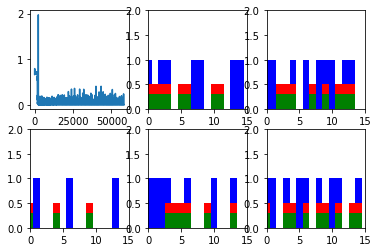

Step 500 Loss 5.382461e-05


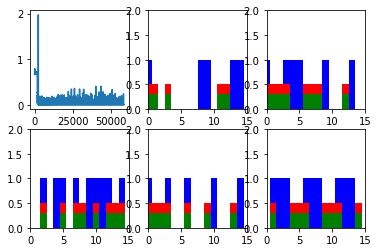

Step 600 Loss 6.1632825e-05


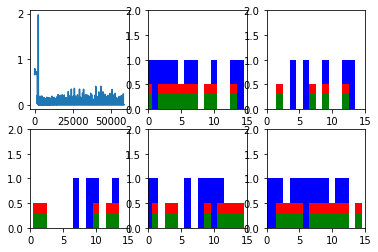

New data, epoch 88
Step 0 Loss 0.17950252


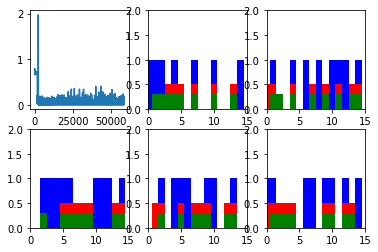

Step 100 Loss 5.7436413e-05


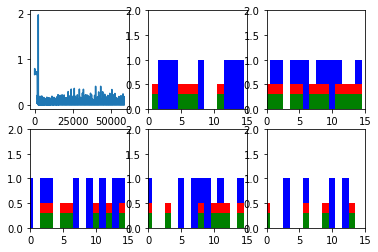

Step 200 Loss 5.2498865e-05


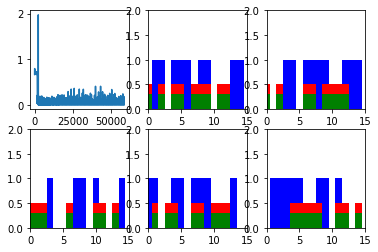

Step 300 Loss 5.6295885e-05


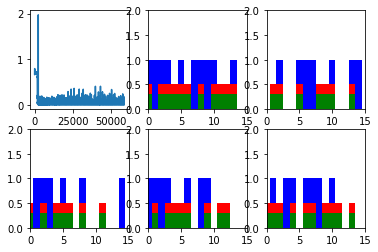

Step 400 Loss 5.0392824e-05


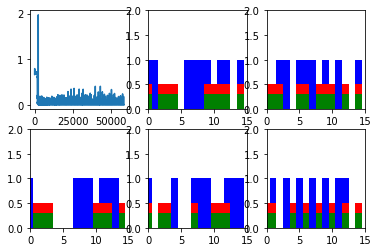

Step 500 Loss 6.1157654e-05


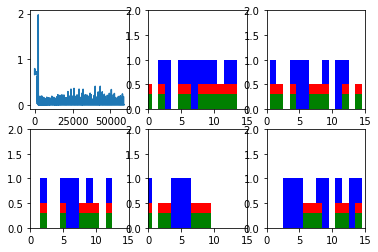

Step 600 Loss 5.7311543e-05


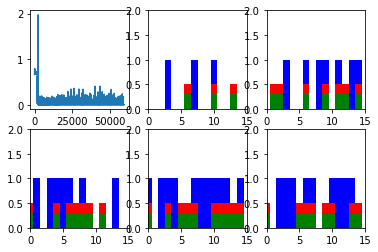

New data, epoch 89
Step 0 Loss 0.21919657


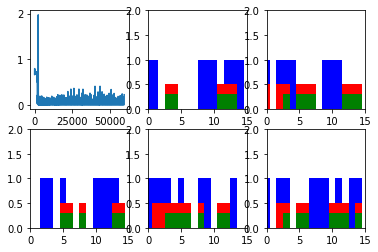

Step 100 Loss 6.616986e-05


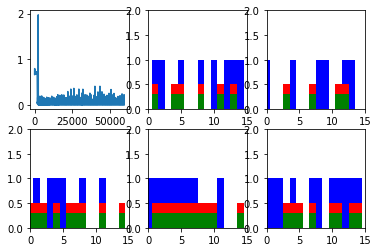

Step 200 Loss 5.952477e-05


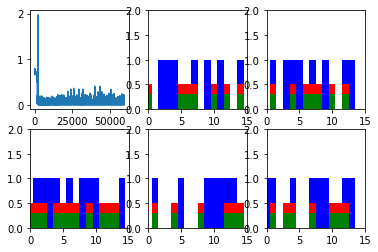

Step 300 Loss 5.8942027e-05


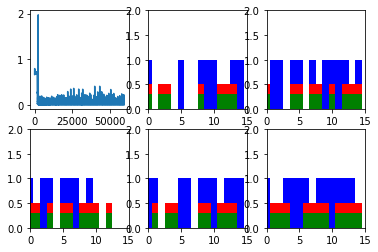

Step 400 Loss 9.354691e-05


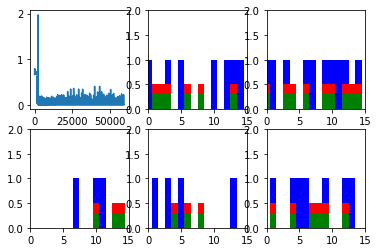

Step 500 Loss 7.693907e-05


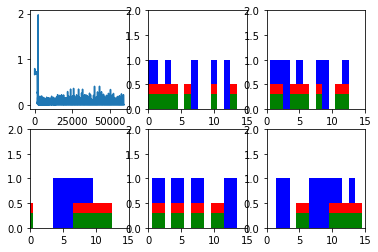

Step 600 Loss 6.1996645e-05


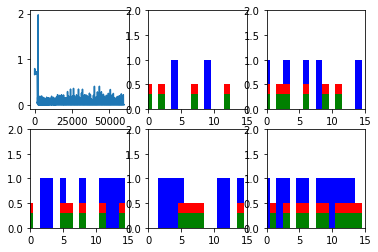

New data, epoch 90
Step 0 Loss 0.2047172


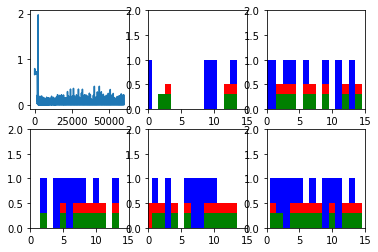

Step 100 Loss 5.179806e-05


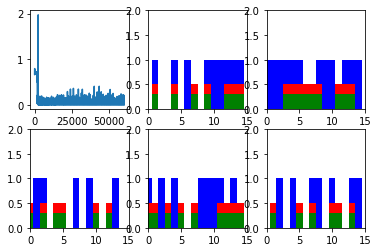

Step 200 Loss 5.6871108e-05


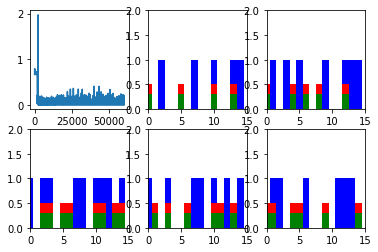

Step 300 Loss 5.9121692e-05


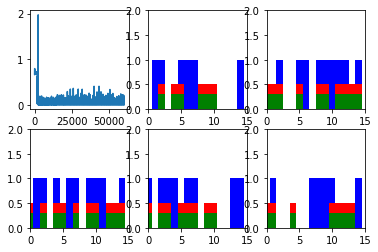

Step 400 Loss 6.436291e-05


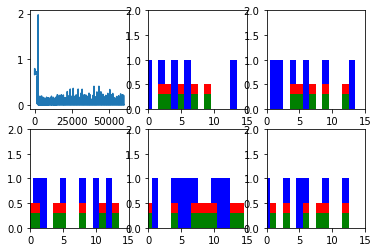

Step 500 Loss 5.2057134e-05


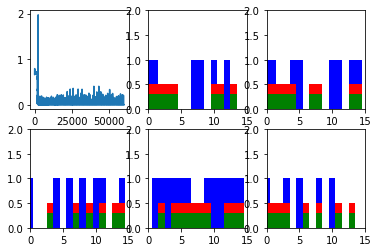

Step 600 Loss 5.879437e-05


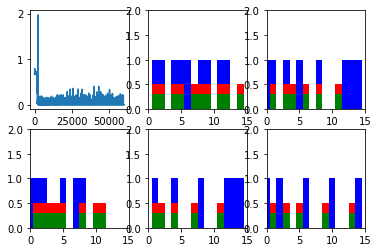

New data, epoch 91
Step 0 Loss 0.18885718


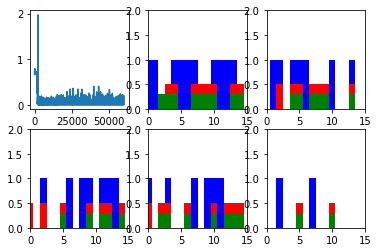

Step 100 Loss 5.3977095e-05


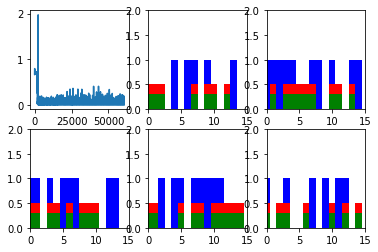

Step 200 Loss 5.4322147e-05


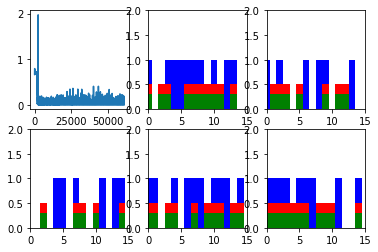

Step 300 Loss 5.276278e-05


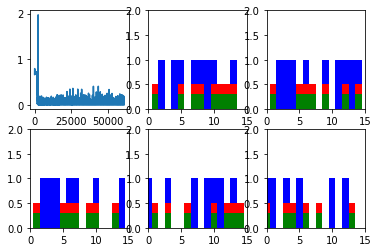

Step 400 Loss 5.601301e-05


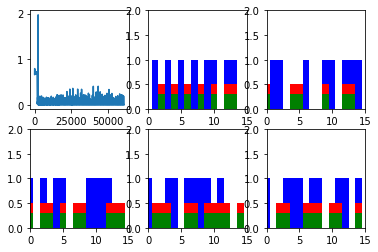

Step 500 Loss 5.7761434e-05


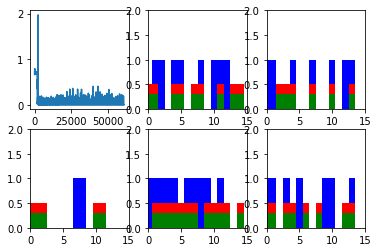

Step 600 Loss 5.069522e-05


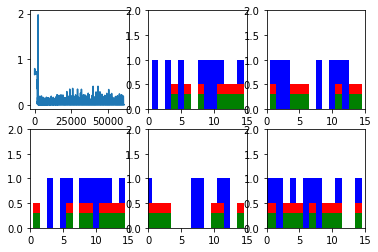

New data, epoch 92
Step 0 Loss 0.13255471


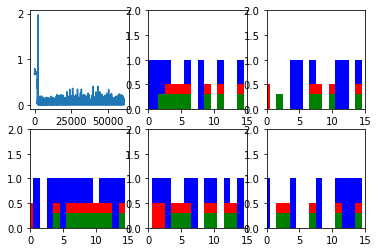

Step 100 Loss 5.6125806e-05


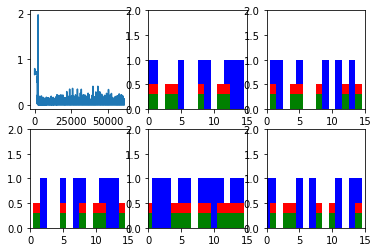

Step 200 Loss 6.024195e-05


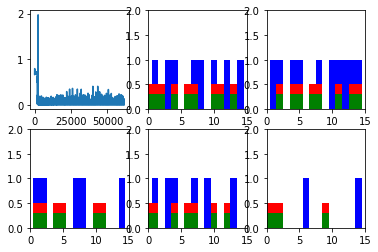

Step 300 Loss 5.6543544e-05


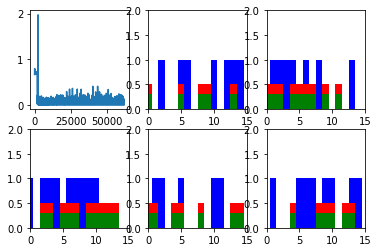

Step 400 Loss 5.484971e-05


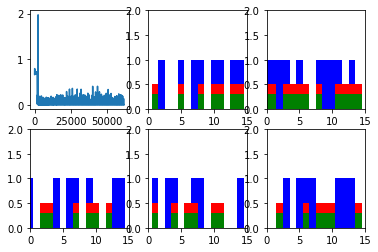

Step 500 Loss 4.2748397e-05


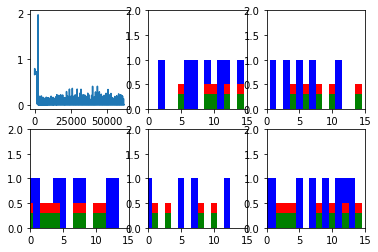

Step 600 Loss 6.415512e-05


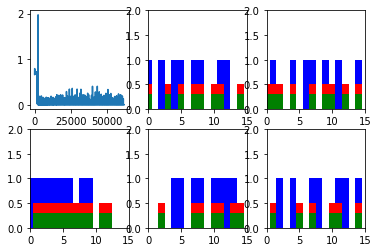

New data, epoch 93
Step 0 Loss 0.13186266


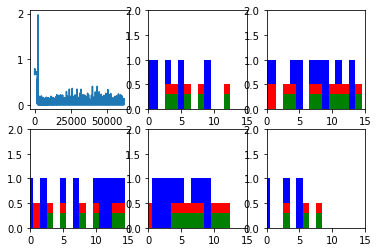

Step 100 Loss 5.1577223e-05


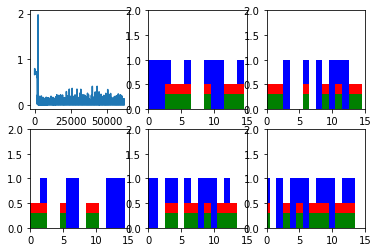

Step 200 Loss 4.9686907e-05


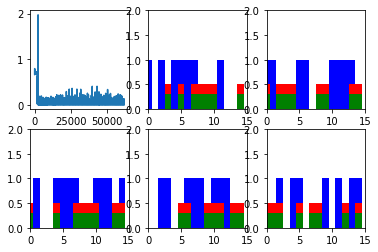

Step 300 Loss 6.479729e-05


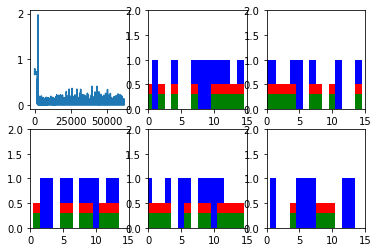

Step 400 Loss 4.8657446e-05


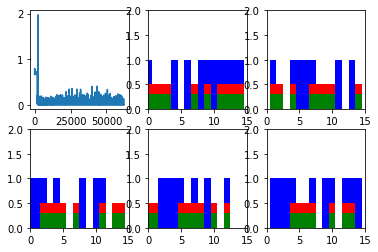

Step 500 Loss 5.7972862e-05


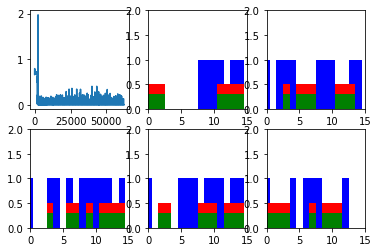

Step 600 Loss 4.7944e-05


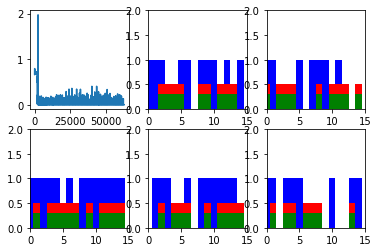

New data, epoch 94
Step 0 Loss 0.20677058


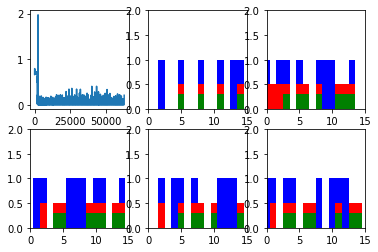

Step 100 Loss 5.9122674e-05


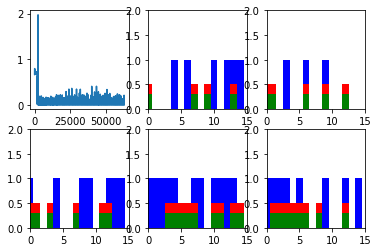

Step 200 Loss 5.3029955e-05


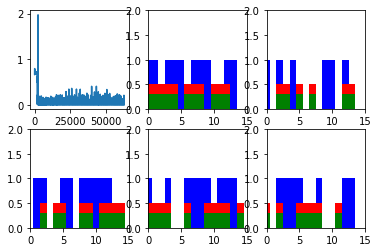

Step 300 Loss 4.6823516e-05


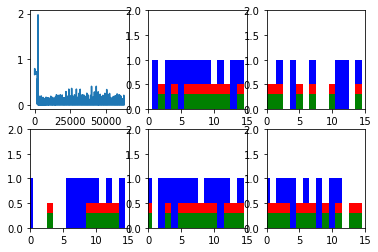

Step 400 Loss 4.3601896e-05


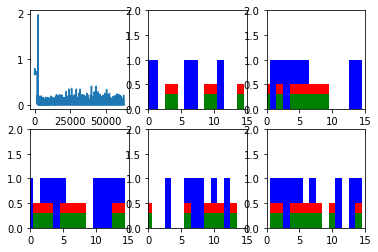

Step 500 Loss 4.911849e-05


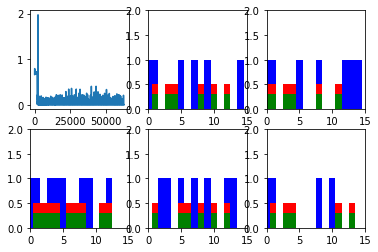

Step 600 Loss 5.4918968e-05


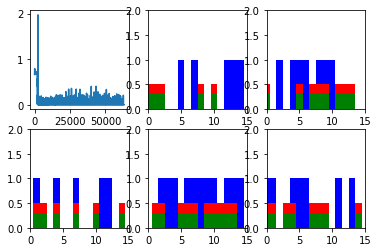

New data, epoch 95
Step 0 Loss 0.24088499


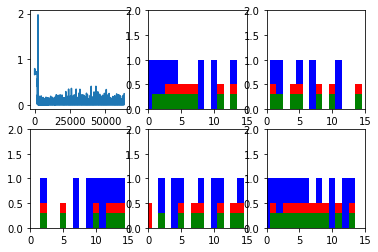

Step 100 Loss 5.9763224e-05


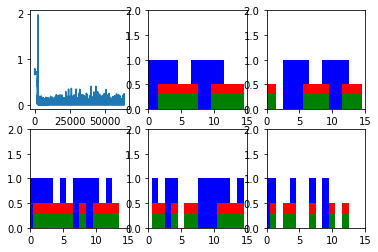

Step 200 Loss 6.710448e-05


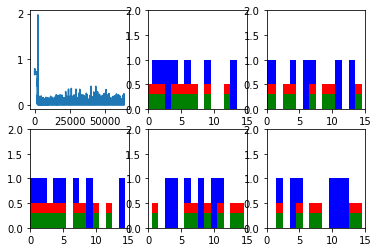

Step 300 Loss 6.381901e-05


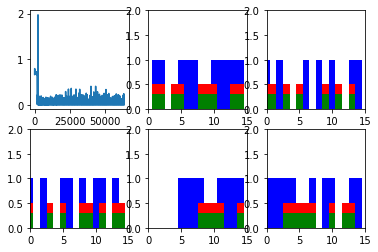

Step 400 Loss 6.97785e-05


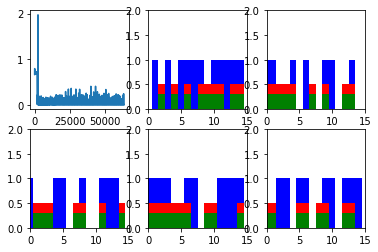

Step 500 Loss 4.8776626e-05


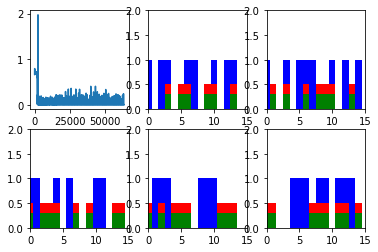

Step 600 Loss 5.4340562e-05


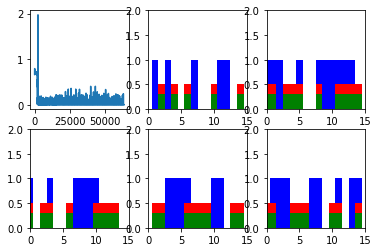

New data, epoch 96
Step 0 Loss 0.23878296


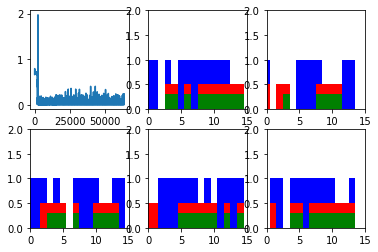

Step 100 Loss 5.50595e-05


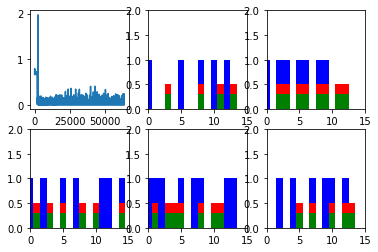

Step 200 Loss 4.93647e-05


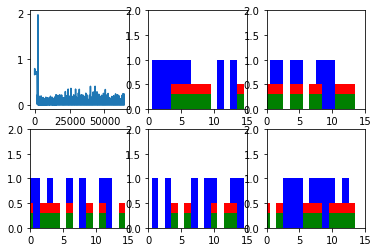

Step 300 Loss 4.7157333e-05


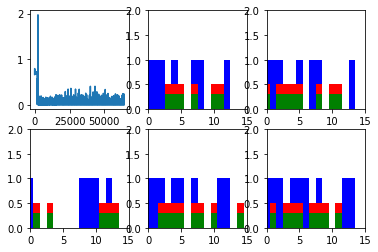

Step 400 Loss 4.1372048e-05


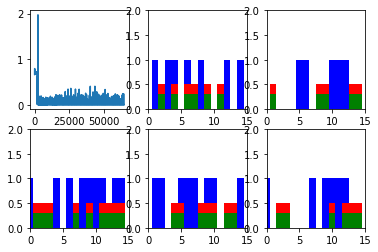

Step 500 Loss 5.248459e-05


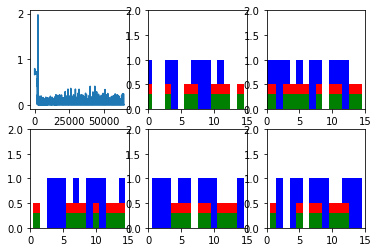

Step 600 Loss 4.647074e-05


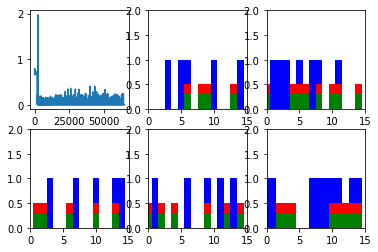

New data, epoch 97
Step 0 Loss 0.12940904


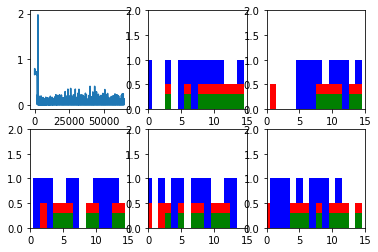

Step 100 Loss 4.806316e-05


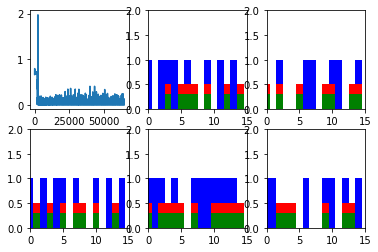

Step 200 Loss 5.1079838e-05


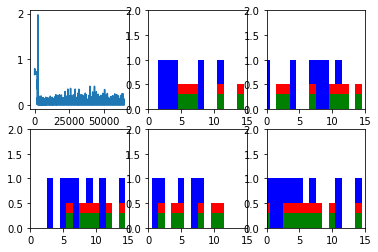

Step 300 Loss 4.5792083e-05


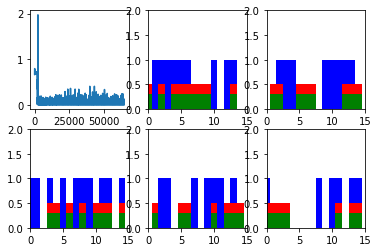

Step 400 Loss 5.6575784e-05


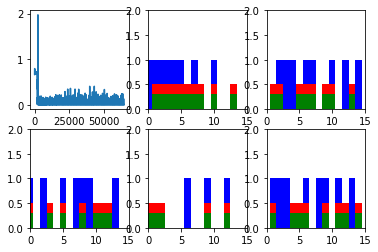

Step 500 Loss 4.4720728e-05


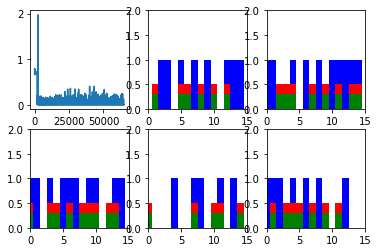

Step 600 Loss 6.4363594e-05


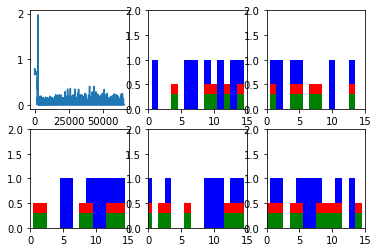

New data, epoch 98
Step 0 Loss 0.11238121


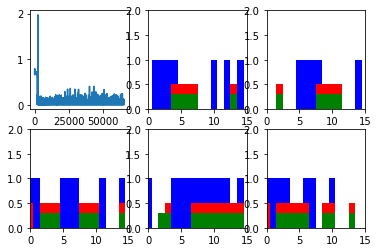

Step 100 Loss 5.1167302e-05


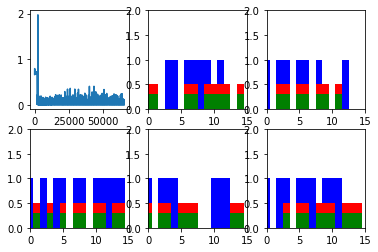

Step 200 Loss 4.97908e-05


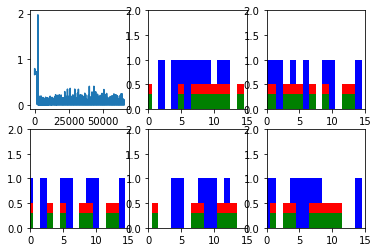

Step 300 Loss 4.8227164e-05


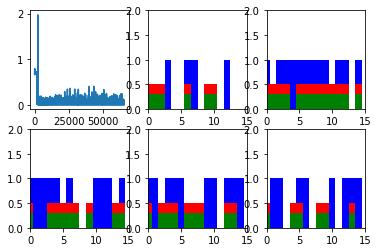

Step 400 Loss 5.2328985e-05


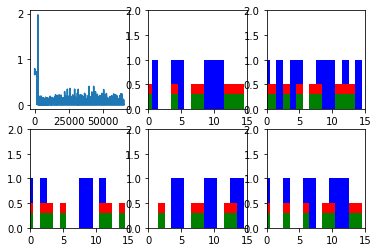

Step 500 Loss 4.9417456e-05


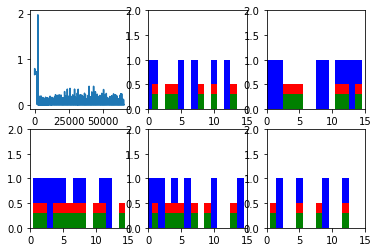

Step 600 Loss 5.3425687e-05


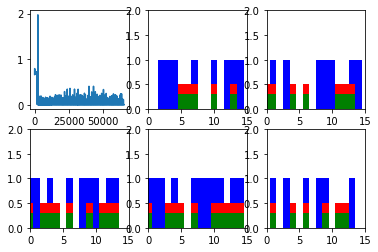

New data, epoch 99
Step 0 Loss 0.13704097


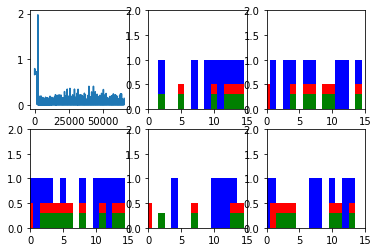

Step 100 Loss 4.3153796e-05


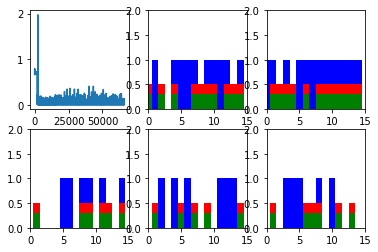

Step 200 Loss 4.763878e-05


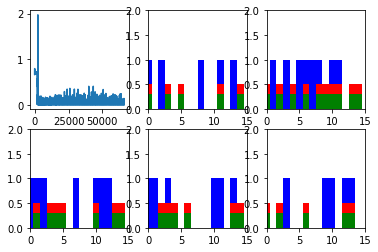

Step 300 Loss 4.9317197e-05


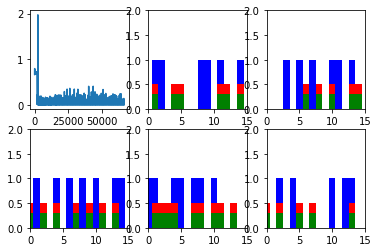

Step 400 Loss 4.94032e-05


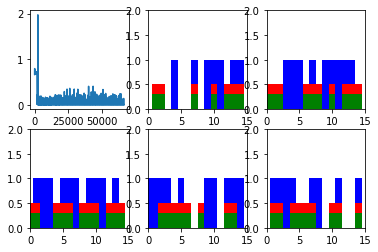

Step 500 Loss 5.221126e-05


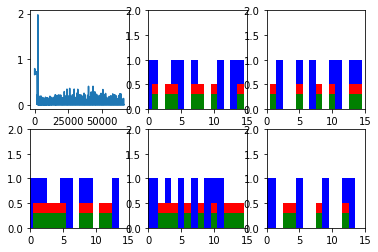

Step 600 Loss 5.055044e-05


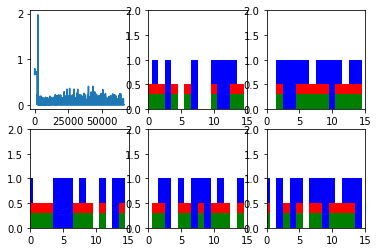

In [26]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchY_placeholder:batchY,
                    init_state:_current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()